## Title: Comparison of SAM FE data, Seed Analyzer data and Digital caliper measured data

#### Author: Harpreet Kaur Bargota

#### Email: harpreet.bargota@agr.gc.ca

#### Date: March 21, 2025

Dataset for groundtruth:
Faba Seed Analyzer Data August 2024.xlsx

For ground_truth (Machine measured and hand measured data): The excel file is "Faba_Seed_Analyzer_Data_August_2024.xlsx" provided by Dr. Nicholas Larkan. Machine measured data and hand measured is available for some of the images.

Dataset for SAM measured data:

SAM1.0: output_FE_SAM1.0/FE_Color.csv

SAM2.1: ouput_FE_SAM2.1/FE_Color.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.api import DescrStatsW

In [2]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')

### Read the groundtruth datafiles

In [3]:
#Read the hand and machine measured data
# ground_truth = pd.read_excel(r"Faba Seed Analyzer Data August 2024.xlsx", sheet_name= "Individual S2 Seed Data")
ground_truth = pd.read_excel(r"Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name= "Individual S2 Seed Data")

In [4]:
ground_truth.head(2)

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2    21.09744  14.532204  241.729082    34121.0  1.592133   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1      1.17374   1.451772         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN

In [5]:
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4047 non-null   object 
 1   Length(mm)    4047 non-null   float64
 2   Width(mm)     4047 non-null   float64
 3   Area(mm²)     4047 non-null   float64
 4   Area(pix)     4047 non-null   float64
 5   NC_1          4047 non-null   float64
 6   Circularity   4047 non-null   float64
 7   L/W Ratio     4047 non-null   float64
 8   Unnamed: 8    0 non-null      float64
 9   Length(mm).1  77 non-null     object 
 10  Width(mm).1   76 non-null     float64
 11  Unnamed: 11   0 non-null      float64
 12  Length(mm).2  1021 non-null   object 
 13  Width(mm).2   1019 non-null   object 
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   3 non-null      object 
 18  Unnamed: 18   2 non-null    

In [6]:
print (ground_truth.columns)
print (ground_truth.index)

Index(['ID', 'Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'NC_1',
       'Circularity', 'L/W Ratio', 'Unnamed: 8', 'Length(mm).1', 'Width(mm).1',
       'Unnamed: 11', 'Length(mm).2', 'Width(mm).2', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')
RangeIndex(start=0, stop=4048, step=1)


### Machine measured data from groundtruth data

In [7]:
# For machine measured data, create a new df from this df containing the machine measured data and drop the column 'NC_1' (Unnecessary)
groundtruth_MM=ground_truth.iloc[:,:8]
groundtruth_MM=groundtruth_MM.drop('NC_1', axis=1)

In [8]:
print (groundtruth_MM.head(5))
print ("-------------------------------------------------------------------------------------------------------")
print (groundtruth_MM.tail(5))

        ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
0      NaN         NaN        NaN         NaN        NaN          NaN   
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   
3  Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   
4  Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   

   L/W Ratio  
0        NaN  
1   1.451772  
2   1.354366  
3   1.375558  
4   1.291562  
-------------------------------------------------------------------------------------------------------
             ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
4043  Vf224-3-2   17.345747  12.956161  177.769928    25134.0     1.159056   
4044  Vf224-3-2   16.721651  12.742646  163.455141    23121.0     1.158142   
4045  Vf224-3-2   16.421493  12.765793  160.689378    22730.0     1.148970   
4046  Vf224-3-2   17.111377  12.677538  169.940747    2

The empty row of cells was dropped.

In [9]:
#drop the first row

groundtruth_MM=groundtruth_MM.drop([0], axis=0)
groundtruth_MM.head()

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   
3  Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   
4  Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   
5  Vf4-1-1    7.801351   6.669074   39.739078     5681.0     1.155499   

   L/W Ratio  
1   1.451772  
2   1.354366  
3   1.375558  
4   1.291562  
5   1.169780

In [10]:
groundtruth_MM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 1 to 4047
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4047 non-null   object 
 1   Length(mm)   4047 non-null   float64
 2   Width(mm)    4047 non-null   float64
 3   Area(mm²)    4047 non-null   float64
 4   Area(pix)    4047 non-null   float64
 5   Circularity  4047 non-null   float64
 6   L/W Ratio    4047 non-null   float64
dtypes: float64(6), object(1)
memory usage: 221.4+ KB


#### The datatype for seed analyzer measured data is object (string for class) and float (numerical for parameters)

#### Check for missing values

In [11]:
#Check for missing values
x=groundtruth_MM.isnull().sum()
print (x)

ID             0
Length(mm)     0
Width(mm)      0
Area(mm²)      0
Area(pix)      0
Circularity    0
L/W Ratio      0
dtype: int64


Machine measured data had no missing values.

#### Set the column 'ID' as the index 

In [12]:
#Set index on a Dataframe
groundtruth_MM=groundtruth_MM.set_index("ID")
#Check the df
print (groundtruth_MM.head(5))

         Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  L/W Ratio
ID                                                                           
Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   1.451772
Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   1.354366
Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   1.375558
Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   1.291562
Vf4-1-1    7.801351   6.669074   39.739078     5681.0     1.155499   1.169780


####  Conversion of strings in the Index to be capitalized

In [13]:
# Convert strings in the Index to be capitalized to have a uniform pattern
groundtruth_MM.index = groundtruth_MM.index.str.capitalize()

#### Sort the index in the increasing order

In [14]:
groundtruth_MM=groundtruth_MM.sort_index()
print (groundtruth_MM.head(5))

           Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf100-1-2   13.425316  11.482318  113.067520    16028.0     1.130719   

           L/W Ratio  
ID                    
Vf1-1-2     1.451772  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.291562  
Vf100-1-2   1.169217  


#### Sort the index based on the increasing order of area (pix) for each image

In [15]:
GT= groundtruth_MM.groupby(groundtruth_MM.index).apply(lambda group: group.sort_values(by=['Area(pix)', 'Length(mm)', 'Width(mm)'], 
                                            ascending=[True, True, True])).reset_index(level=0, drop=True)

In [16]:
GT.head(5)

Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf100-1-2   11.689805  10.722634   87.829043    12471.0     1.189027   

           L/W Ratio  
ID                    
Vf1-1-2     1.291562  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.451772  
Vf100-1-2   1.090199

#### Rename the columns for differentiating between different methods 

In [17]:
GT = GT.rename(columns={'Length(mm)': 'Length(mm)-MM', 'Width(mm)': 'Width(mm)-MM', 
                        'Area(mm²)': 'Area(mm²)-MM', 'Area(pix)': 'Area(pix)-MM', 
               'L/W Ratio': 'L/W Ratio-MM', 'Circularity':'Circularity-MM' } )
print (GT.head(2))

         Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                 
Vf1-1-2      17.850534     13.820892    186.338789       26346.0   
Vf1-1-2      19.485046     14.386841    219.192047       30962.0   

         Circularity-MM  L/W Ratio-MM  
ID                                     
Vf1-1-2        1.162423      1.291562  
Vf1-1-2        1.173565      1.354366  


#### Check the info and datatype

In [18]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   4047 non-null   float64
 1   Width(mm)-MM    4047 non-null   float64
 2   Area(mm²)-MM    4047 non-null   float64
 3   Area(pix)-MM    4047 non-null   float64
 4   Circularity-MM  4047 non-null   float64
 5   L/W Ratio-MM    4047 non-null   float64
dtypes: float64(6)
memory usage: 221.3+ KB


#### The dataframe "GT" contains the machine measured data

### Digitalcaliper-Measured data extracted from ground truth document:

In [19]:
#Read the hand and machine measured data
# ground_truth = pd.read_excel(r"Faba Seed Analyzer Data August 2024.xlsx", sheet_name= "Individual S2 Seed Data")

ground_truth = pd.read_excel(r"Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name= "Individual S2 Seed Data")

In [20]:
ground_truth.head(3)

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0  1.592133   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0  1.279656   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1     1.173740   1.451772         NaN                         20         14.0   
2     1.173565   1.354366         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   
2          NaN                    20.06       14.54          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN  
2          NaN                                                NaN         NaN

#### The digital-caliper measured data has the length and width measured in mm.

In [21]:
# Get the subset of digital-caliper measured data from the main df
DCM=ground_truth.iloc[1:,[0,12,13]]
DCM.head(4)

ID Length(mm).2 Width(mm).2
1  Vf1-1-2        19.23       13.07
2  Vf1-1-2        20.06       14.54
3  Vf1-1-2        20.41       14.32
4  Vf1-1-2        17.59       13.63

In [22]:
#Check for the df
DCM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 1 to 4047
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            4047 non-null   object
 1   Length(mm).2  1020 non-null   object
 2   Width(mm).2   1019 non-null   object
dtypes: object(3)
memory usage: 95.0+ KB


#### DCM contains the columns of class-ID, length and width. Rename these columns for easy identification

In [23]:
#Rename the columns for easy identification
DCM=DCM.rename(columns={'Unnamed: 0':'ID', 'Length(mm).2': 'Length(mm)_DCM', 'Width(mm).2': 'Width(mm)_DCM'})
DCM.head(4)

ID Length(mm)_DCM Width(mm)_DCM
1  Vf1-1-2          19.23         13.07
2  Vf1-1-2          20.06         14.54
3  Vf1-1-2          20.41         14.32
4  Vf1-1-2          17.59         13.63

#### Set the index to 'ID'

In [24]:
#set the index 
DCM=DCM.set_index('ID')
DCM.head(4)

Length(mm)_DCM Width(mm)_DCM
ID                                  
Vf1-1-2          19.23         13.07
Vf1-1-2          20.06         14.54
Vf1-1-2          20.41         14.32
Vf1-1-2          17.59         13.63

In [25]:
#check df
DCM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf224-3-2
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Length(mm)_DCM  1020 non-null   object
 1   Width(mm)_DCM   1019 non-null   object
dtypes: object(2)
memory usage: 94.9+ KB


#### Capitalize the string of index so as to have a uniform pattern in index

In [26]:
DCM.index = DCM.index.str.capitalize()

#### Sort the values of index in increasing order

In [27]:
DCM=DCM.sort_index()
print (DCM.head(20))

          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf1-1-2            19.23         13.07
Vf1-1-2            20.06         14.54
Vf1-1-2            20.41         14.32
Vf1-1-2            17.59         13.63
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN


##### The datatype of Length and Width is object. Except for Nan (string-object dtype), the dtype should be float or int as there are numerical values. To confirm if there are any other strings except nan, check for the strings in length and Width

In [28]:
# Function to check if a value is a string
def is_string(value):
    return isinstance(value, str)

# Filter DataFrame
filtered_df = DCM[DCM['Length(mm)_DCM'].apply(is_string)]

print(filtered_df)

# Filter DataFrame
filtered_df = DCM[DCM['Width(mm)_DCM'].apply(is_string)]

print(filtered_df)


          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf126-1-1          14,38         10.38
Vf542-1-1          15,39          10.9
Vf66-1-1           15,41         10.56
          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf295-1-1          10.83          7,97


### There are typo-errors (comma, instead of . for numerical value) in the length and width data. 

In [29]:
# replace the , to . for numerical data
DCM['Length(mm)_DCM'] = DCM['Length(mm)_DCM'].replace(',', '.', regex=True)  # Replace commas with dots
DCM['Width(mm)_DCM'] = DCM['Width(mm)_DCM'].replace(',', '.', regex=True)  # Replace commas with dots

In [30]:
# check if the , has been replaced
filtered_df = DCM[DCM['Length(mm)_DCM'].apply(is_string)]

print(filtered_df)

# Filter DataFrame
filtered_df1 = DCM[DCM['Width(mm)_DCM'].apply(is_string)]
print(filtered_df1)


          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf126-1-1          14.38         10.38
Vf542-1-1          15.39          10.9
Vf66-1-1           15.41         10.56
          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf295-1-1          10.83          7.97


#### The datatype is object. Change into float datatype.

In [31]:
#change data deom object to float
r = DCM.select_dtypes(include='object').columns
DCM[r] = DCM[r].astype(float)
DCM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  1020 non-null   float64
 1   Width(mm)_DCM   1019 non-null   float64
dtypes: float64(2)
memory usage: 223.9+ KB


#### There is a missing data for Width for 1 seed. 

In [32]:
# Find the index where 'LEngth' is non-null and 'Width' is null
index_incompl = DCM[(DCM['Length(mm)_DCM'].notnull()) & (DCM['Width(mm)_DCM'].isnull())].index
index_incompl

Index(['Vf423-1-1'], dtype='object', name='ID')

In [33]:
 DCM.loc["Vf423-1-1"]

Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf423-1-1             NaN            NaN
Vf423-1-1           17.24            NaN
Vf423-1-1             NaN            NaN
Vf423-1-1           11.66          10.78
Vf423-1-1           18.01          13.77
Vf423-1-1             NaN            NaN
Vf423-1-1           10.59           8.06
Vf423-1-1             NaN            NaN
Vf423-1-1             NaN            NaN

##### The image Vf423-1-1 has digital measured data for length only. The data for width is missing.

#### Check for the image indices which have complete data for each seed per image

In [34]:
#check for number of missing seeds data per image
missing_values_DCM = DCM['Length(mm)_DCM'].isnull().groupby(DCM.index).sum()
missing_values_DCM = pd.DataFrame(missing_values_DCM) #.rename(columns={'Unnamed:0': 'No. of missing seeds data'})
missing_values_DCM.rename(columns={'Unnamed:0': 'No. of missing seeds data'})
missing_values_DCM.head(5)

Length(mm)_DCM
ID                       
Vf1-1-2                 0
Vf100-1-2              10
Vf101-1-3              10
Vf102-1-3              10
Vf103-1-2               1

In [35]:
#check for image indices which have missing data for all seeds
DCM_data=missing_values_DCM[(missing_values_DCM['Length(mm)_DCM']==0)]
DCM_data.head(4)

Length(mm)_DCM
ID                       
Vf1-1-2                 0
Vf104-1-2               0
Vf106-1-2               0
Vf108-1-1               0

In [36]:
print ("The images having complete data for each seed/image is: ", len(DCM_data.index))

print (DCM_data.index)

The images having complete data for each seed/image is:  103
Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)


#### Get the subset of complete data for each seed in image from DCM 

In [37]:
#filter the rows to match indices and align them
DCM_c=DCM.loc[DCM.index.isin(DCM_data.index)]


In [38]:
#checking for dataframe
DCM_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  681 non-null    float64
 1   Width(mm)_DCM   681 non-null    float64
dtypes: float64(2)
memory usage: 16.0+ KB


In [39]:
# check for the number of index
DCM_c.groupby(DCM_c.index).sum()

Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf1-1-2             77.29          55.56
Vf104-1-2           77.50          53.86
Vf106-1-2           44.97          34.11
Vf108-1-1           62.42          51.37
Vf109-1-1           32.99          24.03
...                   ...            ...
Vf67-1-1           101.60          75.78
Vf68-1-1            49.35          37.43
Vf71-1-1           101.58          79.55
Vf8-1-1             95.57          72.86
Vf89-1-1            58.80          42.61

[103 rows x 2 columns]

#### Arrange the index in the increasing order of values of Length and width

In [40]:
DCM2= DCM_c.groupby(DCM_c.index).apply(lambda group: group.sort_values(by=['Length(mm)_DCM', 'Width(mm)_DCM'], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (DCM2.head(8))

           Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf1-1-2             17.59          13.63
Vf1-1-2             19.23          13.07
Vf1-1-2             20.06          14.54
Vf1-1-2             20.41          14.32
Vf104-1-2           10.15           7.74
Vf104-1-2           10.49           6.70
Vf104-1-2           10.84           7.04
Vf104-1-2           10.92           8.25


### DCM2 dataframe contains the complete data for all seeds in an image for digital caliper measured data

In [41]:
#create a subset of GT with same index as in digital caliper measured data
GT_c=GT.loc[GT.index.isin(DCM2.index)]
GT_c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   681 non-null    float64
 1   Width(mm)-MM    681 non-null    float64
 2   Area(mm²)-MM    681 non-null    float64
 3   Area(pix)-MM    681 non-null    float64
 4   Circularity-MM  681 non-null    float64
 5   L/W Ratio-MM    681 non-null    float64
dtypes: float64(6)
memory usage: 37.2+ KB


In [42]:
#Check for the index
GT_c.groupby(GT_c.index).sum()

Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                   
Vf1-1-2        78.403501     57.258035    878.000989      124015.0   
Vf104-1-2      79.856824     57.614341    500.592313       71226.0   
Vf106-1-2      45.213133     33.445860    290.401501       41293.0   
Vf108-1-1      65.134479     53.640138    432.552408       61533.0   
Vf109-1-1      32.673110     24.227637    300.163857       42477.0   
...                  ...           ...           ...           ...   
Vf67-1-1      105.057169     76.991217    889.818014      126086.0   
Vf68-1-1       51.027562     38.362524    391.358983       55541.0   
Vf71-1-1      101.230558     80.785907   1291.093006      182172.0   
Vf8-1-1        98.859240     74.971586    638.601723       90827.0   
Vf89-1-1       58.822071     42.860827    502.303941       71143.0   

           Circularity-MM  L/W Ratio-MM  
ID                                       
Vf1-1-2          4.672611      5.473257  
Vf104-1-2        8.301949      9.737441  
Vf106-1-2        4.731252      5.422243  
Vf108-1-1        7.007356      7.331348  
Vf109-1-1        2.341953      2.697572  
...                   ...           ...  
Vf67-1-1         8.405597      9.568381  
Vf68-1-1         4.639966      5.320265  
Vf71-1-1         5.781478      6.276231  
Vf8-1-1         10.456252     11.859951  
Vf89-1-1         4.696391      5.446630  

[103 rows x 6 columns]

#### check for length and equality of indexes of seed measured and hand-measured

In [43]:
len(GT_c.index)==len(DCM2.index)

True

In [44]:
indexes_equal = GT_c.index.equals(DCM2.index)
indexes_equal 

True

#### Both dfs have same length and similar index, so concat them

In [45]:
# join both seed analyzer data and digital-caliper data 
grtr= pd.concat([DCM2, GT_c], axis=1)
grtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  681 non-null    float64
 1   Width(mm)_DCM   681 non-null    float64
 2   Length(mm)-MM   681 non-null    float64
 3   Width(mm)-MM    681 non-null    float64
 4   Area(mm²)-MM    681 non-null    float64
 5   Area(pix)-MM    681 non-null    float64
 6   Circularity-MM  681 non-null    float64
 7   L/W Ratio-MM    681 non-null    float64
dtypes: float64(8)
memory usage: 47.9+ KB


In [46]:
grtr.index.unique()


Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)

### Change the index of Vf14-1-1 to Vf14-1-2 since there is a typo error for image Vf14-1-1.

In [47]:
print ("The df-grtr contains the complete data for each seed in an image for images: ", len(grtr.index.unique()))

The df-grtr contains the complete data for each seed in an image for images:  103


### The df- grtr contains the complete data for each seed for 103 images

## Feature extraction data by SAM1

In [48]:
#read the .csv file for SAM1 data

SAM1=pd.read_csv(r"output_FE_SAM1.0/FE_Color.csv")
SAM2=pd.read_csv(r"ouput_FE_SAM2.1/FE_Color.csv")

SAM1.info()
SAM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4237 non-null   int64  
 1   Class                       4237 non-null   object 
 2   Area_mm2_SAM                4237 non-null   float64
 3   Length_mm_SAM               4237 non-null   float64
 4   Width_mm_SAM                4237 non-null   float64
 5   perimeter_mm_SAM            4237 non-null   float64
 6   Shape                       4237 non-null   object 
 7   centroid-0                  4237 non-null   float64
 8   centroid-1                  4237 non-null   float64
 9   bbox-0                      4237 non-null   int64  
 10  bbox-1                      4237 non-null   int64  
 11  bbox-2                      4237 non-null   int64  
 12  bbox-3                      4237 non-null   int64  
 13  Area_pix_SAM                4237 

In [49]:
print (SAM1.head(5))
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print (SAM2.head(5))


   Seed No. per image                   Class  Area_mm2_SAM  Length_mm_SAM  \
0                   0  Faba-Seed-CC_Vf447-1-1     96.143403      11.373806   
1                   1  Faba-Seed-CC_Vf447-1-1     91.316655      10.943228   
2                   2  Faba-Seed-CC_Vf447-1-1     90.058709      10.937975   
3                   3  Faba-Seed-CC_Vf447-1-1     94.335107      11.709844   
4                   4  Faba-Seed-CC_Vf447-1-1    104.216761      11.397216   

   Width_mm_SAM  perimeter_mm_SAM                             Shape  \
0     10.661096         34.710202  Elongated,Oval,Elongated,Ellipse   
1     10.508451         33.758248  Elongated,Oval,Elongated,Ellipse   
2     10.334339         33.489351  Elongated,Oval,Elongated,Ellipse   
3     10.139983         34.554833  Elongated,Oval,Elongated,Ellipse   
4     11.553068         36.017403  Elongated,Oval,Elongated,Ellipse   

    centroid-0   centroid-1  bbox-0  ...  Aspect_Ratio  Roundness  \
0  2335.192557  2078.798095    2170

In [50]:
FE_Seg2=SAM2.copy()
FE_Seg2=FE_Seg2.rename(columns={'Area_mm2_SAM':'Area_mm2_SAM2.1', 'Length_mm_SAM':'Length_mm_SAM2.1', 'Width_mm_SAM':'Width_mm_SAM2.1', 'perimeter_mm_SAM':'perimeter_mm_SAM2.1',
                                               'centroid-0':'centroid-0_SAM2.1', 'centroid-1':'centroid-1_SAM2.1', 'bbox-0':'bbox-0_SAM2.1', 'bbox-1':'bbox-1_SAM2.1', 'bbox-2':'bbox-2_SAM2.1', 'bbox-3':'bbox-3_SAM2.1',
                                              'Area_pix_SAM':'Area_pix_SAM2.1', 'Eccentricity':'Eccentricity_SAM2.1', 'equivalent_diameter_area':'equivalent_diameter_area_SAM2.1',
                                              'perimeter':'perimeter_SAM2.1', 'solidity':'solidity_SAM2.1', 'area_convex':'area_convex_SAM2.1',
                                              'extent':'extent_SAM2.1', 'Axis Major Length(pix)_SAM':'Axis Major Length(pix)_SAM2.1', 
                                              'Axis Minor Length(pix)_SAM':'Axis Minor Length(pix)_SAM2.1', 'Aspect_Ratio':'Aspect_Ratio_SAM2.1', 
                                              'Roundness':'Roundness_SAM2.1', 'Compactness':'Compactness_SAM2.1', 'Circularity_SAM':'Circularity_SAM2.1',
                                              'Shapefactor1':'Shapefactor1_SAM2.1', 'Shapefactor2':'Shapefactor2_SAM2.1', 'Shapefactor3':'Shapefactor3_SAM2.1',
                                              'Shapefactor4':'Shapefactor4_SAM2.1'})

In [51]:
FE=SAM1[['Class', 'Area_mm2_SAM', 'Length_mm_SAM', 'Width_mm_SAM','perimeter_mm_SAM', 'Area_pix_SAM','perimeter','Roundness', 
         'Circularity_SAM', 'Axis Major Length(pix)_SAM', 'Axis Minor Length(pix)_SAM','Aspect_Ratio',]].set_index("Class")
print (FE.head(2))
print ("---------------------------------------------------------------------------------------------------------------")
FE2=FE_Seg2[['Class', 'Area_mm2_SAM2.1', 'Length_mm_SAM2.1', 'Width_mm_SAM2.1','perimeter_mm_SAM2.1', 'Area_pix_SAM2.1','perimeter_SAM2.1','Roundness_SAM2.1', 
         'Circularity_SAM2.1', 'Axis Major Length(pix)_SAM2.1', 'Axis Minor Length(pix)_SAM2.1','Aspect_Ratio_SAM2.1']].set_index("Class")
print (FE2.head(2))

                        Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  \
Class                                                               
Faba-Seed-CC_Vf447-1-1     96.143403      11.373806     10.661096   
Faba-Seed-CC_Vf447-1-1     91.316655      10.943228     10.508451   

                        perimeter_mm_SAM  Area_pix_SAM   perimeter  Roundness  \
Class                                                                           
Faba-Seed-CC_Vf447-1-1         34.710202       62366.0  951.678282   0.864883   
Faba-Seed-CC_Vf447-1-1         33.758248       59235.0  925.577777   0.868445   

                        Circularity_SAM  Axis Major Length(pix)_SAM  \
Class                                                                 
Faba-Seed-CC_Vf447-1-1         1.156226                  321.342917   
Faba-Seed-CC_Vf447-1-1         1.151484                  309.177837   

                        Axis Minor Length(pix)_SAM  Aspect_Ratio  
Class                                         

In [52]:
# Extract the value after the last underscore
FE['ID'] = FE.index.str.split('_').str[-1]
print (FE.head(2))
print ("-------------------------------------------------------------------------------------------------")
FE2['ID'] = FE2.index.str.split('_').str[-1]
print (FE2.head(2))

                        Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  \
Class                                                               
Faba-Seed-CC_Vf447-1-1     96.143403      11.373806     10.661096   
Faba-Seed-CC_Vf447-1-1     91.316655      10.943228     10.508451   

                        perimeter_mm_SAM  Area_pix_SAM   perimeter  Roundness  \
Class                                                                           
Faba-Seed-CC_Vf447-1-1         34.710202       62366.0  951.678282   0.864883   
Faba-Seed-CC_Vf447-1-1         33.758248       59235.0  925.577777   0.868445   

                        Circularity_SAM  Axis Major Length(pix)_SAM  \
Class                                                                 
Faba-Seed-CC_Vf447-1-1         1.156226                  321.342917   
Faba-Seed-CC_Vf447-1-1         1.151484                  309.177837   

                        Axis Minor Length(pix)_SAM  Aspect_Ratio         ID  
Class                              

#### Delete the old index 'class' and reset index to 'ID' and sort the index for uniformity with all dfs

In [53]:
FE=FE.reset_index(drop=True).set_index('ID').sort_index()
FE2=FE2.reset_index(drop=True).set_index('ID').sort_index()

In [54]:
FE_2= FE.groupby(FE.index).apply(lambda group: group.sort_values(by=['Area_pix_SAM', 'Axis Major Length(pix)_SAM'], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (FE2.head(5))
print ("-------------------------------------------------------------------------------------------------")
print ("-------------------------------------------------------------------------------------------------")
FE2_2= FE2.groupby(FE2.index).apply(lambda group: group.sort_values(by=['Area_pix_SAM2.1', 'Axis Major Length(pix)_SAM2.1'], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (FE2_2.head(5))

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.250480         17.921566        13.468640   
Vf1-1-2         245.065990         20.639450        15.138108   
Vf1-1-2         235.591818         20.682668        14.549931   
Vf1-1-2         228.116410         19.648813        14.811859   
Vf100-1-2       121.451688         13.356054        11.674701   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              49.711842         116177.0       1301.935208   
Vf1-1-2              56.810980         150441.0       1487.859090   
Vf1-1-2              56.203889         144625.0       1471.959595   
Vf1-1-2              54.731884         140036.0       1433.408296   
Vf100-1-2            39.643987          62287.0        947.997041   

           Roundness_SAM2.1  Circularity_SAM2.1  \
ID       

In [55]:
#check for the index of dfs
print (FE_2.index.unique())
print ("------------------------------------------------------------------------------")
print (FE2_2.index.unique())


Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)
------------------------------------------------------------------------------
Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)


In [56]:
# Uncomment the code below if the data of Vf14-1-2 is required
# # Rename specific index
# FE_2 = FE_2.rename(index={'Vf14-1-1': 'Vf14-1-2'})
# FE2_2 = FE2_2.rename(index={'Vf14-1-1': 'Vf14-1-2'})

In [57]:
len(FE_2.index)==len(FE2_2.index)

False

In [58]:
indexes_equal = FE_2.index.equals(FE2_2.index)
indexes_equal 

False

#### Both dfs FE2 and FE2_2 contains data for feature extractions by SAM1 and SAM2.1 respectively for 554 images.
### Note: The data generated is not complete, i.e. some images didnt have the data for some seeds. If there are 5 seeds in an image, the data might have been generated for 4 seeds and the missing data for the remaining seed might be the minimum, maximum or the average data for that particuar seed group in the image. Although the df has been sorted based on the increasing value for area, still there are some missing seeds. So for getting the complete data for grtr and FE2, FE2_2 (SAM generated data for each seed in image), we have to check for missing data for each seed in image in FE2 and FE2_2.

#### After data cleaning, there are 3 dfs- grtr, FE_2, FE2_2. For comparison studies, data from all these dfs must have the data for the same images. Since, only 103 images have the complete data for digital-caliper method, the index (images) from FE_2, FE2_2 will be chosen based on the similar index from grtr.


##### check for the index in 3 dfs

In [59]:
#filter the rows to match indices and align them
print (len(FE_2.index)==len(grtr.index))

indexes_equal = FE_2.index.equals(grtr.index)
print ("Is the index of FE_2 equal to grtr?  ", indexes_equal)
#FE_2=FE_2.loc[FE_2.index.isin(grtr.index)]

False
Is the index of FE_2 equal to grtr?   False


#### Since the index is missing in grtr, (there is disprecancy in the labels of image in the excel sheet and the image label).   

In [60]:
# Get the subset having same index as in FE2_C
# grtr_c=grtr.loc[grtr.index.isin(FE_2.index)]
# grtr_c
grtr_c=grtr.copy()
# Get the subset having same index as in grtr
FE_2c=FE_2.loc[FE_2.index.isin(grtr.index)]
FE_2c

Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                                       
Vf1-1-2      189.513117      18.017459     13.422721         49.998865   
Vf1-1-2      228.875668      19.845035     14.713325         55.131148   
Vf1-1-2      236.245887      20.818277     14.498978         56.729043   
Vf1-1-2      245.989678      20.758489     15.109866         57.309609   
Vf104-1-2     62.613432      10.638175      7.510373         29.078675   
...                 ...            ...           ...               ...   
Vf8-1-1       95.523027      12.632673      9.638118         35.589546   
Vf89-1-1      53.571385       9.097921      7.508830         26.096796   
Vf89-1-1     141.508748      15.744768     11.478601         43.319348   
Vf89-1-1     144.972513      15.949796     11.589037         43.841214   
Vf89-1-1     148.144989      16.039720     11.781612         44.073184   

           Area_pix_SAM    perimeter  Roundness  Circularity_SAM  \
ID                                                                 
Vf1-1-2        115453.0  1297.935208   0.860773         1.161746   
Vf1-1-2        139433.0  1431.165656   0.855018         1.169566   
Vf1-1-2        143923.0  1472.645886   0.833534         1.199711   
Vf1-1-2        149859.0  1487.716954   0.850417         1.175894   
Vf104-1-2       41186.0   786.849855   0.835517         1.196863   
...                 ...          ...        ...              ...   
Vf8-1-1         58094.0   924.205194   0.854248         1.170620   
Vf89-1-1        35495.0   708.925974   0.887064         1.127314   
Vf89-1-1        93760.0  1176.780879   0.850386         1.175937   
Vf89-1-1        96055.0  1190.957503   0.850584         1.175663   
Vf89-1-1        98157.0  1197.259018   0.860072         1.162694   

           Axis Major Length(pix)_SAM  Axis Minor Length(pix)_SAM  \
ID                                                                  
Vf1-1-2                    451.040126                  326.769584   
Vf1-1-2                    496.790768                  358.188720   
Vf1-1-2                    521.154413                  352.970539   
Vf1-1-2                    519.657712                  367.842320   
Vf104-1-2                  280.600746                  187.494107   
...                               ...                         ...   
Vf8-1-1                    317.673228                  233.297479   
Vf89-1-1                   238.682412                  189.652716   
Vf89-1-1                   413.061347                  289.918395   
Vf89-1-1                   418.440220                  292.707709   
Vf89-1-1                   420.799353                  297.571623   

           Aspect_Ratio  
ID                       
Vf1-1-2        1.380300  
Vf1-1-2        1.386953  
Vf1-1-2        1.476481  
Vf1-1-2        1.412719  
Vf104-1-2      1.496584  
...                 ...  
Vf8-1-1        1.361666  
Vf89-1-1       1.258524  
Vf89-1-1       1.424750  
Vf89-1-1       1.429550  
Vf89-1-1       1.414111  

[672 rows x 11 columns]

In [61]:
# check for the unique index
grtr_c.index.unique()

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)

In [62]:
FE_2c.index.unique()

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=102)

In [63]:
indexes_equal = grtr_c.index.equals(FE_2.index)
indexes_equal 

False

In [64]:
print ("The length of grtr_c index is : ", len(grtr_c.index))
print ("The length of FE_2c index is : ", len(FE_2c.index))

The length of grtr_c index is :  681
The length of FE_2c index is :  672


#### The index is same/unique for both dfs but the length of index is not same.This is due to the reason that the data for seeds in an image is missing in FE_2c. The other df grtr_c contains the data for all seeds in the image for the particular index.

#### Check for the index (images) whose FE_2 data is missing

In [65]:
#Use groupby to count the index for a class
g_c=grtr_c.groupby(grtr_c.index)['Length(mm)_DCM'].count()
#convert it to dataframe
g_c=pd.DataFrame(g_c)
print (g_c)

#Use groupby to count the index for a class
SAM_c=FE_2c.groupby(FE_2c.index)['Length_mm_SAM'].count()
#Use groupby to count the index for a class
SAM_c=pd.DataFrame(SAM_c)
print (SAM_c)

# join both dfs together
com=pd.concat([g_c, SAM_c], axis=1)
com=com.rename(columns={'Length(mm)_DCM':'Seed count(DCM)', 'Length_mm_SAM':'Seed count(SAM)'})
print (com)

           Length(mm)_DCM
ID                       
Vf1-1-2                 4
Vf104-1-2               7
Vf106-1-2               4
Vf108-1-1               6
Vf109-1-1               2
...                   ...
Vf67-1-1                7
Vf68-1-1                4
Vf71-1-1                5
Vf8-1-1                 9
Vf89-1-1                4

[103 rows x 1 columns]
           Length_mm_SAM
ID                      
Vf1-1-2                4
Vf104-1-2              7
Vf106-1-2              4
Vf108-1-1              6
Vf109-1-1              2
...                  ...
Vf67-1-1               7
Vf68-1-1               4
Vf71-1-1               5
Vf8-1-1                9
Vf89-1-1               4

[102 rows x 1 columns]
           Seed count(DCM)  Seed count(SAM)
ID                                         
Vf1-1-2                  4              4.0
Vf104-1-2                7              7.0
Vf106-1-2                4              4.0
Vf108-1-1                6              6.0
Vf109-1-1                

##### The df has the seed count as measured by seed analyzer and SAM1. Check for the missing seed count by subtracting the number of seeds from both the colums. Cretae a new column which will give the results of subtraction.

In [66]:
#Create a new df containing the remaining missing seed number
com['seeds left']=com['Seed count(DCM)']-com['Seed count(SAM)']
com

Seed count(DCM)  Seed count(SAM)  seeds left
ID                                                     
Vf1-1-2                  4              4.0         0.0
Vf104-1-2                7              7.0         0.0
Vf106-1-2                4              4.0         0.0
Vf108-1-1                6              6.0         0.0
Vf109-1-1                2              2.0         0.0
...                    ...              ...         ...
Vf67-1-1                 7              7.0         0.0
Vf68-1-1                 4              4.0         0.0
Vf71-1-1                 5              5.0         0.0
Vf8-1-1                  9              9.0         0.0
Vf89-1-1                 4              4.0         0.0

[103 rows x 3 columns]

In [67]:
# calculate the images where seed count is unequal in groundtruth and SAM 
(com['seeds left'] != 0).sum()

3

In [68]:
com.index[com['seeds left'] != 0]

Index(['Vf117-1-2', 'Vf14-1-2', 'Vf460-1-1'], dtype='object', name='ID')

#### There are 2 images with Vf117-1-2 and Vf460-1-1, which have missing data for seeds. 

### Delete the index Vf117-1-2 and Vf460-1-1 from both the dataframes

In [69]:
# Uncomment if the data of Vf14-1-2 is required 
# # delete the index from dfs
# g4=grtr_c.drop(['Vf117-1-2','Vf460-1-1'], axis='index')
# g4.info()
# S1=FE_2c.drop(['Vf117-1-2','Vf460-1-1'], axis='index')
# S1.info()

In [70]:
# delete the index from dfs
g4=grtr_c.drop(['Vf117-1-2','Vf14-1-2', 'Vf460-1-1'], axis='index')
g4.info()
S1=FE_2c.drop(['Vf117-1-2','Vf460-1-1'], axis='index')
S1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  654 non-null    float64
 1   Width(mm)_DCM   654 non-null    float64
 2   Length(mm)-MM   654 non-null    float64
 3   Width(mm)-MM    654 non-null    float64
 4   Area(mm²)-MM    654 non-null    float64
 5   Area(pix)-MM    654 non-null    float64
 6   Circularity-MM  654 non-null    float64
 7   L/W Ratio-MM    654 non-null    float64
dtypes: float64(8)
memory usage: 46.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area_mm2_SAM                654 non-null    float64
 1   Length_mm_SAM               654 non-null    float64
 2   Width_mm_SAM                654 non-null    float64
 3

#### join both dfs together

In [71]:
# join both dfs
df=pd.concat([g4,S1], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length(mm)_DCM              654 non-null    float64
 1   Width(mm)_DCM               654 non-null    float64
 2   Length(mm)-MM               654 non-null    float64
 3   Width(mm)-MM                654 non-null    float64
 4   Area(mm²)-MM                654 non-null    float64
 5   Area(pix)-MM                654 non-null    float64
 6   Circularity-MM              654 non-null    float64
 7   L/W Ratio-MM                654 non-null    float64
 8   Area_mm2_SAM                654 non-null    float64
 9   Length_mm_SAM               654 non-null    float64
 10  Width_mm_SAM                654 non-null    float64
 11  perimeter_mm_SAM            654 non-null    float64
 12  Area_pix_SAM                654 non-null    float64
 13  perimeter                   6

In [72]:
len(df.index.unique())

100

## The dataframe df has the complete data for each seed in image for seed analyzer data, digital caliper data and SAM1.0 generated data from 100 images.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length(mm)_DCM              654 non-null    float64
 1   Width(mm)_DCM               654 non-null    float64
 2   Length(mm)-MM               654 non-null    float64
 3   Width(mm)-MM                654 non-null    float64
 4   Area(mm²)-MM                654 non-null    float64
 5   Area(pix)-MM                654 non-null    float64
 6   Circularity-MM              654 non-null    float64
 7   L/W Ratio-MM                654 non-null    float64
 8   Area_mm2_SAM                654 non-null    float64
 9   Length_mm_SAM               654 non-null    float64
 10  Width_mm_SAM                654 non-null    float64
 11  perimeter_mm_SAM            654 non-null    float64
 12  Area_pix_SAM                654 non-null    float64
 13  perimeter                   6

In [74]:
df.head(5)

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2             17.59          13.63      17.850534     13.820892   
Vf1-1-2             19.23          13.07      19.485046     14.386841   
Vf1-1-2             20.06          14.54      19.970481     14.518098   
Vf1-1-2             20.41          14.32      21.097440     14.532204   
Vf104-1-2           10.15           7.74      10.888350      7.244241   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      186.338789       26346.0        1.162423      1.291562   
Vf1-1-2      219.192047       30962.0        1.173565      1.354366   
Vf1-1-2      230.741071       32586.0        1.162884      1.375558   
Vf1-1-2      241.729082       34121.0        1.173740      1.451772   
Vf104-1-2     59.714030        8513.0        1.227305      1.503035   

           Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                                       
Vf1-1-2      189.513117      18.017459     13.422721         49.998865   
Vf1-1-2      228.875668      19.845035     14.713325         55.131148   
Vf1-1-2      236.245887      20.818277     14.498978         56.729043   
Vf1-1-2      245.989678      20.758489     15.109866         57.309609   
Vf104-1-2     62.613432      10.638175      7.510373         29.078675   

           Area_pix_SAM    perimeter  Roundness  Circularity_SAM  \
ID                                                                 
Vf1-1-2        115453.0  1297.935208   0.860773         1.161746   
Vf1-1-2        139433.0  1431.165656   0.855018         1.169566   
Vf1-1-2        143923.0  1472.645886   0.833534         1.199711   
Vf1-1-2        149859.0  1487.716954   0.850417         1.175894   
Vf104-1-2       41186.0   786.849855   0.835517         1.196863   

           Axis Major Length(pix)_SAM  Axis Minor Length(pix)_SAM  \
ID                                                                  
Vf1-1-2                    451.040126                  326.769584   
Vf1-1-2                    496.790768                  358.188720   
Vf1-1-2                    521.154413                  352.970539   
Vf1-1-2                    519.657712                  367.842320   
Vf104-1-2                  280.600746                  187.494107   

           Aspect_Ratio  
ID                       
Vf1-1-2        1.380300  
Vf1-1-2        1.386953  
Vf1-1-2        1.476481  
Vf1-1-2        1.412719  
Vf104-1-2      1.496584

In [75]:
indexes_equal = df.index.equals(FE2_2.index)
indexes_equal 

False

In [76]:
print (len(df.index))
print (len(FE2_2.index))

654
4234


In [77]:
# # Get the subset having same index as in df
df_c=df.loc[df.index.isin(FE2_2.index)]
df_c
SAM2_c=FE2_2.loc[FE2_2.index.isin(df.index)]
SAM2_c

Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.250480         17.921566        13.468640   
Vf1-1-2         228.116410         19.648813        14.811859   
Vf1-1-2         235.591818         20.682668        14.549931   
Vf1-1-2         245.065990         20.639450        15.138108   
Vf104-1-2        63.620053         10.666685         7.611597   
...                    ...               ...              ...   
Vf8-1-1          95.748137         12.601889         9.680086   
Vf89-1-1         54.012993          9.078031         7.585693   
Vf89-1-1        139.800087         15.611321        11.434599   
Vf89-1-1        143.573635         15.919848        11.497410   
Vf89-1-1        147.211561         15.871400        11.831870   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              49.711842         116177.0       1301.935208   
Vf1-1-2              54.731884         140036.0       1433.408296   
Vf1-1-2              56.203889         144625.0       1471.959595   
Vf1-1-2              56.810980         150441.0       1487.859090   
Vf104-1-2            29.240531          42095.0        797.335137   
...                        ...              ...               ...   
Vf8-1-1              35.315085          58334.0        922.548340   
Vf89-1-1             26.277476          36242.0        721.168614   
Vf89-1-1             42.873602          93804.0       1176.638744   
Vf89-1-1             43.544751          96336.0       1195.058008   
Vf89-1-1             43.758197          98777.0       1200.915872   

           Roundness_SAM2.1  Circularity_SAM2.1  \
ID                                                
Vf1-1-2            0.860857            1.161633   
Vf1-1-2            0.856031            1.168182   
Vf1-1-2            0.838381            1.192776   
Vf1-1-2            0.853556            1.171569   
Vf104-1-2          0.831646            1.202435   
...                     ...                 ...   
Vf8-1-1            0.860861            1.161627   
Vf89-1-1           0.875242            1.142541   
Vf89-1-1           0.850990            1.175101   
Vf89-1-1           0.847228            1.180320   
Vf89-1-1           0.860241            1.162464   

           Axis Major Length(pix)_SAM2.1  Axis Minor Length(pix)_SAM2.1  \
ID                                                                        
Vf1-1-2                       452.031288                     327.943268   
Vf1-1-2                       495.597225                     360.648865   
Vf1-1-2                       521.673896                     354.271260   
Vf1-1-2                       520.583807                     368.592580   
Vf104-1-2                     282.616343                     190.303488   
...                                  ...                            ...   
Vf8-1-1                       317.650014                     234.203670   
Vf89-1-1                      240.388839                     192.249793   
Vf89-1-1                      413.392205                     289.795429   
Vf89-1-1                      421.562082                     291.387314   
Vf89-1-1                      420.279175                     299.863782   

           Aspect_Ratio_SAM2.1  
ID                              
Vf1-1-2               1.378383  
Vf1-1-2               1.374182  
Vf1-1-2               1.472527  
Vf1-1-2               1.412356  
Vf104-1-2             1.485082  
...                        ...  
Vf8-1-1               1.356298  
Vf89-1-1              1.250398  
Vf89-1-1              1.426497  
Vf89-1-1              1.446741  
Vf89-1-1              1.401567  

[654 rows x 11 columns]

In [78]:
df.info()
SAM2_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length(mm)_DCM              654 non-null    float64
 1   Width(mm)_DCM               654 non-null    float64
 2   Length(mm)-MM               654 non-null    float64
 3   Width(mm)-MM                654 non-null    float64
 4   Area(mm²)-MM                654 non-null    float64
 5   Area(pix)-MM                654 non-null    float64
 6   Circularity-MM              654 non-null    float64
 7   L/W Ratio-MM                654 non-null    float64
 8   Area_mm2_SAM                654 non-null    float64
 9   Length_mm_SAM               654 non-null    float64
 10  Width_mm_SAM                654 non-null    float64
 11  perimeter_mm_SAM            654 non-null    float64
 12  Area_pix_SAM                654 non-null    float64
 13  perimeter                   6

In [79]:
len(df.index)==len(SAM2_c.index)

True

In [80]:
df_100=pd.concat([df,SAM2_c], axis=1)
df_100.columns

Index(['Length(mm)_DCM', 'Width(mm)_DCM', 'Length(mm)-MM', 'Width(mm)-MM',
       'Area(mm²)-MM', 'Area(pix)-MM', 'Circularity-MM', 'L/W Ratio-MM',
       'Area_mm2_SAM', 'Length_mm_SAM', 'Width_mm_SAM', 'perimeter_mm_SAM',
       'Area_pix_SAM', 'perimeter', 'Roundness', 'Circularity_SAM',
       'Axis Major Length(pix)_SAM', 'Axis Minor Length(pix)_SAM',
       'Aspect_Ratio', 'Area_mm2_SAM2.1', 'Length_mm_SAM2.1',
       'Width_mm_SAM2.1', 'perimeter_mm_SAM2.1', 'Area_pix_SAM2.1',
       'perimeter_SAM2.1', 'Roundness_SAM2.1', 'Circularity_SAM2.1',
       'Axis Major Length(pix)_SAM2.1', 'Axis Minor Length(pix)_SAM2.1',
       'Aspect_Ratio_SAM2.1'],
      dtype='object')

In [81]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length(mm)_DCM                 654 non-null    float64
 1   Width(mm)_DCM                  654 non-null    float64
 2   Length(mm)-MM                  654 non-null    float64
 3   Width(mm)-MM                   654 non-null    float64
 4   Area(mm²)-MM                   654 non-null    float64
 5   Area(pix)-MM                   654 non-null    float64
 6   Circularity-MM                 654 non-null    float64
 7   L/W Ratio-MM                   654 non-null    float64
 8   Area_mm2_SAM                   654 non-null    float64
 9   Length_mm_SAM                  654 non-null    float64
 10  Width_mm_SAM                   654 non-null    float64
 11  perimeter_mm_SAM               654 non-null    float64
 12  Area_pix_SAM                   654 non-null 

In [82]:
df_100.describe()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
count      654.000000     654.000000     654.000000    654.000000   
mean        14.122156      10.514388      14.187182     10.625122   
std          3.419511       2.392226       3.328845      2.382438   
min          6.830000       5.530000       7.162320      5.398641   
25%         11.512500       8.820000      11.570439      8.982989   
50%         13.850000      10.235000      13.967581     10.335893   
75%         16.407500      12.027500      16.428835     12.088319   
max         24.040000      18.770000      23.655690     19.272344   

       Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  Area_mm2_SAM  \
count    654.000000    654.000000      654.000000    654.000000    654.000000   
mean     121.995103  17280.785933        1.174498      1.336251    124.823503   
std       55.416553   7801.389417        0.031978      0.116225     57.216004   
min       29.823068   4284.000000        1.126595      1.043063     31.624631   
25%       80.526929  11442.750000        1.156012      1.259614     81.177159   
50%      112.068772  15883.000000        1.169448      1.332967    113.743949   
75%      150.818929  21347.250000        1.185703      1.404184    155.038380   
max      351.741399  49571.000000        1.461095      1.988823    404.184095   

       Length_mm_SAM  ...  Length_mm_SAM2.1  Width_mm_SAM2.1  \
count     654.000000  ...        654.000000       654.000000   
mean       13.508937  ...         13.493073        11.210492   
std         3.075572  ...          3.050561         2.677524   
min         6.409095  ...          6.477641         5.524894   
25%        11.117360  ...         11.130416         9.288415   
50%        13.387062  ...         13.359803        10.823544   
75%        15.423862  ...         15.387047        12.930065   
max        24.739404  ...         24.761923        20.879527   

       perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
count           654.000000       654.000000        654.000000   
mean             39.124149     79590.402141       1054.376609   
std               8.829871     36294.027458        242.847591   
min              20.226178     20536.000000        553.286363   
25%              32.240184     52345.250000        871.991991   
50%              38.436951     72937.000000       1031.853426   
75%              44.604273     99365.500000       1213.649151   
max              72.814486    233409.000000       1851.848989   

       Roundness_SAM2.1  Circularity_SAM2.1  Axis Major Length(pix)_SAM2.1  \
count        654.000000          654.000000                     654.000000   
mean           0.855737            1.169202                     363.780471   
std            0.019381            0.027392                      87.076149   
min            0.751997            1.118923                     178.952263   
25%            0.846151            1.151076                     298.370303   
50%            0.857896            1.165642                     356.118696   
75%            0.868752            1.181822                     421.103481   
max            0.893716            1.329793                     633.836379   

       Axis Minor Length(pix)_SAM2.1  Aspect_Ratio_SAM2.1  
count                     654.000000           654.000000  
mean                      266.193948             1.366273  
std                        59.775192             0.120486  
min                       130.238767             1.048560  
25%                       222.636148             1.280426  
50%                       257.805867             1.360267  
75%                       304.365275             1.438052  
max                       471.014160             1.912108  

[8 rows x 30 columns]

In [83]:
df_100.corr()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  \
Length(mm)_DCM                       1.000000       0.932765       0.993305   
Width(mm)_DCM                        0.932765       1.000000       0.933591   
Length(mm)-MM                        0.993305       0.933591       1.000000   
Width(mm)-MM                         0.935969       0.967411       0.932872   
Area(mm²)-MM                         0.973008       0.959436       0.975314   
Area(pix)-MM                         0.973177       0.959496       0.975489   
Circularity-MM                       0.142372      -0.037724       0.166366   
L/W Ratio-MM                         0.287947       0.051998       0.314907   
Area_mm2_SAM                         0.959930       0.944871       0.959238   
Length_mm_SAM                        0.964656       0.896009       0.966741   
Width_mm_SAM                         0.928395       0.951862       0.924600   
perimeter_mm_SAM                     0.977609       0.945225       0.977433   
Area_pix_SAM                         0.970582       0.950826       0.969239   
perimeter                            0.986259       0.951719       0.985077   
Roundness                           -0.253031      -0.068807      -0.262019   
Circularity_SAM                      0.243509       0.060170       0.252400   
Axis Major Length(pix)_SAM           0.987776       0.922233       0.987019   
Axis Minor Length(pix)_SAM           0.942711       0.960645       0.940430   
Aspect_Ratio                         0.296040       0.078761       0.300462   
Area_mm2_SAM2.1                      0.959404       0.944574       0.958592   
Length_mm_SAM2.1                     0.964721       0.894936       0.966755   
Width_mm_SAM2.1                      0.926673       0.951599       0.922704   
perimeter_mm_SAM2.1                  0.977650       0.944856       0.977198   
Area_pix_SAM2.1                      0.970394       0.950585       0.968976   
perimeter_SAM2.1                     0.986417       0.951647       0.985118   
Roundness_SAM2.1                    -0.261704      -0.073535      -0.269242   
Circularity_SAM2.1                   0.252487       0.065909       0.260052   
Axis Major Length(pix)_SAM2.1        0.988087       0.921709       0.987412   
Axis Minor Length(pix)_SAM2.1        0.941940       0.960937       0.939439   
Aspect_Ratio_SAM2.1                  0.306919       0.086150       0.311893   

                               Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
Length(mm)_DCM                     0.935969      0.973008      0.973177   
Width(mm)_DCM                      0.967411      0.959436      0.959496   
Length(mm)-MM                      0.932872      0.975314      0.975489   
Width(mm)-MM                       1.000000      0.971143      0.971185   
Area(mm²)-MM                       0.971143      1.000000      0.999999   
Area(pix)-MM                       0.971185      0.999999      1.000000   
Circularity-MM                    -0.085385      0.041748      0.042106   
L/W Ratio-MM                      -0.038502      0.147411      0.147805   
Area_mm2_SAM                       0.958435      0.987283      0.987266   
Length_mm_SAM                      0.904923      0.945914      0.946078   
Width_mm_SAM                       0.967444      0.956558      0.956597   
perimeter_mm_SAM                   0.957271      0.978194      0.978310   
Area_pix_SAM                       0.962778      0.991770      0.991781   
perimeter                          0.962137      0.982614      0.982749   
Roundness                         -0.050556     -0.156047     -0.156351   
Circularity_SAM                    0.042479      0.147082      0.147384   
Axis Major Length(pix)_SAM         0.928859      0.966813      0.966990   
Axis Minor Length(pix)_SAM         0.976823      0.967199      0.967259   
Aspect_Ratio                       0.053278      0.174635      0.174994   
Area_mm2_SAM2.1                    0.958207      0.987080      0.987061   
Length

In [84]:
len(df_100.index.unique())

100

In [85]:
#Sns pairplots to visualise the relationship between different variables
# sns.pairplot(df_100)

# Correlation heatmap

In [86]:
# # Set the size of the heatmap.
# plt.figure(figsize=(30, 16))

# # Set the range of values to be displayed on the colormap from -1 to 1
# #set the annotation to True to display the correlation values on the heatmap.
# heatmap = sns.heatmap(df_100.corr(), cmap= 'viridis', vmin=-1, vmax=1, annot=True)

# # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [87]:
df_100.describe()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
count      654.000000     654.000000     654.000000    654.000000   
mean        14.122156      10.514388      14.187182     10.625122   
std          3.419511       2.392226       3.328845      2.382438   
min          6.830000       5.530000       7.162320      5.398641   
25%         11.512500       8.820000      11.570439      8.982989   
50%         13.850000      10.235000      13.967581     10.335893   
75%         16.407500      12.027500      16.428835     12.088319   
max         24.040000      18.770000      23.655690     19.272344   

       Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  Area_mm2_SAM  \
count    654.000000    654.000000      654.000000    654.000000    654.000000   
mean     121.995103  17280.785933        1.174498      1.336251    124.823503   
std       55.416553   7801.389417        0.031978      0.116225     57.216004   
min       29.823068   4284.000000        1.126595      1.043063     31.624631   
25%       80.526929  11442.750000        1.156012      1.259614     81.177159   
50%      112.068772  15883.000000        1.169448      1.332967    113.743949   
75%      150.818929  21347.250000        1.185703      1.404184    155.038380   
max      351.741399  49571.000000        1.461095      1.988823    404.184095   

       Length_mm_SAM  ...  Length_mm_SAM2.1  Width_mm_SAM2.1  \
count     654.000000  ...        654.000000       654.000000   
mean       13.508937  ...         13.493073        11.210492   
std         3.075572  ...          3.050561         2.677524   
min         6.409095  ...          6.477641         5.524894   
25%        11.117360  ...         11.130416         9.288415   
50%        13.387062  ...         13.359803        10.823544   
75%        15.423862  ...         15.387047        12.930065   
max        24.739404  ...         24.761923        20.879527   

       perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
count           654.000000       654.000000        654.000000   
mean             39.124149     79590.402141       1054.376609   
std               8.829871     36294.027458        242.847591   
min              20.226178     20536.000000        553.286363   
25%              32.240184     52345.250000        871.991991   
50%              38.436951     72937.000000       1031.853426   
75%              44.604273     99365.500000       1213.649151   
max              72.814486    233409.000000       1851.848989   

       Roundness_SAM2.1  Circularity_SAM2.1  Axis Major Length(pix)_SAM2.1  \
count        654.000000          654.000000                     654.000000   
mean           0.855737            1.169202                     363.780471   
std            0.019381            0.027392                      87.076149   
min            0.751997            1.118923                     178.952263   
25%            0.846151            1.151076                     298.370303   
50%            0.857896            1.165642                     356.118696   
75%            0.868752            1.181822                     421.103481   
max            0.893716            1.329793                     633.836379   

       Axis Minor Length(pix)_SAM2.1  Aspect_Ratio_SAM2.1  
count                     654.000000           654.000000  
mean                      266.193948             1.366273  
std                        59.775192             0.120486  
min                       130.238767             1.048560  
25%                       222.636148             1.280426  
50%                       257.805867             1.360267  
75%                       304.365275             1.438052  
max                       471.014160             1.912108  

[8 rows x 30 columns]

### Average data for 100 images

In [88]:
df_100images=df_100.groupby(df_100.index).mean()
df_100images

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2         19.322500      13.890000      19.600875     14.314509   
Vf104-1-2       11.071429       7.694286      11.408118      8.230620   
Vf106-1-2       11.242500       8.527500      11.303283      8.361465   
Vf108-1-1       10.403333       8.561667      10.855747      8.940023   
Vf109-1-1       16.495000      12.015000      16.336555     12.113819   
...                   ...            ...            ...           ...   
Vf67-1-1        14.514286      10.825714      15.008167     10.998745   
Vf68-1-1        12.337500       9.357500      12.756891      9.590631   
Vf71-1-1        20.316000      15.910000      20.246112     16.157181   
Vf8-1-1         10.618889       8.095556      10.984360      8.330176   
Vf89-1-1        14.700000      10.652500      14.705518     10.715207   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      219.500247  31003.750000        1.168153      1.368314   
Vf104-1-2     71.513188  10175.142857        1.185993      1.391063   
Vf106-1-2     72.600375  10323.250000        1.182813      1.355561   
Vf108-1-1     72.092068  10255.500000        1.167893      1.221891   
Vf109-1-1    150.081928  21238.500000        1.170977      1.348786   
...                 ...           ...             ...           ...   
Vf67-1-1     127.116859  18012.285714        1.200800      1.366912   
Vf68-1-1      97.839746  13885.250000        1.159991      1.330066   
Vf71-1-1     258.218601  36434.400000        1.156296      1.255246   
Vf8-1-1       70.955747  10091.888889        1.161806      1.317772   
Vf89-1-1     125.575985  17785.750000        1.174098      1.361657   

           Area_mm2_SAM  Length_mm_SAM  ...  Length_mm_SAM2.1  \
ID                                      ...                     
Vf1-1-2      225.156088      19.859815  ...         19.723124   
Vf104-1-2     71.696552      11.007852  ...         11.021296   
Vf106-1-2     74.418644      11.074057  ...         11.019475   
Vf108-1-1     71.172519      10.465550  ...         10.449711   
Vf109-1-1    178.049184      17.248481  ...         17.201748   
...                 ...            ...  ...               ...   
Vf67-1-1     122.844824      14.614959  ...         14.567863   
Vf68-1-1      92.378683      12.436933  ...         12.494538   
Vf71-1-1     299.089815      21.463560  ...         21.520032   
Vf8-1-1       74.120297      10.960766  ...         10.989454   
Vf89-1-1     122.049409      14.208051  ...         14.120150   

           Width_mm_SAM2.1  perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
ID                                                                 
Vf1-1-2          14.492135            54.364649    137819.750000   
Vf104-1-2         8.362507            30.853353     47827.714286   
Vf106-1-2         8.605892            31.221992     49358.500000   
Vf108-1-1         8.730797            30.467557     47461.666667   
Vf109-1-1        13.155763            48.363647     91181.000000   
...                    ...                  ...              ...   
Vf67-1-1         10.794229            40.528000     82548.142857   
Vf68-1-1          9.524593            34.864535     63047.500000   
Vf71-1-1         17.594018            62.212556    154447.800000   
Vf8-1-1           8.662577            31.097228     45650.888889   
Vf89-1-1         10.587393            39.113507     81289.750000   

           perimeter_SAM2.1  Roundness_SAM2.1  Circularity_SAM2.1  \
ID                                                                  
Vf1-1-2         1423.790547          0.852206            1.173540   
Vf104-1-2        841.313811          0.846841            1.181163   
Vf106-1-2        851.937427          0.853290            1.172143   
Vf108-1-1        832.024795          0.858096            1.16

### Statistical analysis

In [89]:
#Function to perform detailed statistical analysis (for selected columns), including descriptive statistics, normality tests, 
#checks for equal variances, comparison of means between pairs of columns, correlation to measure linear relationships, 
#comparison of means of multiple groups, and visualization techniques to each set of columns independently.

def analyze_columns(df, columns):
    print(f"\nAnalyzing columns: {columns}\n")
    
    # Descriptive statistics
    descriptive_stats = df[columns].describe()
    skewness = df[columns].skew()
    kurtosis_values = df[columns].kurtosis()
    
    
    print("Descriptive Statistics:\n", descriptive_stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis_values)
    
    # Create a histogram to visualize the distribution of the column 
    plt.figure(figsize=(4, 3))
    sns.histplot(df[columns], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {columns}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()
    
    # Normality test (Shapiro-Wilk)
    for col in columns:
        shapiro_test = shapiro(df[col])
        print(f"\nShapiro-Wilk Test for '{col}': {shapiro_test}")
    
    # Variance Homogeneity (Levene's Test)
    levene_test = levene(*[df[col] for col in columns])
    print(f"\nLevene's Test for equality of variances: {levene_test}")
    
    # Paired t-tests and Wilcoxon Signed-Rank Test for all column pairs
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            col1, col2 = columns[i], columns[j]
            
            # Paired t-test
            ttest = ttest_rel(df[col1], df[col2])
            print(f"\nPaired t-test between '{col1}' and '{col2}': {ttest}")
            
            # Wilcoxon Signed-Rank Test
            wilcoxon_test = wilcoxon(df[col1], df[col2])
            print(f"Wilcoxon Signed-Rank Test between '{col1}' and '{col2}': {wilcoxon_test}")
            
            # Pearson and Spearman correlation
            pearson_corr = pearsonr(df[col1], df[col2])
            spearman_corr = spearmanr(df[col1], df[col2])
            print(f"Pearson correlation between '{col1}' and '{col2}': {pearson_corr}")
            print(f"Spearman correlation between '{col1}' and '{col2}': {spearman_corr}")

    # ANOVA
    anova_result = f_oneway(*[df[col] for col in columns])
    print(f"\nANOVA result across {columns}: {anova_result}")
    
    # Kruskal-Wallis Test
    kruskal_test = kruskal(*[df[col] for col in columns])
    print(f"Kruskal-Wallis Test across {columns}: {kruskal_test}")
    
    # Visualization
    #barplot
    ax = df[columns].plot(kind='bar', title = f"Comparison of {columns} of beans",
        figsize=(12,5), legend=True, fontsize=10)
    ax.set_xlabel("ID", fontsize=5)
    ax.set_ylabel(f'Units(mm)', fontsize=12)
    plt.show()
    
    # Pairplot
    plt.figure(figsize=(2, 1))
    sns.pairplot(df[columns])
    plt.suptitle(f'Pairplot of {columns}', y=1.02)
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[columns])
   
    # Get the boxplot statistics
    for i, col in enumerate(columns):
        stats = df[col].describe()  # Get summary statistics

        Q1 = stats['25%']  # First quartile
        Q3 = stats['75%']  # Third quartile
        IQR = Q3 - Q1      # Interquartile range
        median = stats['50%']  # Median
        lower_whisker = df[col][df[col] >= (Q1 - 1.5 * IQR)].min()
        upper_whisker = df[col][df[col] <= (Q3 + 1.5 * IQR)].max()

    # Annotate median
        plt.text(i, median, f'Median\n{median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black')

    # Annotate IQR
        plt.text(i, Q1, f'Q1\n{Q1:.2f}', horizontalalignment='right', verticalalignment='bottom', color='black')
        plt.text(i, Q3, f'Q3\n{Q3:.2f}', horizontalalignment='right', verticalalignment='top', color='black')

    # Annotate whiskers
        plt.text(i, lower_whisker, f'Whisker\n{lower_whisker:.2f}', horizontalalignment='left', verticalalignment='top', color='black')
        plt.text(i, upper_whisker, f'Whisker\n{upper_whisker:.2f}', horizontalalignment='left', verticalalignment='bottom', color='black')

    plt.title(f'Boxplot of {columns}')
    plt.show()
    
    # Violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df[columns])
    # plt.title(f'Violin Plot of {columns}')
    # plt.show()
    
    # Overlay strip plot to show individual points
    sns.stripplot(data=df[columns], size=4, color='black', alpha=0.6, jitter=True)

# Add mean lines
    for i, col in enumerate(columns):
        mean_value = df[col].mean()
        plt.axhline(y=mean_value, color='blue', linestyle='--', alpha=0.7)
        plt.text(i, mean_value, f'Mean: {mean_value:.2f}', color='white', ha='center')

    plt.title(f'Enhanced Violin Plot of {columns}', fontsize=14)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    # Heatmap of Correlations
    correlation_matrix = df[columns].corr(method='pearson')
    plt.figure(figsize=(4, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap of {columns}')
    plt.show()



#### Effect size- Kendall test and cohen's d test
##### An effect size is a way to quantify the difference between two groups. While a p-value can tell us whether or not there is a statistically significant difference between two groups, an effect size can tell us how large this difference actually is. 

In [90]:
def effect_size(df, columns):
        for i in columns:
            col1, col2 = columns[0], columns[1] 
            mean_t1, mean_t2 = df[col1].mean(), df[col2].mean()
            std_t1, std_t2 = df[col1].std(ddof=1), df[col2].std(ddof=1)
            n_t1, n_t2 = len(df[col1]), len(df[col2])

# Compute pooled standard deviation
            s_pooled = np.sqrt(((n_t1 - 1) * std_t1**2 + (n_t2 - 1) * std_t2**2) / (n_t1 + n_t2 - 2))

# Compute Cohen's d
            cohens_d = (mean_t1 - mean_t2) / s_pooled

        print(f"The Cohen's d for {col1} and {col2}: {cohens_d:.3f} ")
        
        
# Interpretation based on effect size
        if abs(cohens_d) < 0.2:
            effect_size = "Small (negligible)"
        elif abs(cohens_d) < 0.5:
            effect_size = "Small to Medium"
        elif abs(cohens_d) < 0.8:
            effect_size = "Medium"
        else:
            effect_size = "Large"

        print(f"Effect Size Interpretation for {col1} and {col2}: {effect_size}")


#### Error analysis: Mean absolute error, Relative absolute error, standard error, confidence intervals

In [91]:
# define the function for calculating mean absolute error, relative absolute error, standard error and confidence intervals

def mean_absolute_error(true, pred):
    """Calculate Mean Absolute Error (MAE)."""
    return np.mean(np.abs(true - pred))

def relative_absolute_error(true, pred):
    """Calculate Relative Absolute Error (RAE)."""
    return np.sum(np.abs(true - pred)) / np.sum(np.abs(true - np.mean(true)))

def standard_error(data):
    """Calculate Standard Error (SE) of the mean."""
    return np.std(data, ddof=1) / np.sqrt(len(data))

def confidence_interval(data, confidence=0.95):
    """Calculate Confidence Interval (CI) for the mean."""
    stats = DescrStatsW(data)
    return stats.tconfint_mean(alpha=1 - confidence)

def compare_methods(df, columns):
    """
    Compare different methods using MAE, RAE, SE, and CI, and visualize the results.
    
    Parameters:
        df (pd.DataFrame): Data containing the methods' results.
        columns (list): List of column names corresponding to different methods.
    
    Returns:
        pd.DataFrame: A summary table comparing the performance of different methods.
        Generates a bar plot to visualize the error metrics.
    """
    results = []
    
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):  
            method_1, method_2 = columns[i], columns[j]

            # Calculate error metrics between method_1 and method_2
            mae = mean_absolute_error(df[method_1], df[method_2])
            rae = relative_absolute_error(df[method_1], df[method_2])

            # Compute standard error and confidence interval
            se_1 = standard_error(df[method_1])
            se_2 = standard_error(df[method_2])
            ci_1 = confidence_interval(df[method_1])
            ci_2 = confidence_interval(df[method_2])

            results.append({
                "Method 1": method_1,
                "Method 2": method_2,
                "MAE": mae,
                "RAE": rae,
                "SE (Method 1)": se_1,
                "SE (Method 2)": se_2,
                "95% CI Lower (Method 1)": ci_1[0],
                "95% CI Upper (Method 1)": ci_1[1],
                "95% CI Lower (Method 2)": ci_2[0],
                "95% CI Upper (Method 2)": ci_2[1]
            })

    # Convert results to DataFrame
    result_df = pd.DataFrame(results)

    # Plot the errors
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # MAE Plot
    sns.barplot(data=result_df, x="Method 1", y="MAE", hue="Method 2", ax=axes[0], palette="Blues")
    axes[0].set_title("Mean Absolute Error (MAE) Comparison")
    axes[0].set_ylabel("MAE")
    axes[0].set_xlabel("Methods")
    
    # RAE Plot
    sns.barplot(data=result_df, x="Method 1", y="RAE", hue="Method 2", ax=axes[1], palette="Oranges")
    axes[1].set_title("Relative Absolute Error (RAE) Comparison")
    axes[1].set_ylabel("RAE")
    axes[1].set_xlabel("Methods")
    
    plt.tight_layout()
    plt.show()

    return result_df


#### Difference analysis

In [92]:
def bland_altman_plot(data_a, data_b):
    """Create a Bland-Altman plot to assess agreement."""
    means = (np.array(data_a) + np.array(data_b)) / 2
    diffs = np.array(data_a) - np.array(data_b)
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, ddof=1)
    loa_upper = mean_diff + 1.96 * std_diff
    loa_lower = mean_diff - 1.96 * std_diff
    
    plt.figure(figsize=(8, 5))
    plt.scatter(means, diffs, alpha=0.6)
    plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.2f}')
    plt.axhline(loa_upper, color='blue', linestyle='--', label=f'Upper LoA: {loa_upper:.2f}')
    plt.axhline(loa_lower, color='blue', linestyle='--', label=f'Lower LoA: {loa_lower:.2f}')
    plt.xlabel('Mean of A and B')
    plt.ylabel('Difference (A - B)')
    plt.title('Bland-Altman Plot')
    plt.legend()
    plt.show()

### Data for each seed in 100 images


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM  Length_mm_SAM2.1
count      654.000000     654.000000     654.000000        654.000000
mean        14.122156      14.187182      13.508937         13.493073
std          3.419511       3.328845       3.075572          3.050561
min          6.830000       7.162320       6.409095          6.477641
25%         11.512500      11.570439      11.117360         11.130416
50%         13.850000      13.967581      13.387062         13.359803
75%         16.407500      16.428835      15.423862         15.387047
max         24.040000      23.655690      24.739404         24.761923

Skewness:
 Length(mm)_DCM      0.295270
Length(mm)-MM       0.319649
Length_mm_SAM       0.343811
Length_mm_SAM2.1    0.350492
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.434677
Length(mm)-MM      -0.441656
Length_mm_SAM      -0.085874
Length_mm

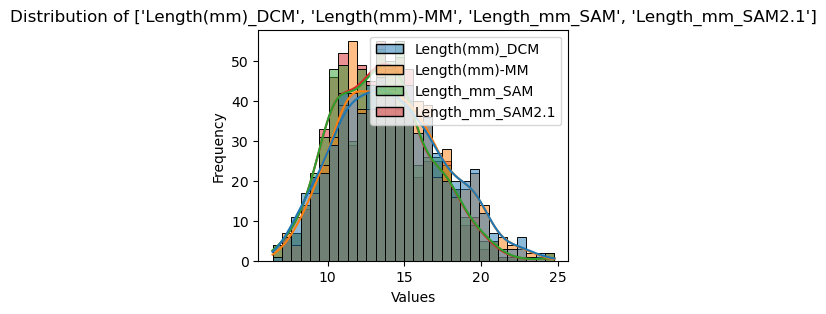


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=0.9876619920669645, pvalue=2.536992355392979e-05)

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=0.9862363150561713, pvalue=7.865749677357495e-06)

Shapiro-Wilk Test for 'Length_mm_SAM': ShapiroResult(statistic=0.9897451819942966, pvalue=0.00015769112818821702)

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=0.9895313568197072, pvalue=0.0001298366486579713)

Levene's Test for equality of variances: LeveneResult(statistic=5.09352296328843, pvalue=0.0016234192251035927)

Paired t-test between 'Length(mm)_DCM' and 'Length(mm)-MM': TtestResult(statistic=-4.14897840234491, pvalue=3.7814231605162485e-05, df=653)
Wilcoxon Signed-Rank Test between 'Length(mm)_DCM' and 'Length(mm)-MM': WilcoxonResult(statistic=89547.0, pvalue=0.00028355526625560996)
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=0.9933047192845537, pvalue=0.0)
Spearman correlation betw

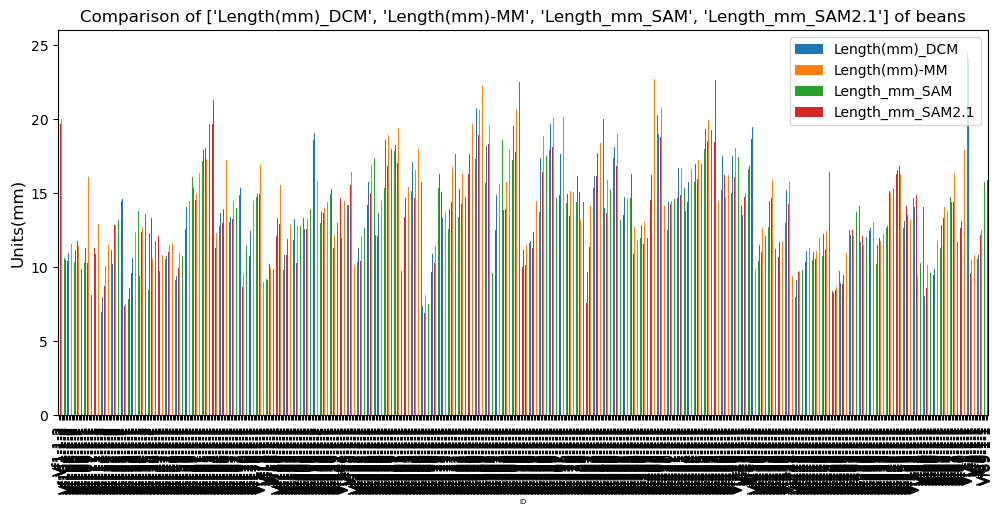

<Figure size 200x100 with 0 Axes>

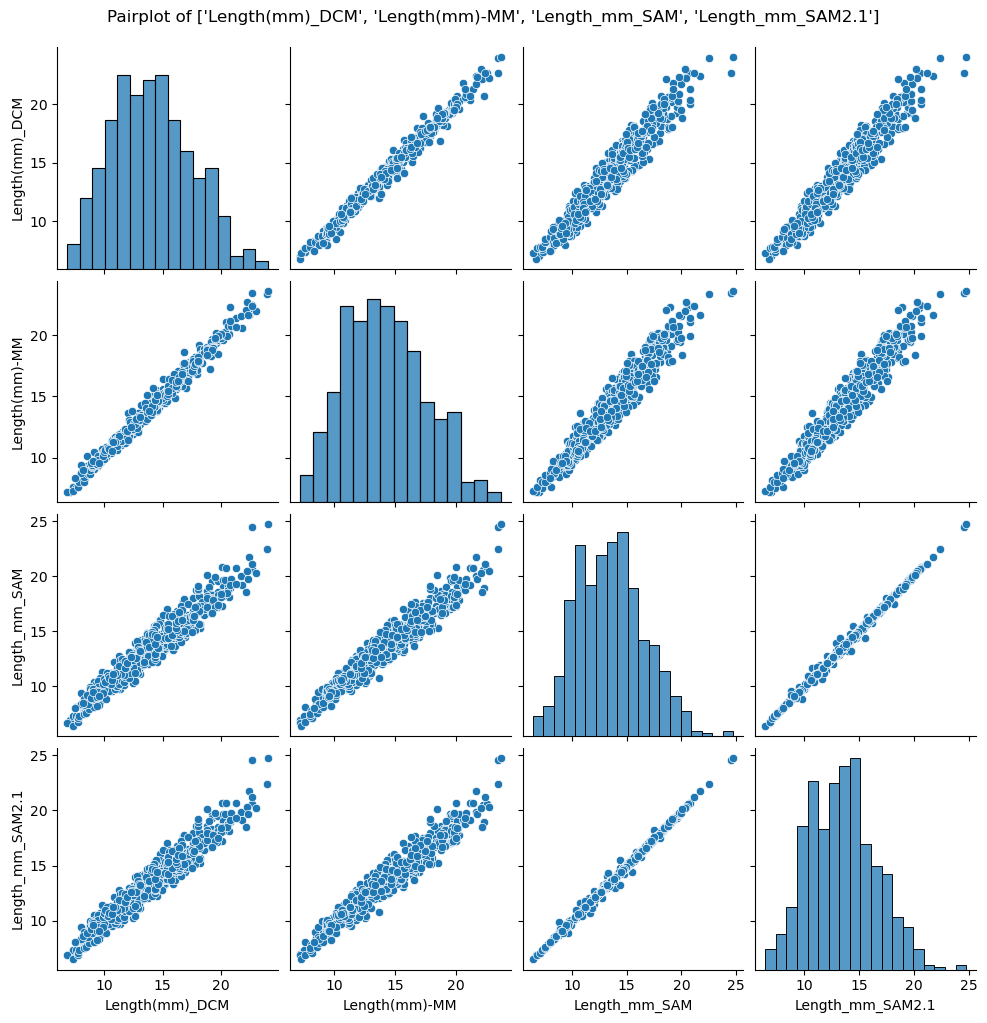

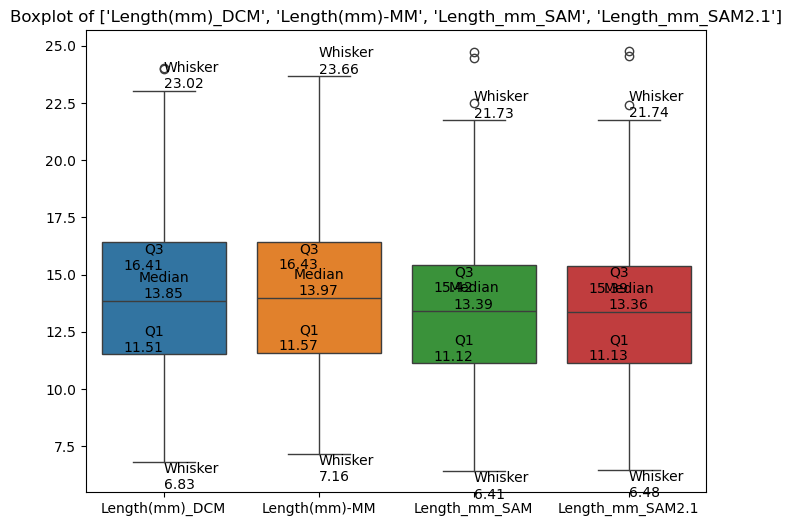

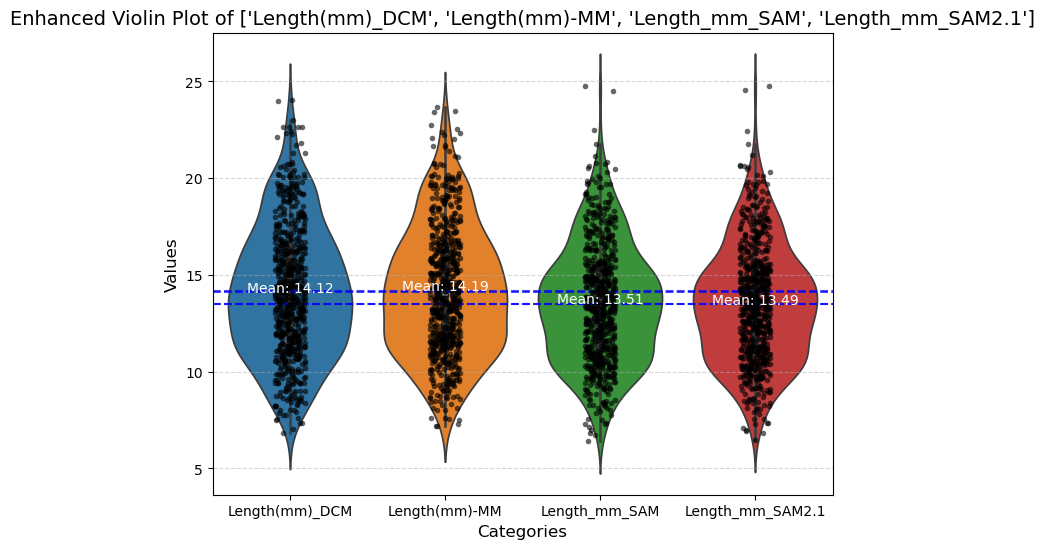

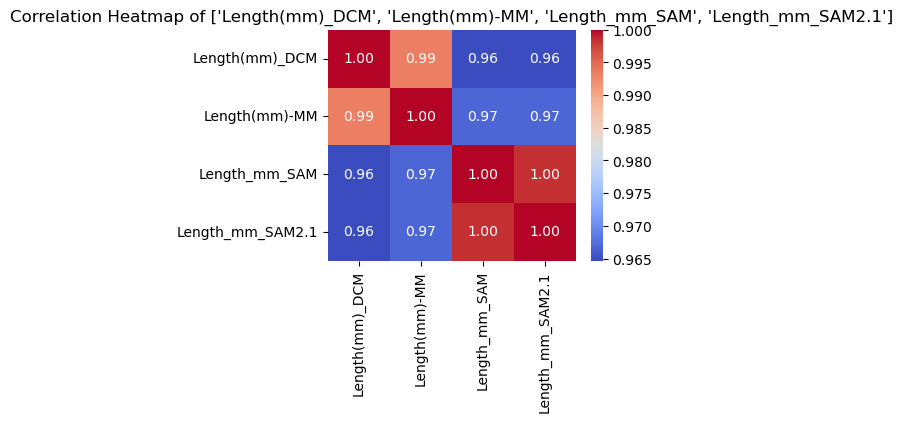

In [93]:
# Perform analysis on both sets of columns
analyze_columns(df_100, ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1'])

### Results of statistical analysis:
Skewness: All variables show a slight positive skew (0.29–0.35), indicating mild asymmetry with a longer right tail.
Kurtosis: All values are negative (-0.44 to -0.06), indicating a platykurtic distribution (flatter than normal).
Shapiro-Wilk test: Since all p-values are less than 0.05, we reject the null hypothesis of normality. None of the variables follow a normal distribution.
Levene’s test was conducted to assess variance equality: Statistic: 5.09, p-value: 0.0016. Since p < 0.05, the test indicates unequal variances across the variables, which suggests that parametric tests assuming equal variances (e.g., ANOVA) may be less reliable.
Parametric (paired t-test) and non-parametric (Wilcoxon Signed-Rank Test) methods: Since all p-values are below 0.05, there are statistically significant differences between all pairs of variables.The Wilcoxon signed-rank test is a non-parametric test used to compare two related groups when the assumption of normality is not met. It assesses whether the median difference between paired samples is significantly different from zero.

Pearson and Spearman Correlations: All variables are strongly correlated (r > 0.96), with SAM and SAM2.1 showing almost perfect correlation (r ≈ 0.998)
ANOVA (Parametric): Since p < 0.05, there are significant differences among the variables.
Kruskal-Wallis Test (Non-Parametric): Since p < 0.05, there are significant differences among the groups (aligned with ANOVA).

Pairplot: The pair plots provide a visual comparison of the relationships between different variables for all the  methods. From the scatterplot distributions, digital caliper measured data and seed analyzer measured data highly overlap with each other. However, SAM generated data has a slightly wider spread, suggesting a slightly higher variability than from all methods.

Boxplot and violin-plot: When analyzing data using box plots and violin plots, it suggests that the data across different groups or categories exhibit comparable central tendencies, spreads, and overall distributions. In a box plot, this is reflected as nearly identical medians, interquartile ranges (IQRs), and whisker lengths, indicating minimal variation between groups. Similarly, violin plots would show overlapping or similarly shaped density distributions, reinforcing the notion that the data follows a consistent pattern across categories. Such findings suggest uniformity in the dataset, with no significant differences in spread or central tendency, which may indicate stability in the measured variable across different conditions or groups.

Correlation heatmap:
The correlation analysis between all the methods reveal an exceptionally strong relationship, with correlation values ranging from 0.98 to 0.99 across different methods. These values indicate an almost perfect linear association, suggesting that all the methods produce highly similar results. Such high correlation implies that changes in one method are nearly mirrored by the other, reinforcing their consistency and reliability. This strong agreement also suggests that either method could be used interchangeably for analysis without significant loss of accuracy.

 



In [94]:
#Effect size for length
effect_size(df_100, ["Length(mm)_DCM", "Length(mm)-MM"])
effect_size(df_100, ["Length(mm)_DCM", "Length_mm_SAM2.1"])
effect_size(df_100, ["Length_mm_SAM", "Length_mm_SAM2.1"])
effect_size(df_100, ["Length(mm)-MM", "Length_mm_SAM2.1"])

The Cohen's d for Length(mm)_DCM and Length(mm)-MM: -0.019 
Effect Size Interpretation for Length(mm)_DCM and Length(mm)-MM: Small (negligible)
The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: 0.194 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small (negligible)
The Cohen's d for Length_mm_SAM and Length_mm_SAM2.1: 0.005 
Effect Size Interpretation for Length_mm_SAM and Length_mm_SAM2.1: Small (negligible)
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: 0.217 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small to Medium


#### Most comparisons show negligible to small effect sizes, meaning that the differences between the groups are minimal. Only the seed analyzer measured to SAM2.1 measured data comparison (d = 0.217) starts to approach a meaningful effect size, though it is still relatively small. These results suggest that the groups are quite similar in terms of the measured characteristic.

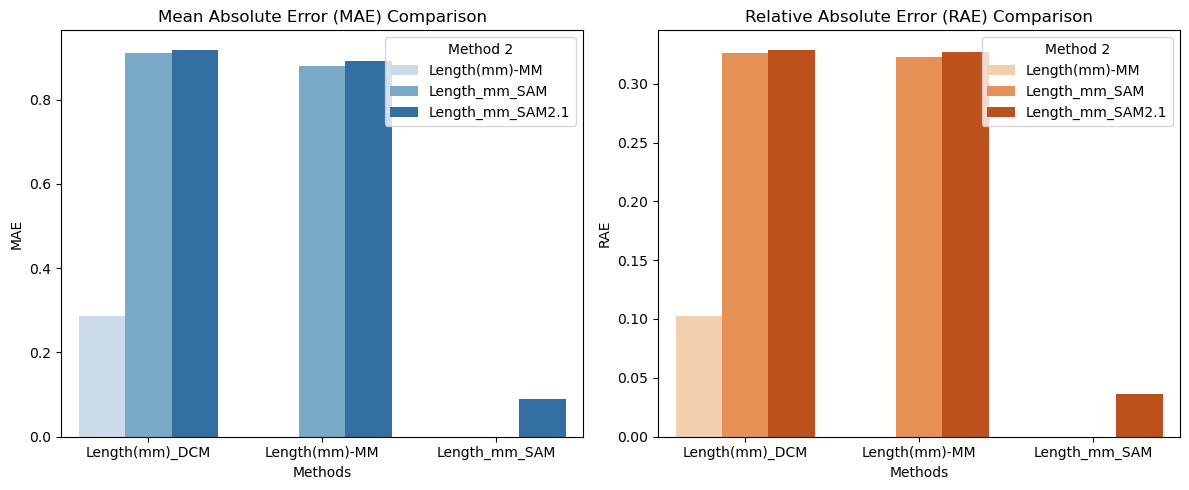

         Method 1          Method 2       MAE       RAE  SE (Method 1)  \
0  Length(mm)_DCM     Length(mm)-MM  0.286633  0.102605       0.133713   
1  Length(mm)_DCM     Length_mm_SAM  0.911266  0.326203       0.133713   
2  Length(mm)_DCM  Length_mm_SAM2.1  0.919038  0.328985       0.133713   
3   Length(mm)-MM     Length_mm_SAM  0.880340  0.323028       0.130168   
4   Length(mm)-MM  Length_mm_SAM2.1  0.891552  0.327142       0.130168   
5   Length_mm_SAM  Length_mm_SAM2.1  0.089487  0.036047       0.120264   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       0.130168                13.859596                14.384716   
1       0.120264                13.859596                14.384716   
2       0.119286                13.859596                14.384716   
3       0.120264                13.931583                14.442781   
4       0.119286                13.931583                14.442781   
5       0.119286                13.272785                13.7

In [95]:
result_df = compare_methods(df_100, ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1'])
print(result_df.head(20))

The comparison of methods based on MAE, RAE, standard error, and confidence intervals indicates a strong agreement between them, with minimal differences in performance. The Mean Absolute Error (MAE) values, ranging from 0.089 to 0.919, suggest that while most method pairs exhibit small deviations, a few have slightly higher discrepancies. The Relative Absolute Error (RAE) values remain consistently low, reinforcing the similarity between methods. Additionally, the Standard Error (SE) values for both methods are close in range, indicating comparable variability. The 95% Confidence Intervals (CIs) for both methods overlap significantly, suggesting that any differences observed may not be statistically significant. Overall, the results demonstrate a high level of consistency between the methods, implying that either could be used interchangeably with confidence, though minor variations should be considered in cases where error values are slightly higher.

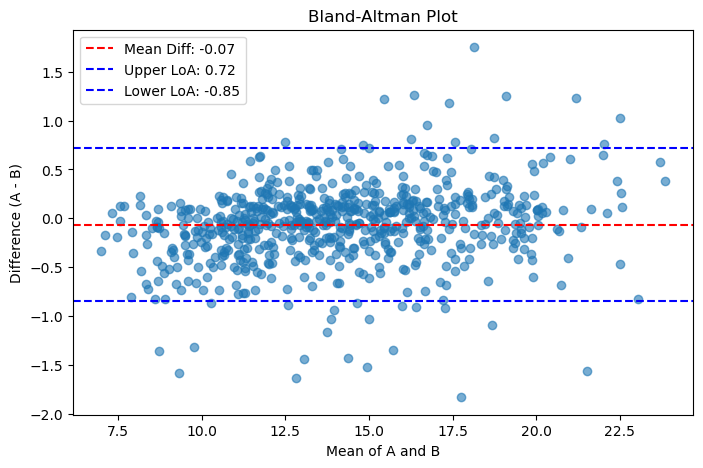

In [96]:
bland_altman_plot(df_100["Length(mm)_DCM"], df_100["Length(mm)-MM"])

The Bland-Altman analysis evaluates the agreement between the two methods by assessing the mean difference and limits of agreement (LOA). The results indicate a mean difference of -0.07, suggesting a slight negative bias, meaning that one method tends to give slightly lower values than the other on average. The upper limit of agreement (LOA) is 0.72, while the lower LOA is -0.85, implying that most differences between the methods fall within this range. Since the limits of agreement are relatively small, the two methods demonstrate good agreement, with only minor variations.

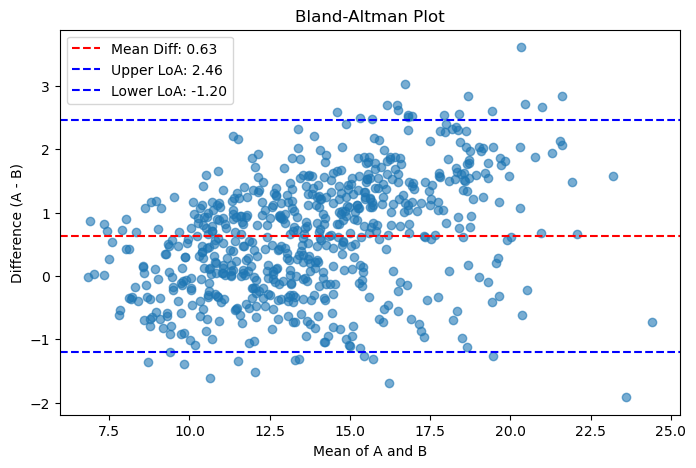

In [97]:
bland_altman_plot(df_100["Length(mm)_DCM"], df_100["Length_mm_SAM2.1"])

The results show a mean difference of 0.63, indicating a slight positive bias, meaning that one method consistently produces higher values than the other. The upper limit of agreement (LOA) is 2.46, while the lower LOA is -1.2, suggesting that most differences between the methods fall within this range. While the limits are relatively wide, the methods may still be considered in agreement if this range is within an acceptable threshold for practical or clinical applications. 

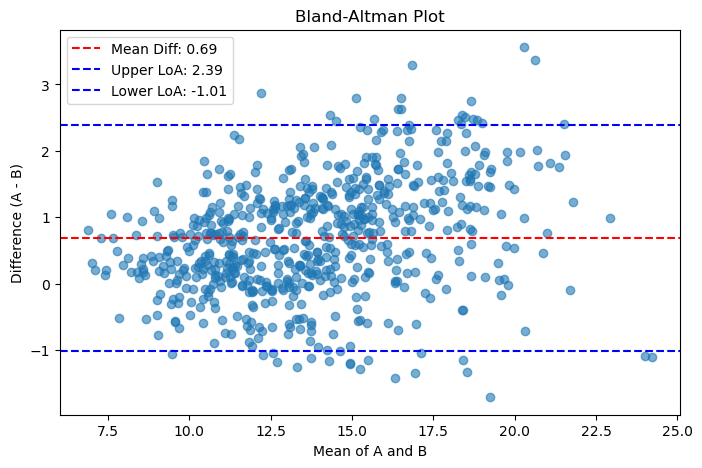

In [98]:
bland_altman_plot(df_100["Length(mm)-MM"], df_100["Length_mm_SAM2.1"])

Similar results were obtained with seed analyzer measured and SAM measured data

#### 2. Comparison of Width (mm) for Machine-measured, Hand-measured and SAM-measured data


Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM  Width_mm_SAM2.1
count     654.000000    654.000000    654.000000       654.000000
mean       10.514388     10.625122     11.170289        11.210492
std         2.392226      2.382438      2.681718         2.677524
min         5.530000      5.398641      5.416548         5.524894
25%         8.820000      8.982989      9.243191         9.288415
50%        10.235000     10.335893     10.787108        10.823544
75%        12.027500     12.088319     12.917037        12.930065
max        18.770000     19.272344     20.885527        20.879527

Skewness:
 Width(mm)_DCM      0.459350
Width(mm)-MM       0.459872
Width_mm_SAM       0.486044
Width_mm_SAM2.1    0.501940
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.042306
Width(mm)-MM      -0.053693
Width_mm_SAM      -0.049298
Width_mm_SAM2.1   -0.045081
dtype: float64


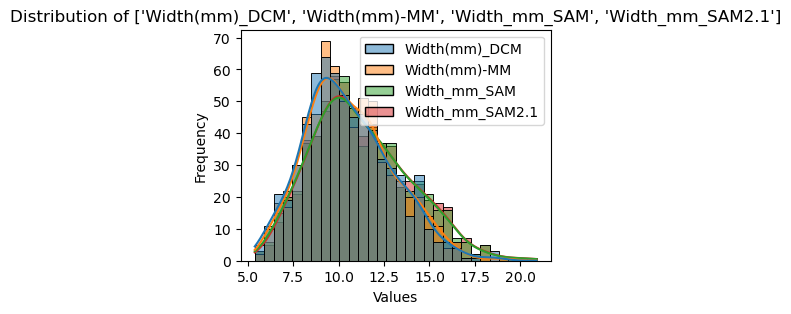


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=0.9834037500301681, pvalue=9.056093320263652e-07)

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=0.9832729289613371, pvalue=8.234913251091502e-07)

Shapiro-Wilk Test for 'Width_mm_SAM': ShapiroResult(statistic=0.981810655775438, pvalue=2.9207271726364933e-07)

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=0.9804696182434849, pvalue=1.1740701522839614e-07)

Levene's Test for equality of variances: LeveneResult(statistic=5.042018963467918, pvalue=0.0017451754245974133)

Paired t-test between 'Width(mm)_DCM' and 'Width(mm)-MM': TtestResult(statistic=-4.645707344324114, pvalue=4.100274152986918e-06, df=653)
Wilcoxon Signed-Rank Test between 'Width(mm)_DCM' and 'Width(mm)-MM': WilcoxonResult(statistic=83304.0, pvalue=8.590408527182792e-07)
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=0.9674113457183836, pvalue=0.0)
Spearman correlation between 'Width

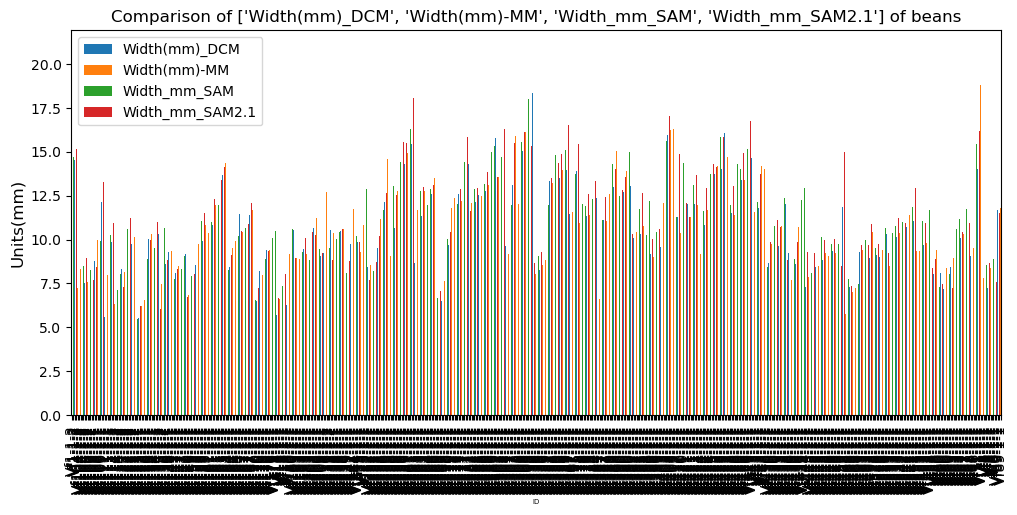

<Figure size 200x100 with 0 Axes>

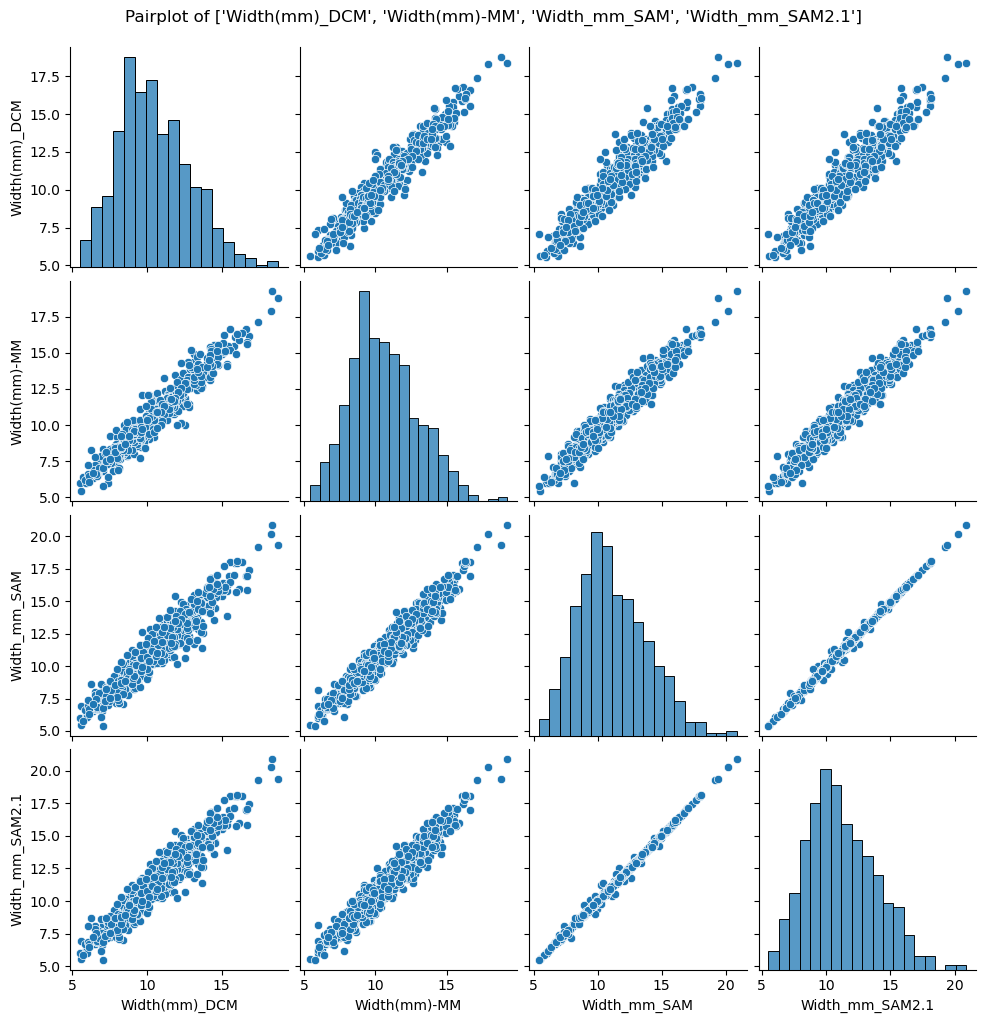

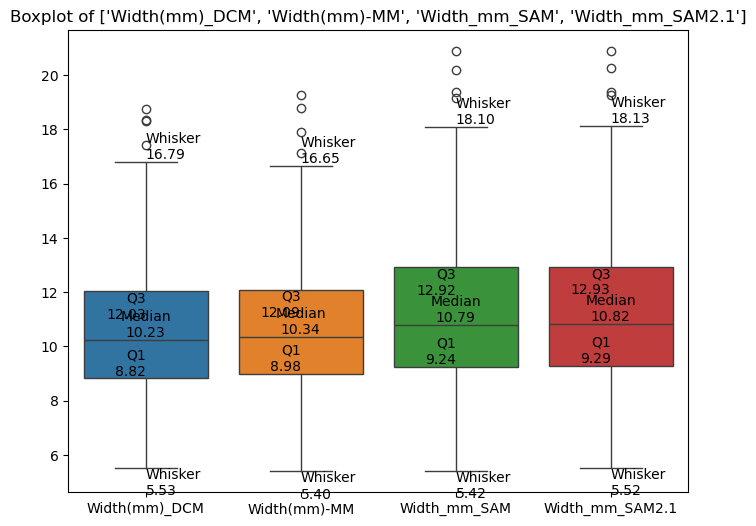

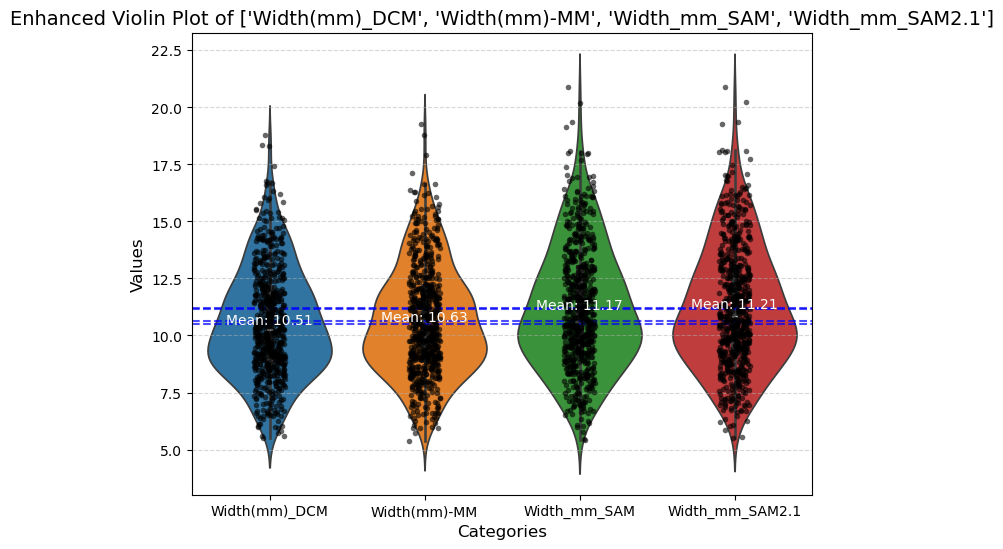

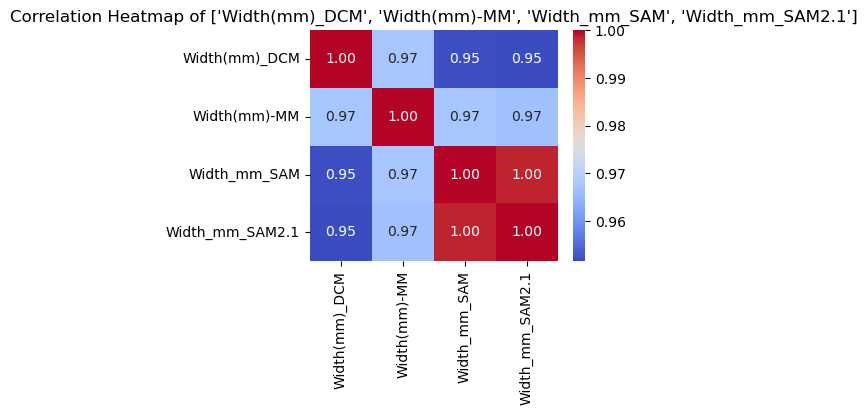

In [99]:
analyze_columns(df_100, ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1'])

The analysis reveals that all variables exhibit a slight positive skew (0.45–0.5) and a platykurtic distribution (-0.4 to -0.5). The Shapiro-Wilk test confirms non-normality (p < 0.05), while Levene’s test indicates significantly different variances (p = 0.0017). Both paired t-tests and Wilcoxon Signed-Rank tests show statistically significant differences between all variable pairs. Strong correlations are observed across groups (Pearson and Spearman), and both ANOVA and Kruskal-Wallis tests confirm significant differences among variables (p < 0.05).

In [100]:
# Cohen-s d test for Width
effect_size(df_100, ["Width(mm)_DCM", "Width(mm)-MM"])
effect_size(df_100, ["Width(mm)_DCM", "Width_mm_SAM2.1"])
effect_size(df_100, ["Width_mm_SAM", "Width_mm_SAM2.1"])
effect_size(df_100, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width(mm)-MM: -0.046 
Effect Size Interpretation for Width(mm)_DCM and Width(mm)-MM: Small (negligible)
The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.274 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width_mm_SAM and Width_mm_SAM2.1: -0.015 
Effect Size Interpretation for Width_mm_SAM and Width_mm_SAM2.1: Small (negligible)
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.231 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


#### The comparisons show negligible to small effect sizes for all the methods. These results suggest that the groups are quite similar in terms of the measured characteristic.

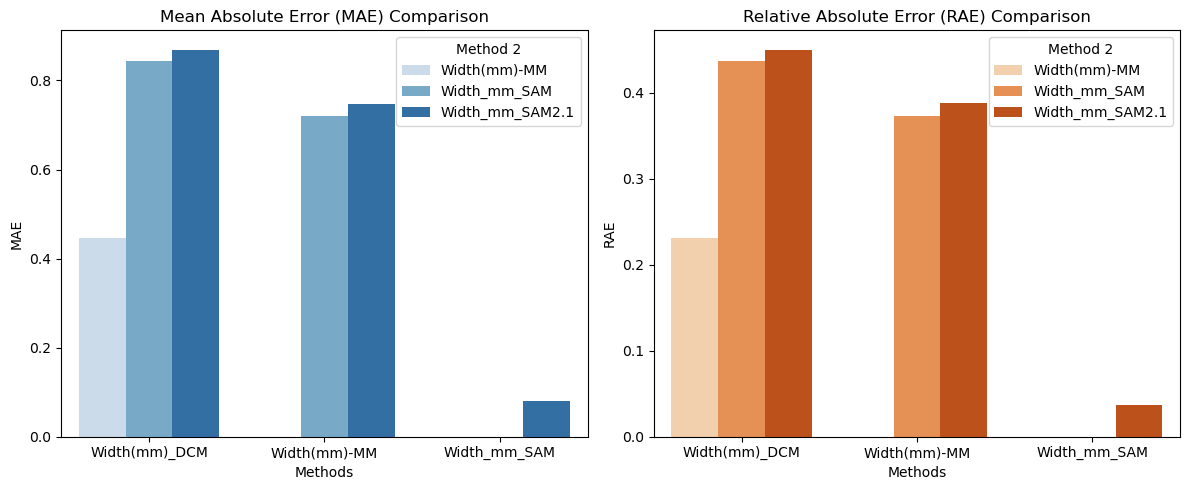

        Method 1         Method 2       MAE       RAE  SE (Method 1)  \
0  Width(mm)_DCM     Width(mm)-MM  0.446918  0.231311       0.093543   
1  Width(mm)_DCM     Width_mm_SAM  0.844435  0.437053       0.093543   
2  Width(mm)_DCM  Width_mm_SAM2.1  0.869211  0.449876       0.093543   
3   Width(mm)-MM     Width_mm_SAM  0.719643  0.372879       0.093161   
4   Width(mm)-MM  Width_mm_SAM2.1  0.747555  0.387341       0.093161   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       0.093161                10.330706                10.698071   
1       0.104863                10.330706                10.698071   
2       0.104699                10.330706                10.698071   
3       0.104863                10.442191                10.808053   
4       0.104699                10.442191                10.808053   

   95% CI Lower (Method 2)  95% CI Upper (Method 2)  
0                10.442191                10.808053  
1                10.964379            

In [101]:
result_df = compare_methods(df_100, ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1'])
print(result_df.head())

The MAE values range from 0.446 to 0.869, with corresponding RAE values between 0.231 and 0.449, suggesting varying degrees of error across methods. The Standard Errors (SE) for both methods are relatively small (0.093–0.104), indicating stable estimates. The 95% Confidence Intervals (CI) show that the range of true values for Method 1 falls between 10.33 and 10.81, while for Method 2, it ranges from 10.44 to 11.42, depending on the comparison. These results highlight noticeable differences in performance, with some methods exhibiting higher errors and variability. 

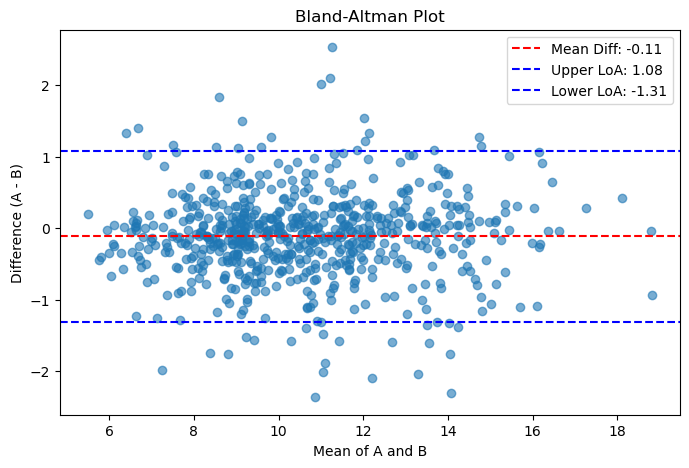

In [102]:
bland_altman_plot(df_100["Width(mm)_DCM"], df_100["Width(mm)-MM"])

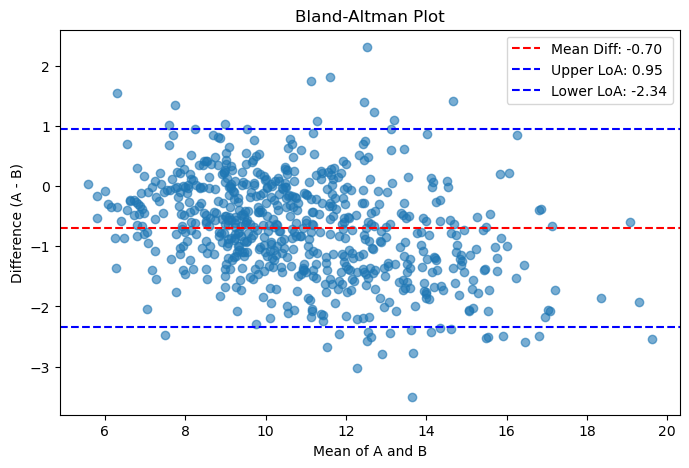

In [103]:
bland_altman_plot(df_100["Width(mm)_DCM"], df_100["Width_mm_SAM2.1"])

For both the comaparison analysis of digital caliper, seed measured and SAM measured data, the results indicate a negligible mean difference, suggesting a slight negative bias, meaning that one method tends to give slightly lower values than the other on average. The upper limit of agreement (LOA) and the lower LOA implies that most differences between the methods fall within this range. Since the limits of agreement are relatively small, all the methods demonstrate good agreement, with only minor variations.

## 3. Comparison of Area (mm2) for Machine-measured and SAM-measured data


Analyzing columns: ['Area(mm²)-MM', 'Area_mm2_SAM', 'Area_mm2_SAM2.1']

Descriptive Statistics:
        Area(mm²)-MM  Area_mm2_SAM  Area_mm2_SAM2.1
count    654.000000    654.000000       654.000000
mean     121.995103    124.823503       125.060164
std       55.416553     57.216004        57.021537
min       29.823068     31.624631        32.060015
25%       80.526929     81.177159        81.361575
50%      112.068772    113.743949       114.399646
75%      150.818929    155.038380       154.702175
max      351.741399    404.184095       404.538547

Skewness:
 Area(mm²)-MM       0.876321
Area_mm2_SAM       0.972504
Area_mm2_SAM2.1    0.983432
dtype: float64

Kurtosis:
 Area(mm²)-MM       0.629327
Area_mm2_SAM       1.247058
Area_mm2_SAM2.1    1.287499
dtype: float64


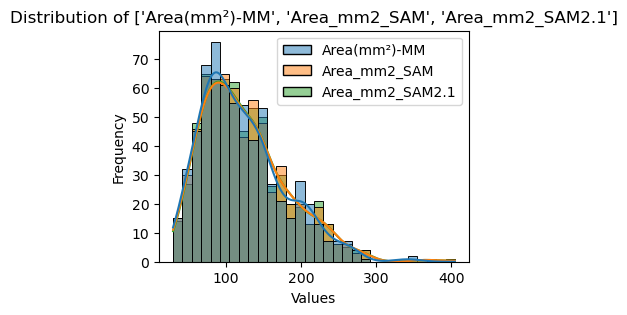


Shapiro-Wilk Test for 'Area(mm²)-MM': ShapiroResult(statistic=0.9463953371814124, pvalue=1.2156771498162626e-14)

Shapiro-Wilk Test for 'Area_mm2_SAM': ShapiroResult(statistic=0.9425623127309336, pvalue=3.2594594796434112e-15)

Shapiro-Wilk Test for 'Area_mm2_SAM2.1': ShapiroResult(statistic=0.941670682301546, pvalue=2.420990539659837e-15)

Levene's Test for equality of variances: LeveneResult(statistic=0.13001751362200256, pvalue=0.8780876288925863)

Paired t-test between 'Area(mm²)-MM' and 'Area_mm2_SAM': TtestResult(statistic=-7.897645975331092, pvalue=1.207024555338494e-14, df=653)
Wilcoxon Signed-Rank Test between 'Area(mm²)-MM' and 'Area_mm2_SAM': WilcoxonResult(statistic=70459.0, pvalue=3.4856681389671684e-14)
Pearson correlation between 'Area(mm²)-MM' and 'Area_mm2_SAM': PearsonRResult(statistic=0.9872831340150103, pvalue=0.0)
Spearman correlation between 'Area(mm²)-MM' and 'Area_mm2_SAM': SignificanceResult(statistic=0.988012069985427, pvalue=0.0)

Paired t-test between 'Area

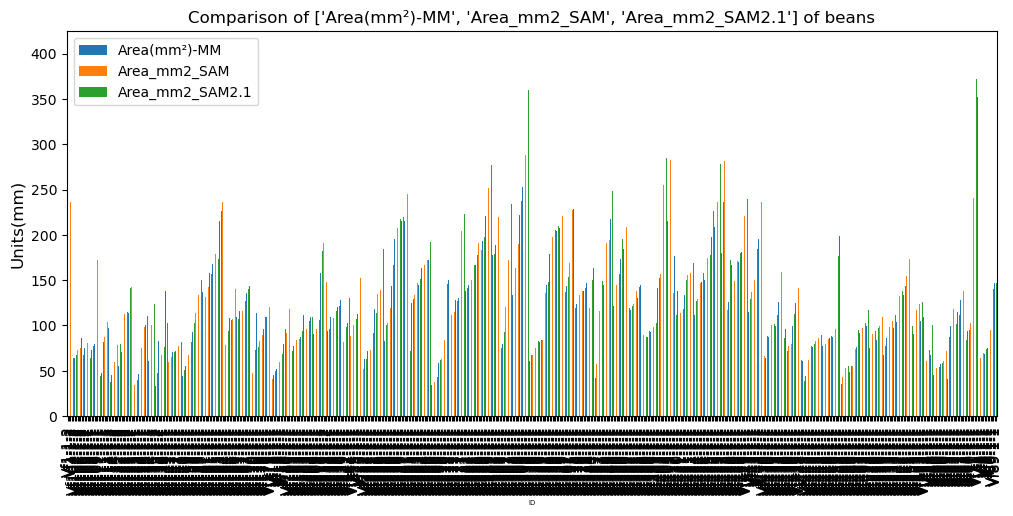

<Figure size 200x100 with 0 Axes>

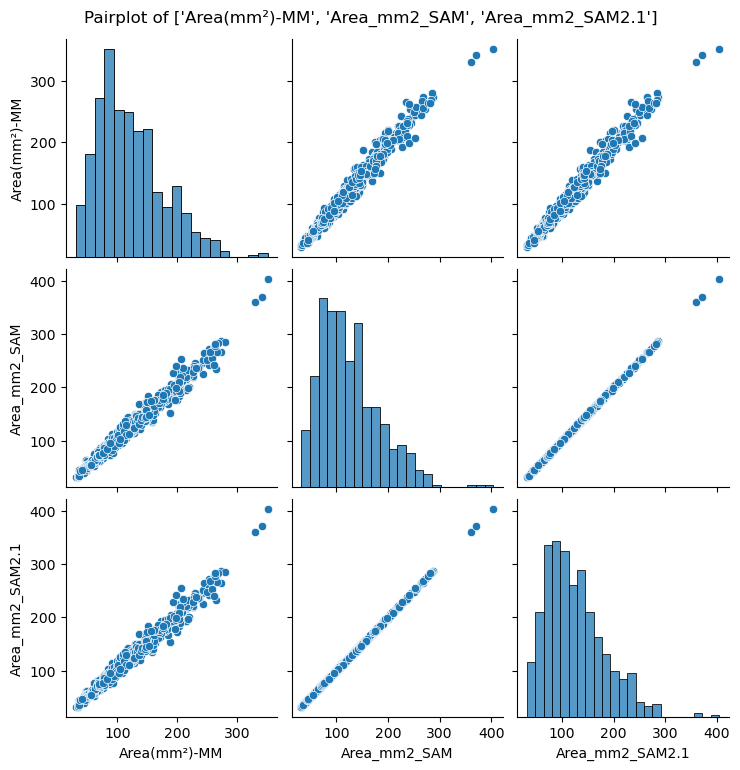

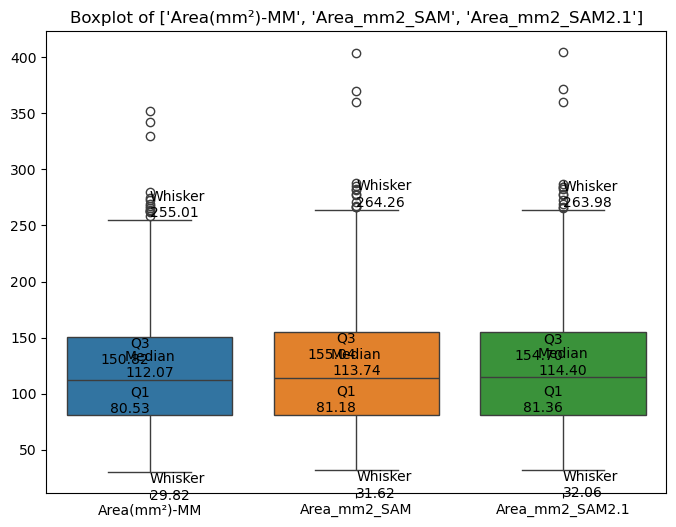

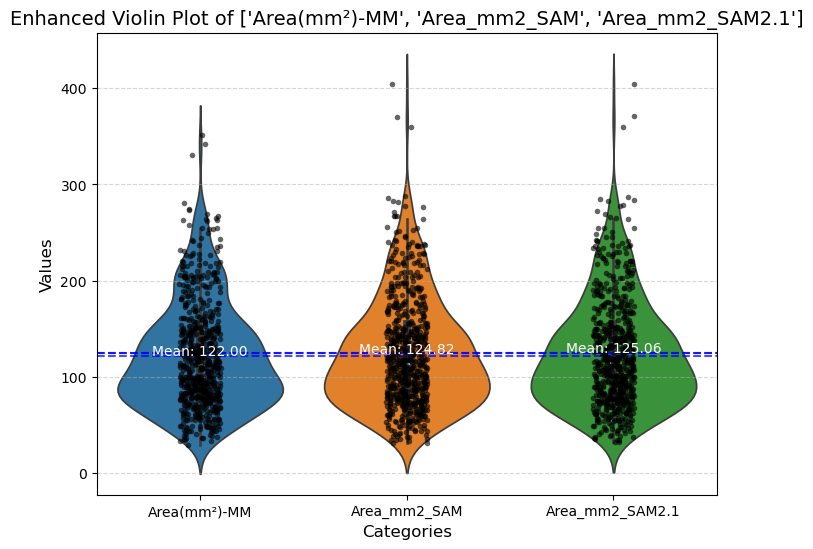

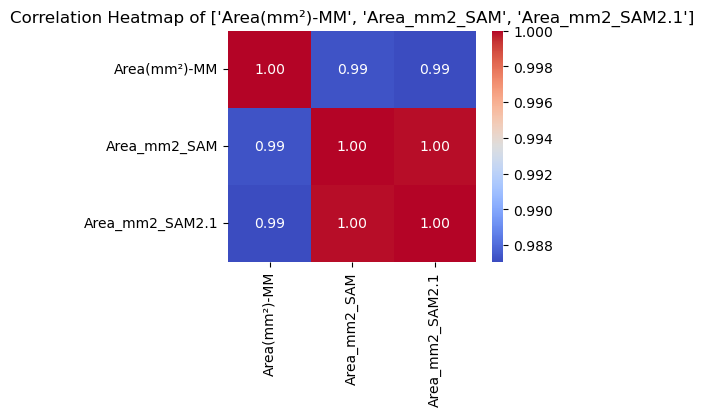

In [104]:
analyze_columns(df_100, ['Area(mm²)-MM', 'Area_mm2_SAM', 'Area_mm2_SAM2.1'])

Extremely significant correlation relationshiop was observed between seed analyzer, digital-caliper measured data and SAM measured data


In [105]:
# Cohen-s d test for Area in mm2
effect_size(df_100, ["Area(mm²)-MM", "Area_mm2_SAM"])
effect_size(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])
effect_size(df_100, ["Area_mm2_SAM", "Area_mm2_SAM2.1"])

The Cohen's d for Area(mm²)-MM and Area_mm2_SAM: -0.050 
Effect Size Interpretation for Area(mm²)-MM and Area_mm2_SAM: Small (negligible)
The Cohen's d for Area(mm²)-MM and Area_mm2_SAM2.1: -0.055 
Effect Size Interpretation for Area(mm²)-MM and Area_mm2_SAM2.1: Small (negligible)
The Cohen's d for Area_mm2_SAM and Area_mm2_SAM2.1: -0.004 
Effect Size Interpretation for Area_mm2_SAM and Area_mm2_SAM2.1: Small (negligible)


The results of Cohen's d test prove that there are negligible differences between the measurements of area from all the methods.


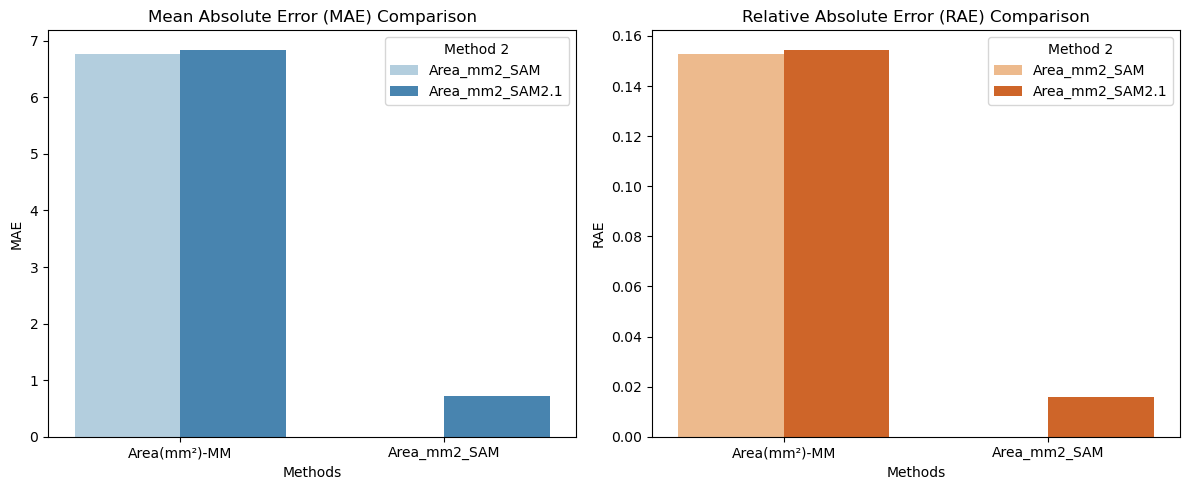

       Method 1         Method 2       MAE       RAE  SE (Method 1)  \
0  Area(mm²)-MM     Area_mm2_SAM  6.774449  0.152953       2.166959   
1  Area(mm²)-MM  Area_mm2_SAM2.1  6.843153  0.154505       2.166959   
2  Area_mm2_SAM  Area_mm2_SAM2.1  0.720235  0.015855       2.237323   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       2.237323               117.740055               126.250151   
1       2.229719               117.740055               126.250151   
2       2.229719               120.430288               129.216718   

   95% CI Lower (Method 2)  95% CI Upper (Method 2)  
0               120.430288               129.216718  
1               120.681881               129.438448  
2               120.681881               129.438448  


In [106]:
result_df = compare_methods(df_100, ['Area(mm²)-MM', 'Area_mm2_SAM', 'Area_mm2_SAM2.1'])
print(result_df.head())

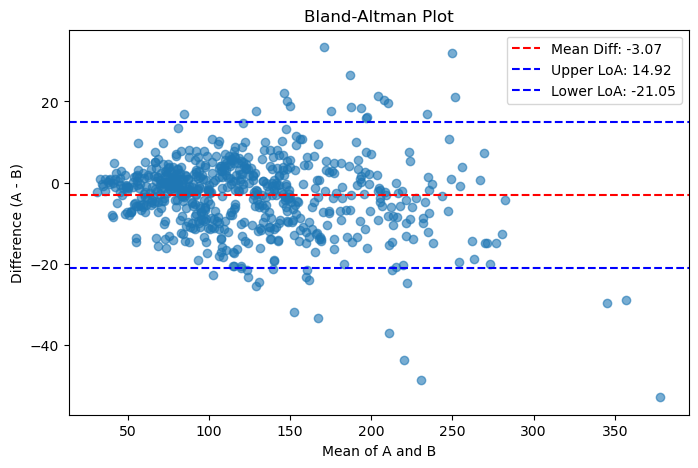

In [107]:
bland_altman_plot(df_100["Area(mm²)-MM"], df_100["Area_mm2_SAM2.1"])

MAE, SE also prove that there are negligible errors between the values generated from all the methods. Most of the values lie within the limits, suggesting that the values are close to each other.

## 4. Comparison of Aspect ratio for Machine-measured and SAM-measured data


Analyzing columns: ['L/W Ratio-MM', 'Aspect_Ratio', 'Aspect_Ratio_SAM2.1']

Descriptive Statistics:
        L/W Ratio-MM  Aspect_Ratio  Aspect_Ratio_SAM2.1
count    654.000000    654.000000           654.000000
mean       1.336251      1.369095             1.366273
std        0.116225      0.120785             0.120486
min        1.043063      1.054833             1.048560
25%        1.259614      1.286437             1.280426
50%        1.332967      1.360724             1.360267
75%        1.404184      1.440933             1.438052
max        1.988823      1.916574             1.912108

Skewness:
 L/W Ratio-MM           0.760982
Aspect_Ratio           0.655225
Aspect_Ratio_SAM2.1    0.633502
dtype: float64

Kurtosis:
 L/W Ratio-MM           2.411017
Aspect_Ratio           1.324468
Aspect_Ratio_SAM2.1    1.251613
dtype: float64


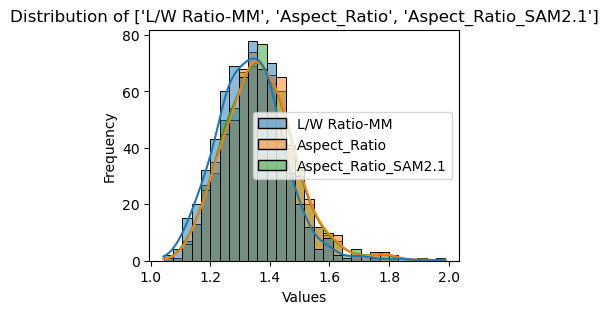


Shapiro-Wilk Test for 'L/W Ratio-MM': ShapiroResult(statistic=0.9693120991502897, pvalue=1.8205604721006987e-10)

Shapiro-Wilk Test for 'Aspect_Ratio': ShapiroResult(statistic=0.9762292330677521, pvalue=8.145369831118199e-09)

Shapiro-Wilk Test for 'Aspect_Ratio_SAM2.1': ShapiroResult(statistic=0.9777929319113997, pvalue=2.10438784443403e-08)

Levene's Test for equality of variances: LeveneResult(statistic=0.603572813384456, pvalue=0.5469559951362127)

Paired t-test between 'L/W Ratio-MM' and 'Aspect_Ratio': TtestResult(statistic=-9.110973998831216, pvalue=9.880434858375896e-19, df=653)
Wilcoxon Signed-Rank Test between 'L/W Ratio-MM' and 'Aspect_Ratio': WilcoxonResult(statistic=59234.0, pvalue=4.115421228803083e-23)
Pearson correlation between 'L/W Ratio-MM' and 'Aspect_Ratio': PearsonRResult(statistic=0.6980317278285868, pvalue=1.201705267721484e-96)
Spearman correlation between 'L/W Ratio-MM' and 'Aspect_Ratio': SignificanceResult(statistic=0.7031616375776247, pvalue=1.196353288685

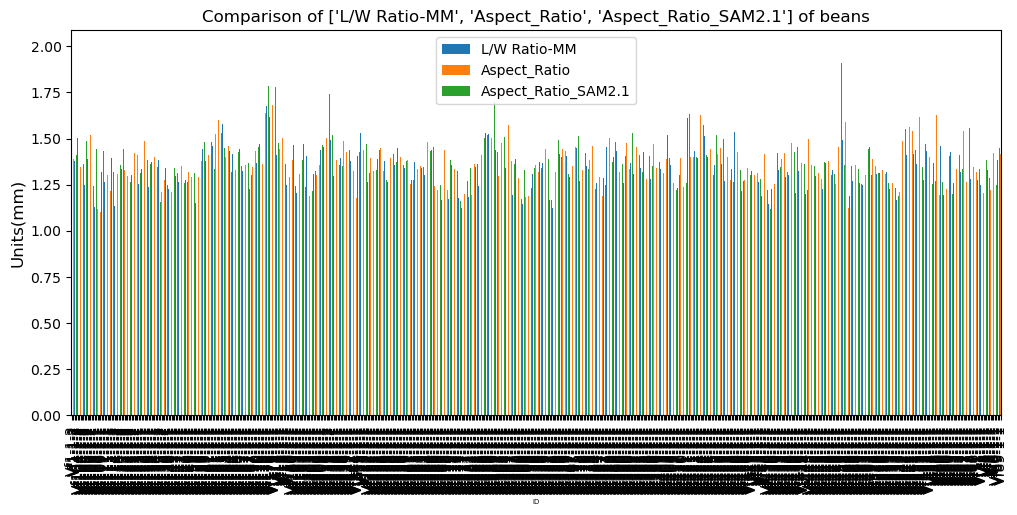

<Figure size 200x100 with 0 Axes>

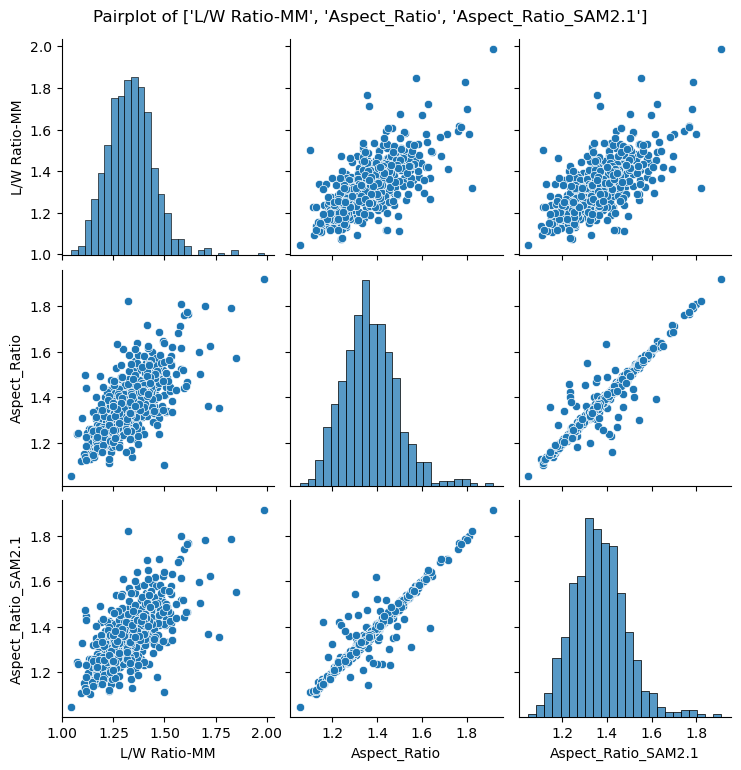

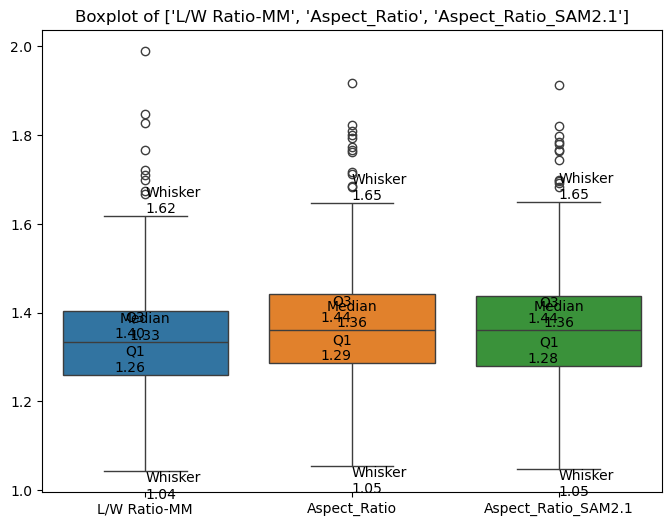

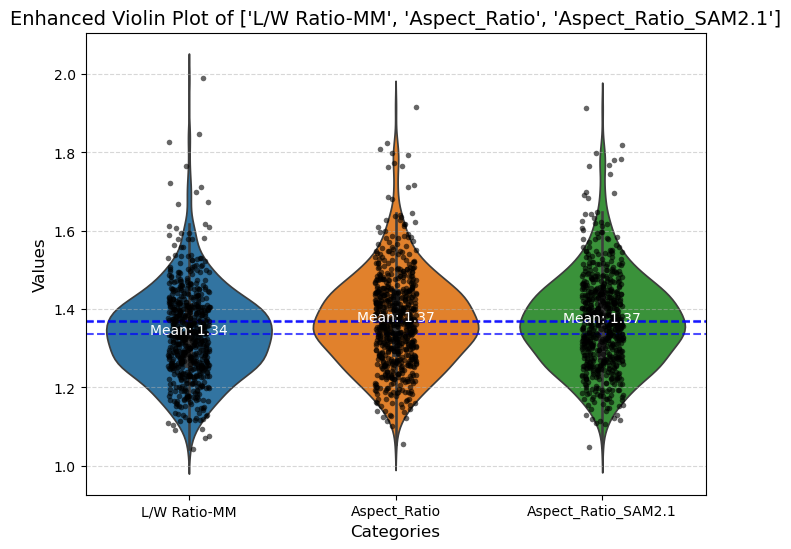

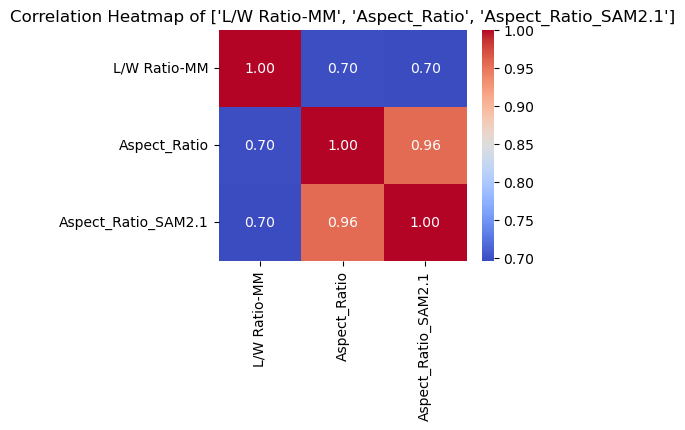

In [108]:
analyze_columns(df_100, ['L/W Ratio-MM', 'Aspect_Ratio', 'Aspect_Ratio_SAM2.1'])

Slightly different results were obtained from the aspect ratio. The values of seed analyzer and SAM data have positive correlation.

In [109]:
# Cohen-s d test for aspect ratio
effect_size(df_100, ['L/W Ratio-MM', 'Aspect_Ratio'])
effect_size(df_100, ['L/W Ratio-MM',  'Aspect_Ratio_SAM2.1'])
effect_size(df_100, ['Aspect_Ratio', 'Aspect_Ratio_SAM2.1'])

The Cohen's d for L/W Ratio-MM and Aspect_Ratio: -0.277 
Effect Size Interpretation for L/W Ratio-MM and Aspect_Ratio: Small to Medium
The Cohen's d for L/W Ratio-MM and Aspect_Ratio_SAM2.1: -0.254 
Effect Size Interpretation for L/W Ratio-MM and Aspect_Ratio_SAM2.1: Small to Medium
The Cohen's d for Aspect_Ratio and Aspect_Ratio_SAM2.1: 0.023 
Effect Size Interpretation for Aspect_Ratio and Aspect_Ratio_SAM2.1: Small (negligible)


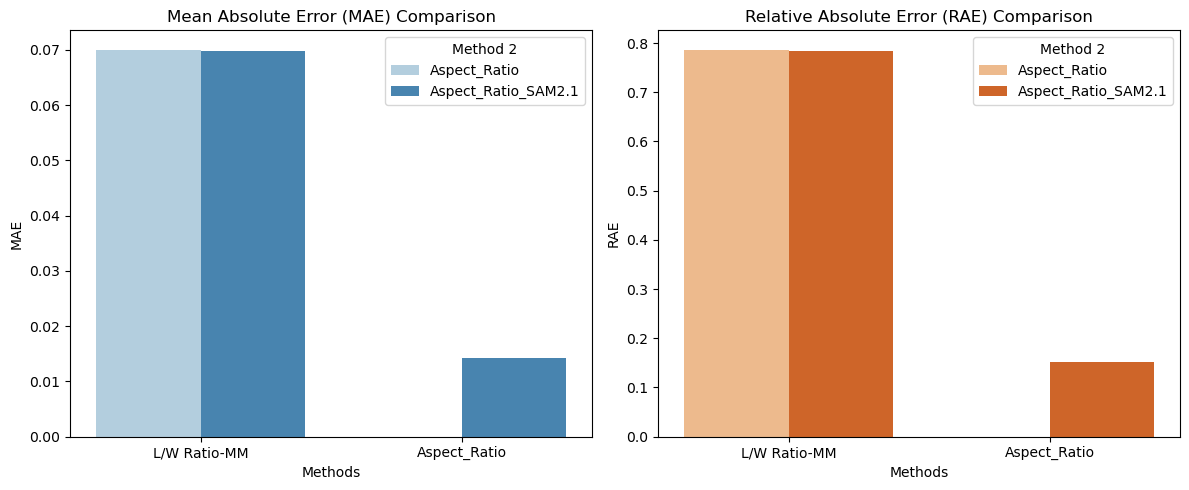

       Method 1             Method 2       MAE       RAE  SE (Method 1)  \
0  L/W Ratio-MM         Aspect_Ratio  0.070020  0.786611       0.004545   
1  L/W Ratio-MM  Aspect_Ratio_SAM2.1  0.069802  0.784169       0.004545   
2  Aspect_Ratio  Aspect_Ratio_SAM2.1  0.014186  0.152106       0.004723   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       0.004723                 1.327327                 1.345175   
1       0.004711                 1.327327                 1.345175   
2       0.004711                 1.359821                 1.378369   

   95% CI Lower (Method 2)  95% CI Upper (Method 2)  
0                 1.359821                 1.378369  
1                 1.357022                 1.375524  
2                 1.357022                 1.375524  


In [110]:
result_df = compare_methods(df_100, ['L/W Ratio-MM', 'Aspect_Ratio', 'Aspect_Ratio_SAM2.1'])
print (result_df.head())

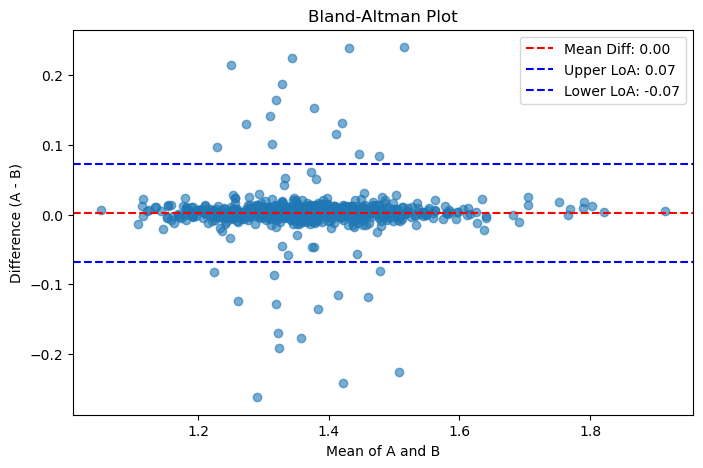

In [111]:
bland_altman_plot(df_100["Aspect_Ratio"], df_100["Aspect_Ratio_SAM2.1"])

Effect size, MAE and SE too prove that the data lies close to each other. Most of the points are lying within the limits and are close to each other. The data from all the three methods is similar to a great extent.

## 5. Comparison of Circularity for Machine-measured and SAM-measured data


Analyzing columns: ['Circularity-MM', 'Circularity_SAM', 'Circularity_SAM2.1']

Descriptive Statistics:
        Circularity-MM  Circularity_SAM  Circularity_SAM2.1
count      654.000000       654.000000          654.000000
mean         1.174498         1.168233            1.169202
std          0.031978         0.027462            0.027392
min          1.126595         1.112938            1.118923
25%          1.156012         1.150242            1.151076
50%          1.169448         1.163742            1.165642
75%          1.185703         1.182393            1.181822
max          1.461095         1.304880            1.329793

Skewness:
 Circularity-MM        3.183560
Circularity_SAM       1.451253
Circularity_SAM2.1    1.617460
dtype: float64

Kurtosis:
 Circularity-MM        18.798140
Circularity_SAM        3.920679
Circularity_SAM2.1     4.982357
dtype: float64


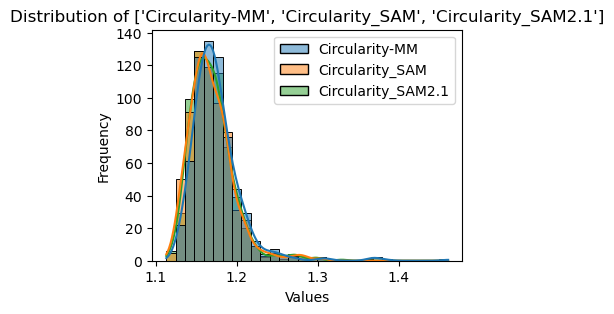


Shapiro-Wilk Test for 'Circularity-MM': ShapiroResult(statistic=0.7755164034514126, pvalue=5.653457867993861e-29)

Shapiro-Wilk Test for 'Circularity_SAM': ShapiroResult(statistic=0.9106303412190511, pvalue=3.6950185433001324e-19)

Shapiro-Wilk Test for 'Circularity_SAM2.1': ShapiroResult(statistic=0.8977803712277513, pvalue=1.8636591917879866e-20)

Levene's Test for equality of variances: LeveneResult(statistic=0.07167359252167031, pvalue=0.930837118450689)

Paired t-test between 'Circularity-MM' and 'Circularity_SAM': TtestResult(statistic=6.25388919225287, pvalue=7.236971749555517e-10, df=653)
Wilcoxon Signed-Rank Test between 'Circularity-MM' and 'Circularity_SAM': WilcoxonResult(statistic=69953.0, pvalue=1.5473088704233623e-14)
Pearson correlation between 'Circularity-MM' and 'Circularity_SAM': PearsonRResult(statistic=0.6379347399903772, pvalue=5.177451447069058e-76)
Spearman correlation between 'Circularity-MM' and 'Circularity_SAM': SignificanceResult(statistic=0.6740457050035

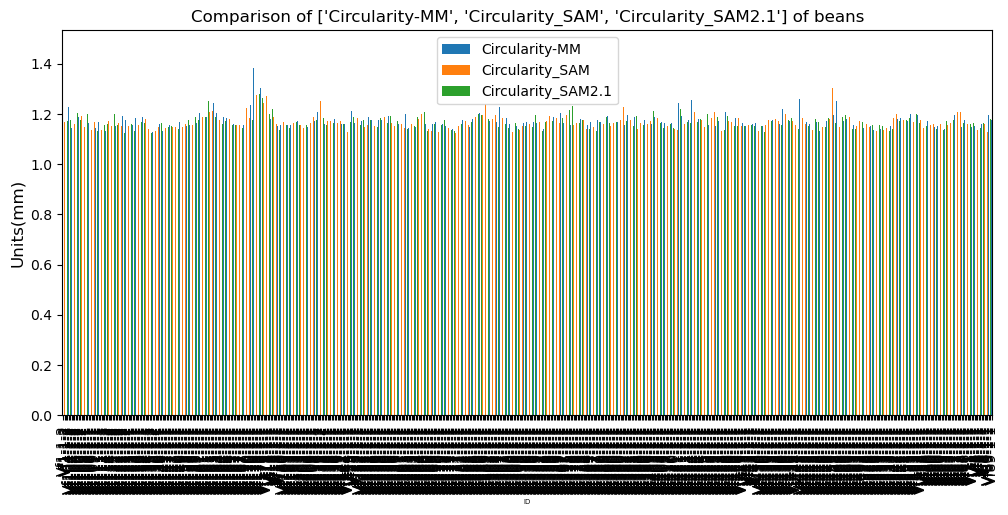

<Figure size 200x100 with 0 Axes>

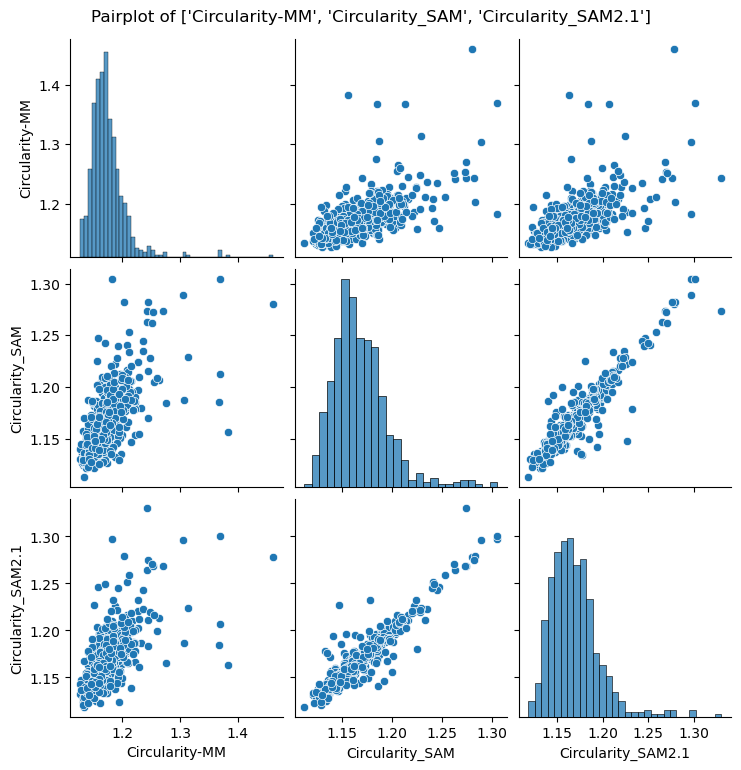

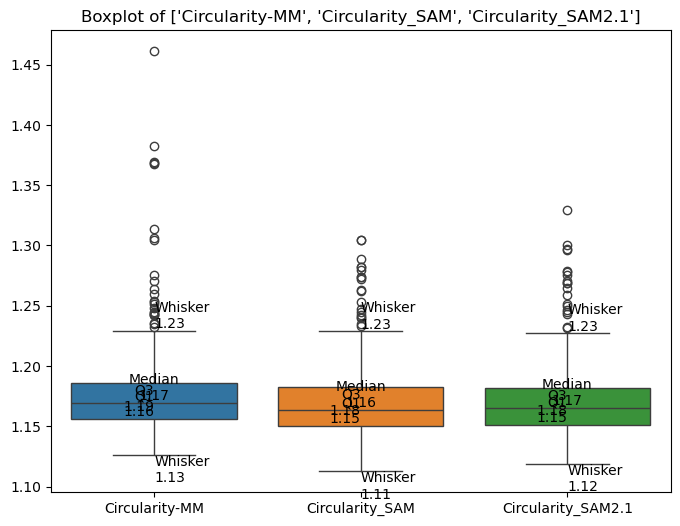

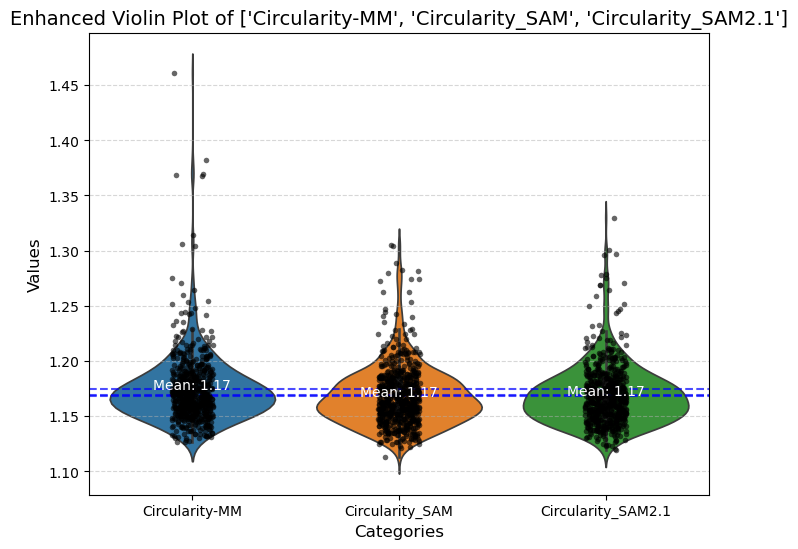

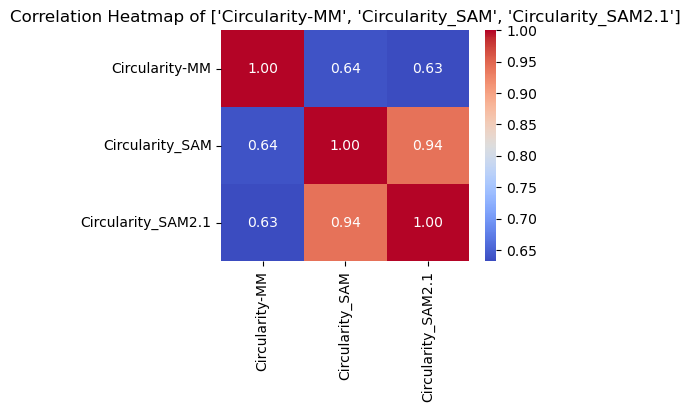

In [112]:
analyze_columns(df_100, ['Circularity-MM', 'Circularity_SAM', 'Circularity_SAM2.1'])

In [113]:
# Cohen-s d test for Area in pixels
effect_size(df_100, ["Circularity-MM", "Circularity_SAM"])
effect_size(df_100, ["Circularity-MM", "Circularity_SAM2.1"])
effect_size(df_100, ["Circularity_SAM", "Circularity_SAM2.1"])

The Cohen's d for Circularity-MM and Circularity_SAM: 0.210 
Effect Size Interpretation for Circularity-MM and Circularity_SAM: Small to Medium
The Cohen's d for Circularity-MM and Circularity_SAM2.1: 0.178 
Effect Size Interpretation for Circularity-MM and Circularity_SAM2.1: Small (negligible)
The Cohen's d for Circularity_SAM and Circularity_SAM2.1: -0.035 
Effect Size Interpretation for Circularity_SAM and Circularity_SAM2.1: Small (negligible)


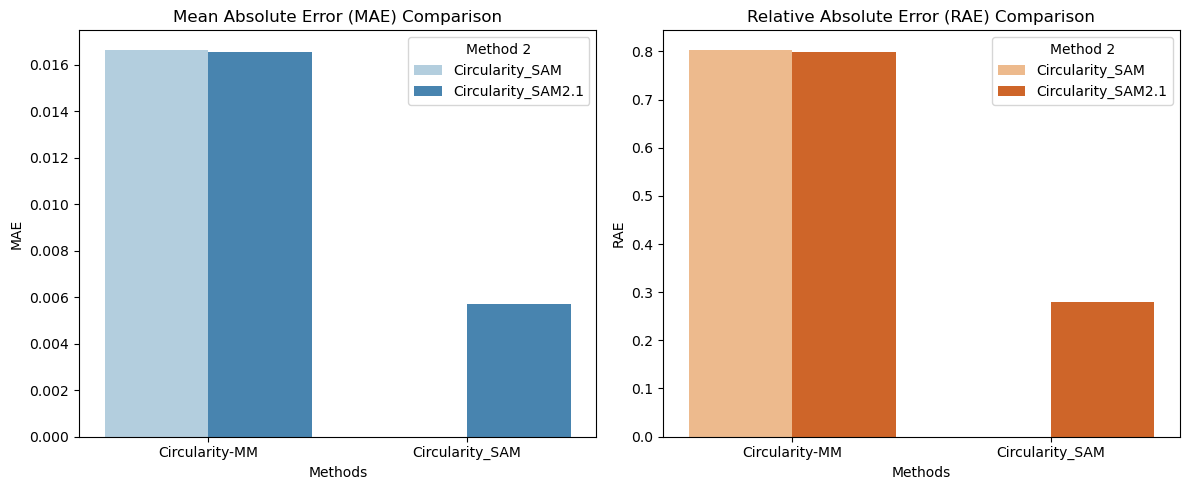

          Method 1            Method 2       MAE       RAE  SE (Method 1)  \
0   Circularity-MM     Circularity_SAM  0.016642  0.803729       0.001250   
1   Circularity-MM  Circularity_SAM2.1  0.016521  0.797913       0.001250   
2  Circularity_SAM  Circularity_SAM2.1  0.005711  0.280356       0.001074   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       0.001074                 1.172043                 1.176954   
1       0.001071                 1.172043                 1.176954   
2       0.001071                 1.166125                 1.170342   

   95% CI Lower (Method 2)  95% CI Upper (Method 2)  
0                 1.166125                 1.170342  
1                 1.167099                 1.171305  
2                 1.167099                 1.171305  


In [114]:
result_df = compare_methods(df_100, ['Circularity-MM', 'Circularity_SAM', 'Circularity_SAM2.1'])
print (result_df.head())

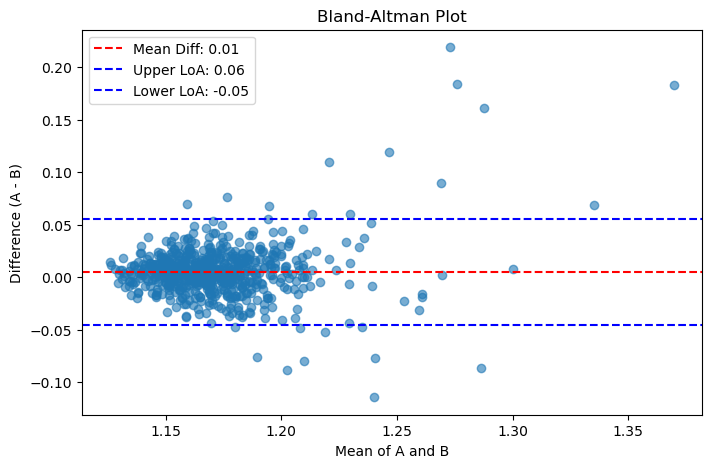

In [115]:
bland_altman_plot(df_100["Circularity-MM"], df_100["Circularity_SAM2.1"])

The results of circularity show different results as compared to seed analyzer generated data.

## 6. Comparison of Area (pixels) for Machine-measured and SAM-measured data


Analyzing columns: ['Area(pix)-MM', 'Area_pix_SAM', 'Area_pix_SAM2.1']

Descriptive Statistics:
        Area(pix)-MM   Area_pix_SAM  Area_pix_SAM2.1
count    654.000000     654.000000       654.000000
mean   17280.785933   79079.140673     79590.402141
std     7801.389417   36280.366999     36294.027458
min     4284.000000   19725.000000     20536.000000
25%    11442.750000   51951.250000     52345.250000
50%    15883.000000   72774.000000     72937.000000
75%    21347.250000   98734.250000     99365.500000
max    49571.000000  231595.000000    233409.000000

Skewness:
 Area(pix)-MM       0.872925
Area_pix_SAM       0.856571
Area_pix_SAM2.1    0.863162
dtype: float64

Kurtosis:
 Area(pix)-MM       0.620102
Area_pix_SAM       0.464345
Area_pix_SAM2.1    0.481551
dtype: float64


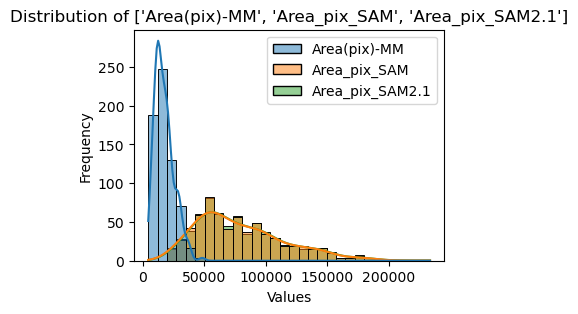


Shapiro-Wilk Test for 'Area(pix)-MM': ShapiroResult(statistic=0.9467413183206917, pvalue=1.3734007487818834e-14)

Shapiro-Wilk Test for 'Area_pix_SAM': ShapiroResult(statistic=0.946364528449848, pvalue=1.2025747366816919e-14)

Shapiro-Wilk Test for 'Area_pix_SAM2.1': ShapiroResult(statistic=0.945678524774751, pvalue=9.458073021789065e-15)

Levene's Test for equality of variances: LeveneResult(statistic=301.4260764790985, pvalue=7.396491714185195e-115)

Paired t-test between 'Area(pix)-MM' and 'Area_pix_SAM': TtestResult(statistic=-55.334929459554225, pvalue=1.0363171517206144e-248, df=653)
Wilcoxon Signed-Rank Test between 'Area(pix)-MM' and 'Area_pix_SAM': WilcoxonResult(statistic=0.0, pvalue=9.193570078255873e-109)
Pearson correlation between 'Area(pix)-MM' and 'Area_pix_SAM': PearsonRResult(statistic=0.9917814247635961, pvalue=0.0)
Spearman correlation between 'Area(pix)-MM' and 'Area_pix_SAM': SignificanceResult(statistic=0.993567942345896, pvalue=0.0)

Paired t-test between 'Area

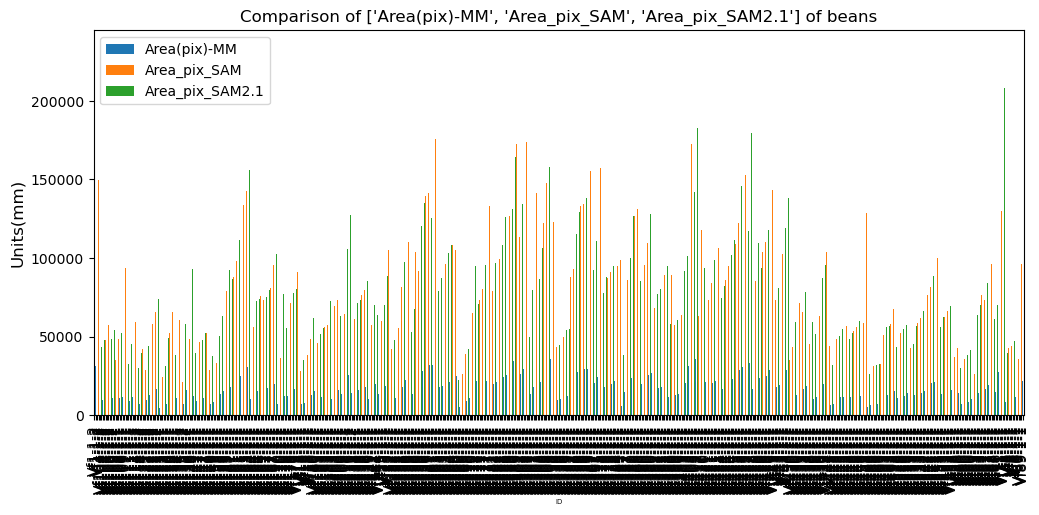

<Figure size 200x100 with 0 Axes>

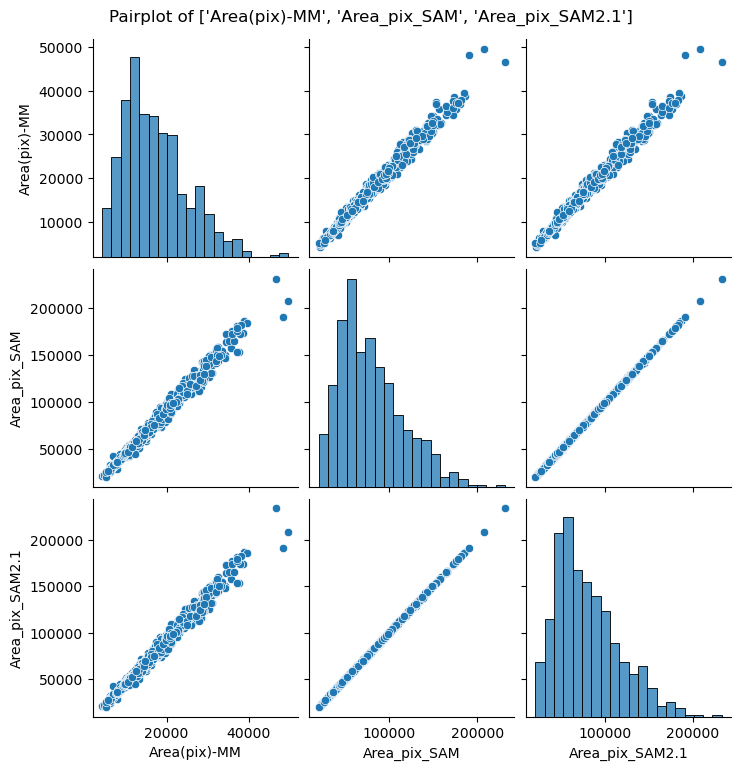

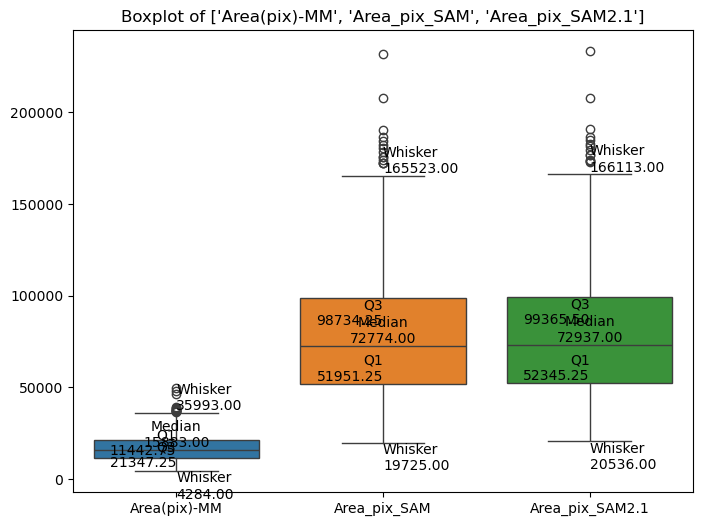

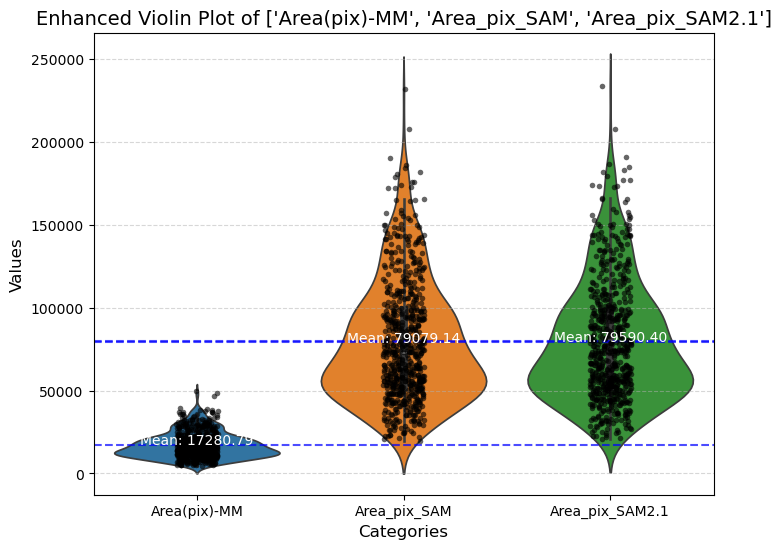

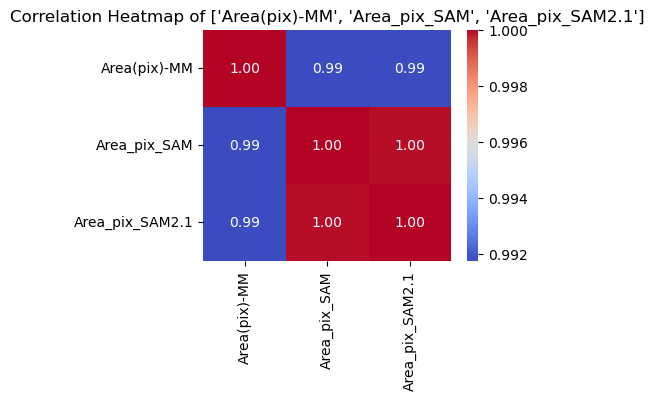

In [116]:
analyze_columns(df_100, ['Area(pix)-MM', 'Area_pix_SAM', 'Area_pix_SAM2.1'])

In [117]:
# Cohen-s d test for Area in pixels
effect_size(df_100, ["Area(pix)-MM", "Area_pix_SAM"])
effect_size(df_100, ["Area(pix)-MM", "Area_pix_SAM2.1"])
effect_size(df_100, ["Area_pix_SAM", "Area_pix_SAM2.1"])

The Cohen's d for Area(pix)-MM and Area_pix_SAM: -2.355 
Effect Size Interpretation for Area(pix)-MM and Area_pix_SAM: Large
The Cohen's d for Area(pix)-MM and Area_pix_SAM2.1: -2.374 
Effect Size Interpretation for Area(pix)-MM and Area_pix_SAM2.1: Large
The Cohen's d for Area_pix_SAM and Area_pix_SAM2.1: -0.014 
Effect Size Interpretation for Area_pix_SAM and Area_pix_SAM2.1: Small (negligible)


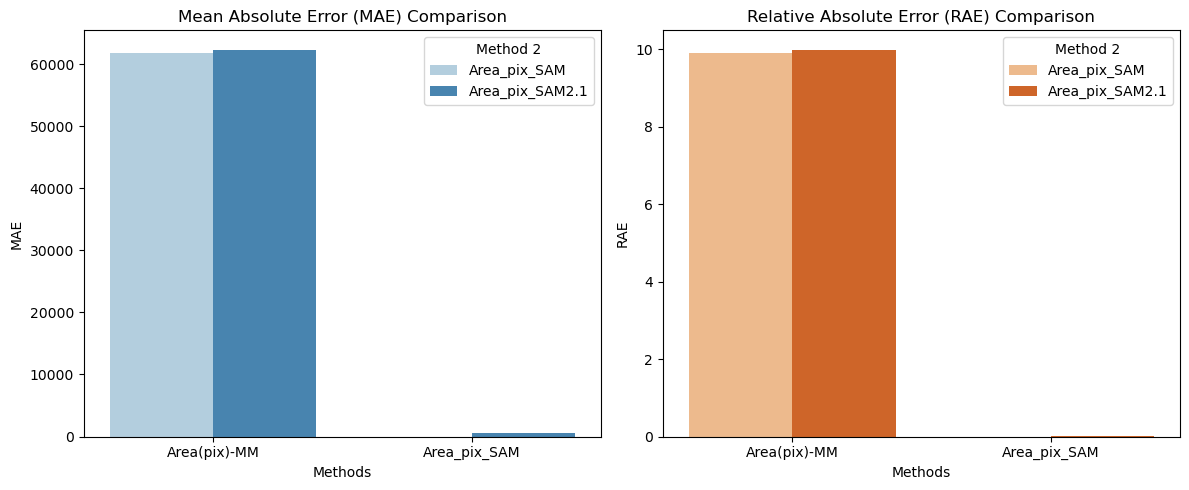

In [118]:
result_df = compare_methods(df_100, ['Area(pix)-MM', 'Area_pix_SAM', 'Area_pix_SAM2.1'])

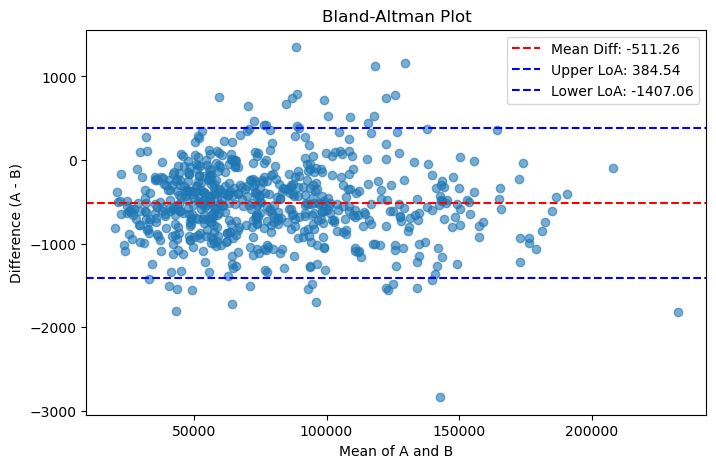

In [119]:
bland_altman_plot(df_100["Area_pix_SAM"], df_100["Area_pix_SAM2.1"])

The descriptive statistical analysis, boxplots, violin plots, and correlation values prove an extremely positive correlation between seed analyzer and SAM2.1 generated data. 

## 7. Comparison of roundness for SAM-measured data


Analyzing columns: ['Roundness', 'Roundness_SAM2.1']

Descriptive Statistics:
         Roundness  Roundness_SAM2.1
count  654.000000        654.000000
mean     0.856451          0.855737
std      0.019527          0.019381
min      0.766354          0.751997
25%      0.845742          0.846151
50%      0.859297          0.857896
75%      0.869382          0.868752
max      0.898522          0.893716

Skewness:
 Roundness          -1.203329
Roundness_SAM2.1   -1.338530
dtype: float64

Kurtosis:
 Roundness           2.833068
Roundness_SAM2.1    3.577348
dtype: float64


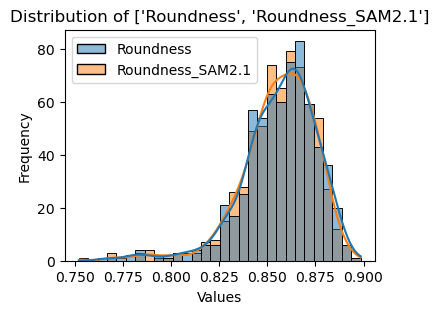


Shapiro-Wilk Test for 'Roundness': ShapiroResult(statistic=0.9331667801024276, pvalue=1.6475110259284273e-16)

Shapiro-Wilk Test for 'Roundness_SAM2.1': ShapiroResult(statistic=0.9230895000326927, pvalue=9.186956234912264e-18)

Levene's Test for equality of variances: LeveneResult(statistic=0.09428890511419732, pvalue=0.7588428618735444)

Paired t-test between 'Roundness' and 'Roundness_SAM2.1': TtestResult(statistic=2.6698535689793634, pvalue=0.007777206628050448, df=653)
Wilcoxon Signed-Rank Test between 'Roundness' and 'Roundness_SAM2.1': WilcoxonResult(statistic=93224.0, pvalue=0.0041155497935909295)
Pearson correlation between 'Roundness' and 'Roundness_SAM2.1': PearsonRResult(statistic=0.9381802184355299, pvalue=1.319235074223533e-302)
Spearman correlation between 'Roundness' and 'Roundness_SAM2.1': SignificanceResult(statistic=0.9171020486826359, pvalue=1.31743799420937e-262)

ANOVA result across ['Roundness', 'Roundness_SAM2.1']: F_onewayResult(statistic=0.4408465244874285, pv

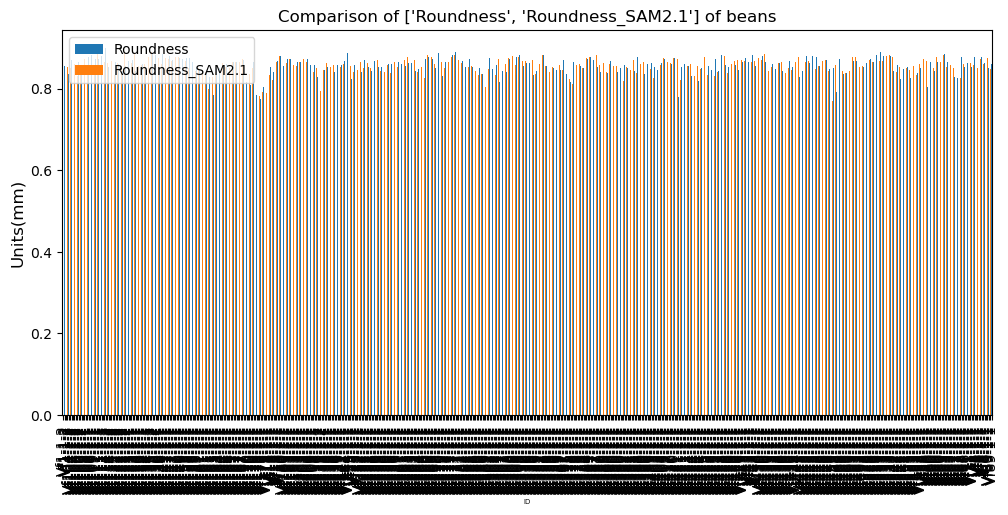

<Figure size 200x100 with 0 Axes>

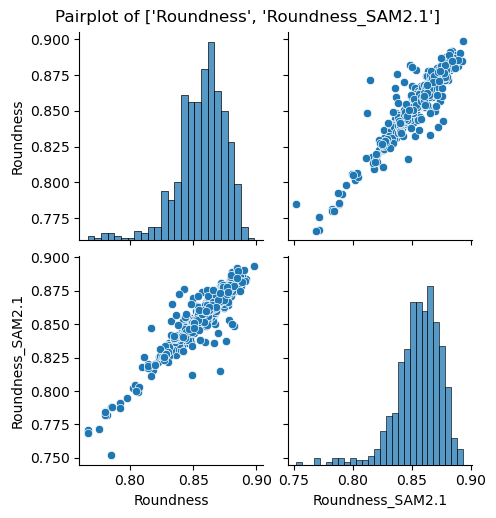

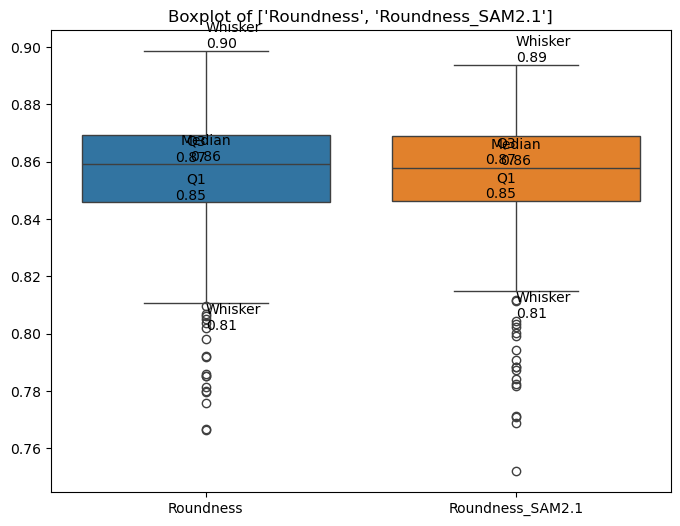

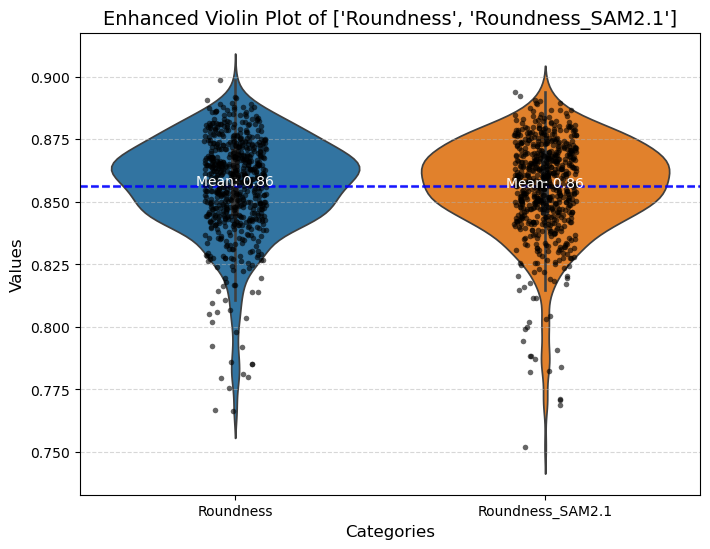

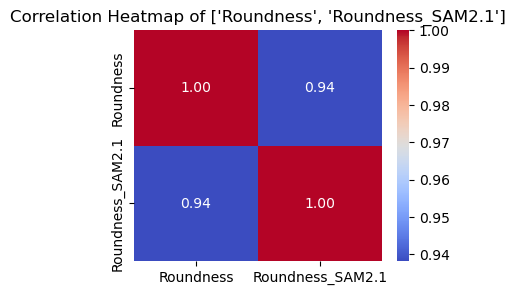

In [120]:
analyze_columns(df_100, ['Roundness','Roundness_SAM2.1'])

In [121]:
# Cohen-s d test for roundness
effect_size(df_100, ['Roundness','Roundness_SAM2.1'])

The Cohen's d for Roundness and Roundness_SAM2.1: 0.037 
Effect Size Interpretation for Roundness and Roundness_SAM2.1: Small (negligible)


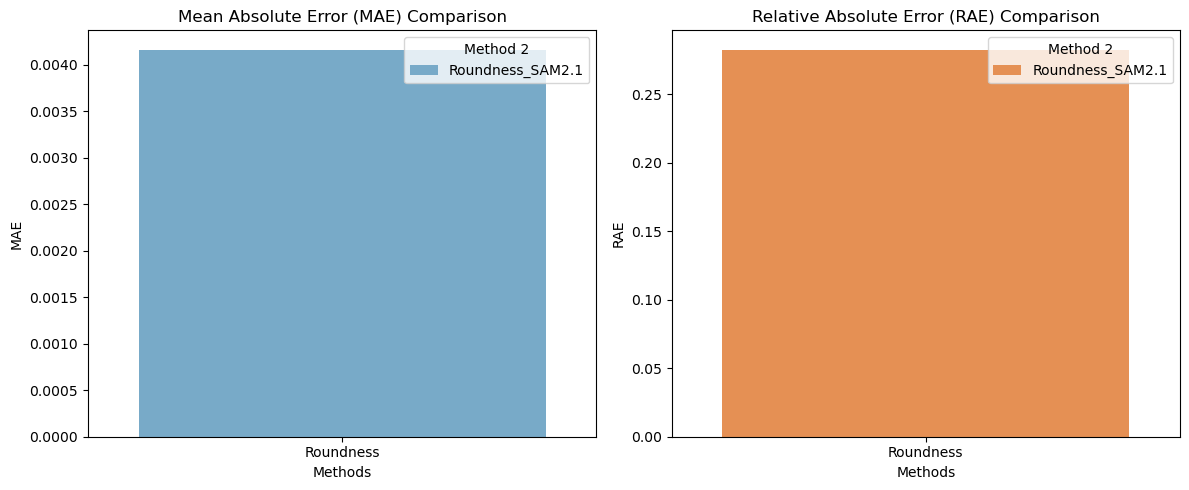

    Method 1          Method 2       MAE       RAE  SE (Method 1)  \
0  Roundness  Roundness_SAM2.1  0.004163  0.282397       0.000764   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       0.000758                 0.854952                  0.85795   

   95% CI Lower (Method 2)  95% CI Upper (Method 2)  
0                 0.854249                 0.857225  


In [122]:
result_df = compare_methods(df_100, ['Roundness','Roundness_SAM2.1'])
print (result_df.head())

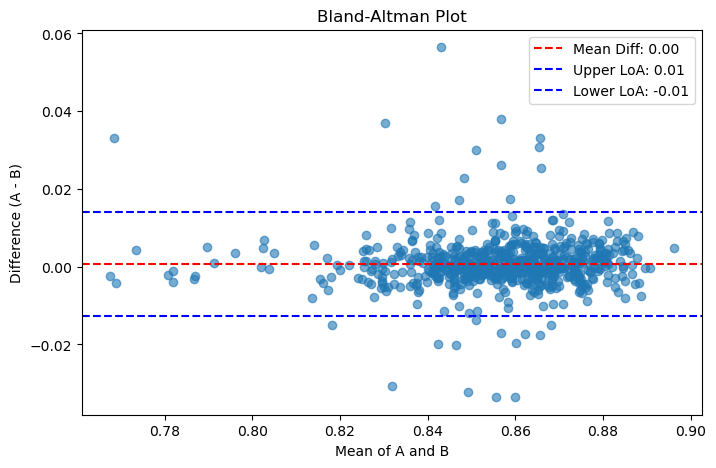

In [123]:
bland_altman_plot(df_100["Roundness"], df_100["Roundness_SAM2.1"])

## Comparison of Perimeter for SAM-measured data


Analyzing columns: ['perimeter_mm_SAM', 'perimeter_mm_SAM2.1']

Descriptive Statistics:
        perimeter_mm_SAM  perimeter_mm_SAM2.1
count        654.000000           654.000000
mean          39.192254            39.124149
std            8.911595             8.829871
min           20.114180            20.226178
25%           32.298142            32.240184
50%           38.469268            38.436951
75%           44.761411            44.604273
max           72.839218            72.814486

Skewness:
 perimeter_mm_SAM       0.381690
perimeter_mm_SAM2.1    0.391218
dtype: float64

Kurtosis:
 perimeter_mm_SAM      -0.100348
perimeter_mm_SAM2.1   -0.080699
dtype: float64


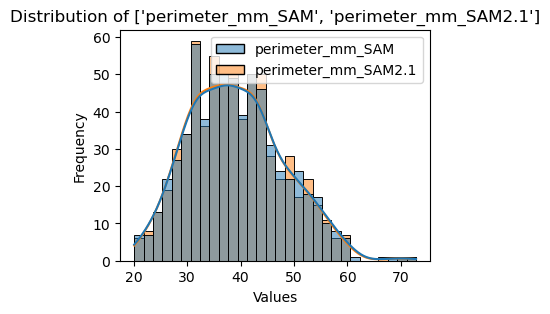


Shapiro-Wilk Test for 'perimeter_mm_SAM': ShapiroResult(statistic=0.9871540218712684, pvalue=1.6599345838835896e-05)

Shapiro-Wilk Test for 'perimeter_mm_SAM2.1': ShapiroResult(statistic=0.9865925726105758, pvalue=1.0480712353571978e-05)

Levene's Test for equality of variances: LeveneResult(statistic=0.04516501355263819, pvalue=0.8317340578409509)

Paired t-test between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': TtestResult(statistic=7.631662237929702, pvalue=8.241133233312546e-14, df=653)
Wilcoxon Signed-Rank Test between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': WilcoxonResult(statistic=67592.0, pvalue=3.0329447489013113e-16)
Pearson correlation between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': PearsonRResult(statistic=0.9997114937367577, pvalue=0.0)
Spearman correlation between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': SignificanceResult(statistic=0.9996295655589061, pvalue=0.0)

ANOVA result across ['perimeter_mm_SAM', 'perimeter_mm_SAM2.1']: F_onewayResult(statist

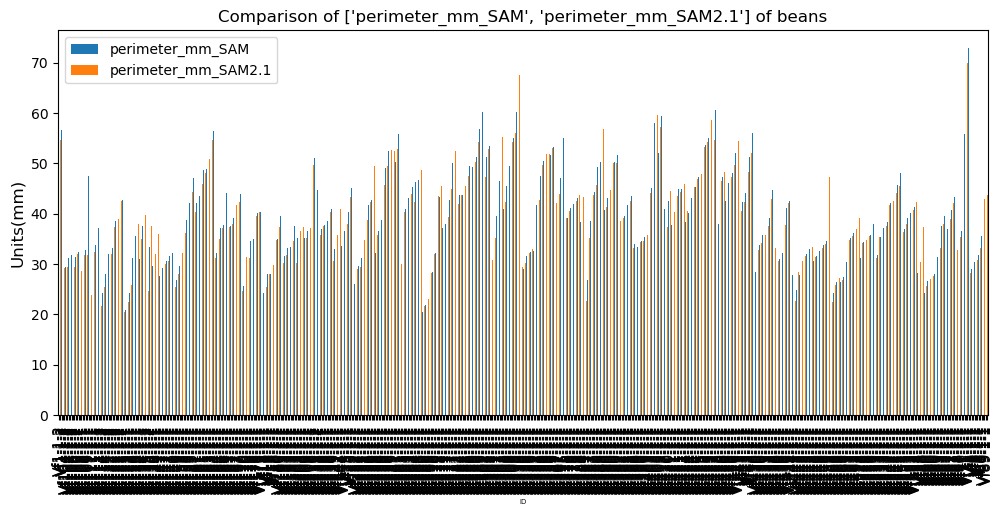

<Figure size 200x100 with 0 Axes>

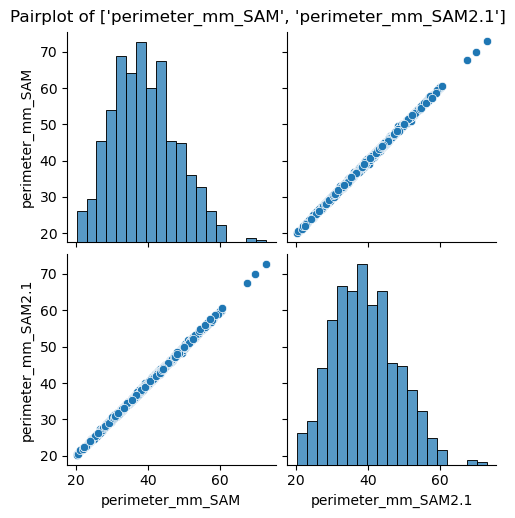

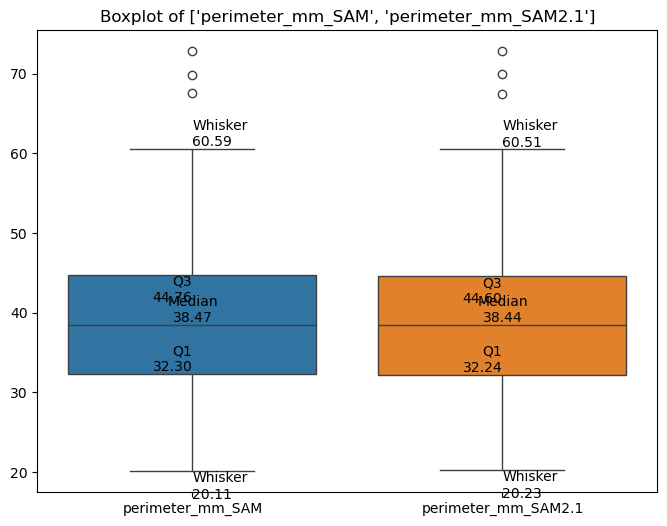

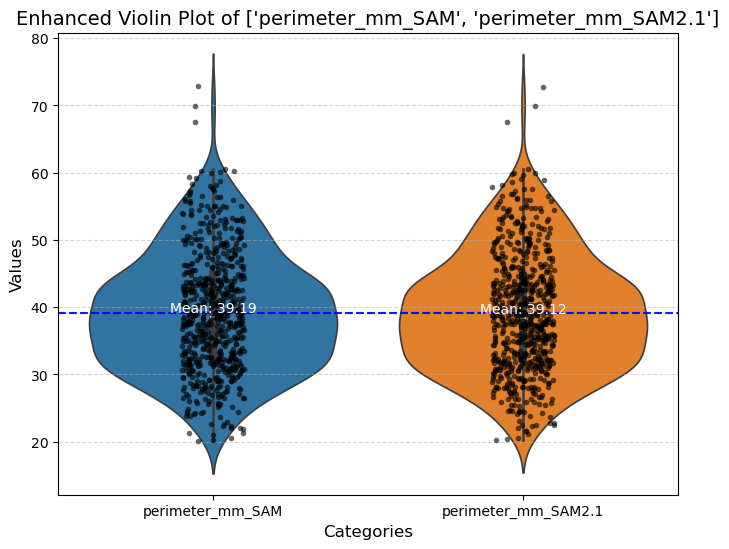

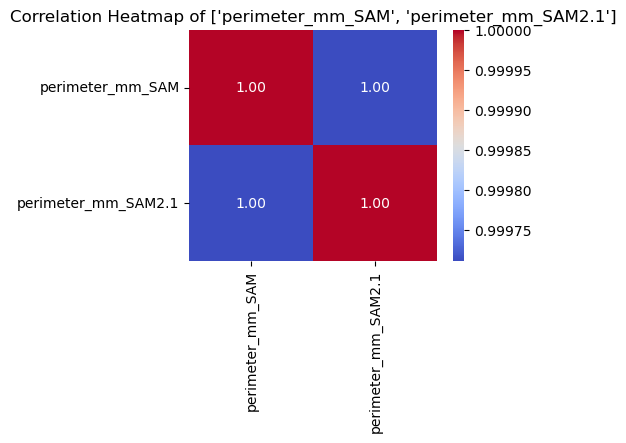

In [124]:
analyze_columns(df_100, ["perimeter_mm_SAM", "perimeter_mm_SAM2.1"])

In [125]:
# Cohen-s d test for perimeter in mm
effect_size(df_100, ["perimeter_mm_SAM", "perimeter_mm_SAM2.1"])

The Cohen's d for perimeter_mm_SAM and perimeter_mm_SAM2.1: 0.008 
Effect Size Interpretation for perimeter_mm_SAM and perimeter_mm_SAM2.1: Small (negligible)


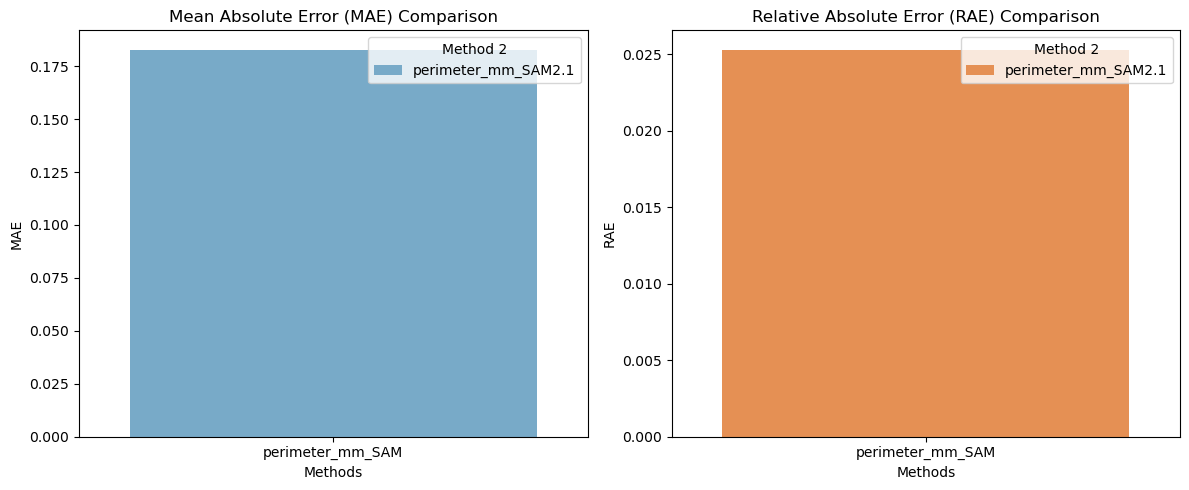

           Method 1             Method 2       MAE       RAE  SE (Method 1)  \
0  perimeter_mm_SAM  perimeter_mm_SAM2.1  0.182827  0.025314       0.348471   

   SE (Method 2)  95% CI Lower (Method 1)  95% CI Upper (Method 1)  \
0       0.345275                38.507995                39.876512   

   95% CI Lower (Method 2)  95% CI Upper (Method 2)  
0                38.446165                39.802132  


In [126]:
result_df = compare_methods(df_100, ["perimeter_mm_SAM", "perimeter_mm_SAM2.1"])
print(result_df.head(20))

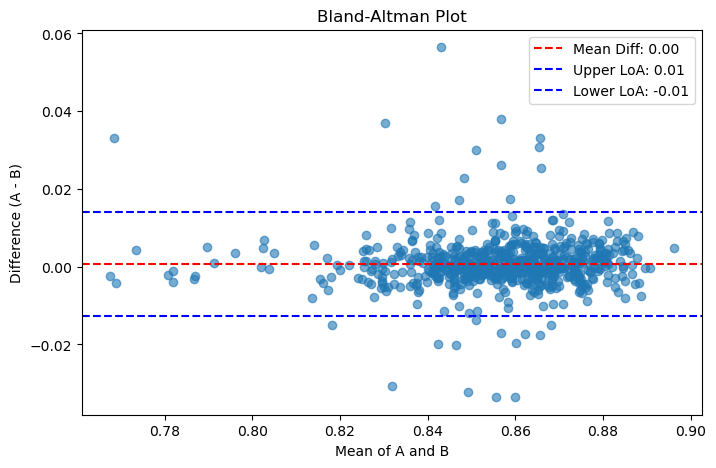

In [127]:
bland_altman_plot(df_100["Roundness"], df_100["Roundness_SAM2.1"])

## Data from 10 images where standard coin was completely visible

In [128]:
df_100.index

Index(['Vf1-1-2', 'Vf1-1-2', 'Vf1-1-2', 'Vf1-1-2', 'Vf104-1-2', 'Vf104-1-2',
       'Vf104-1-2', 'Vf104-1-2', 'Vf104-1-2', 'Vf104-1-2',
       ...
       'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1',
       'Vf89-1-1', 'Vf89-1-1', 'Vf89-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=654)

In [129]:
d=df_100.index.to_list()
d

['Vf1-1-2',
 'Vf1-1-2',
 'Vf1-1-2',
 'Vf1-1-2',
 'Vf104-1-2',
 'Vf104-1-2',
 'Vf104-1-2',
 'Vf104-1-2',
 'Vf104-1-2',
 'Vf104-1-2',
 'Vf104-1-2',
 'Vf106-1-2',
 'Vf106-1-2',
 'Vf106-1-2',
 'Vf106-1-2',
 'Vf108-1-1',
 'Vf108-1-1',
 'Vf108-1-1',
 'Vf108-1-1',
 'Vf108-1-1',
 'Vf108-1-1',
 'Vf109-1-1',
 'Vf109-1-1',
 'Vf111-1-1',
 'Vf111-1-1',
 'Vf111-1-1',
 'Vf111-1-1',
 'Vf111-1-1',
 'Vf111-1-1',
 'Vf111-1-1',
 'Vf114-1-2',
 'Vf114-1-2',
 'Vf114-1-2',
 'Vf114-1-2',
 'Vf114-1-2',
 'Vf114-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf122-1-2',
 'Vf123-1-1',
 'Vf123-1-1',
 'Vf123-1-1',
 'Vf123-1-1',
 'Vf123-1-1',
 'Vf123-1-1',
 'Vf126-1-1',
 'Vf126-1-1',
 'Vf126-1-1',
 'Vf126-1-1',
 'Vf126-1-1',
 'Vf134-1-1',
 'Vf134-1-1',
 'Vf134-1-1',
 'Vf134-1-1',
 'Vf134-1-1',
 'Vf135-1-2',
 'Vf135-1-2',
 'Vf135-1-2',
 'Vf135-1-2',
 'Vf136-1-1',
 'Vf136-1-1',
 'Vf136-1-1',
 'Vf136-1-1',
 'Vf144-1-1',
 'Vf147-1-1',


In [130]:
df_10=df_100.loc[['Vf60-1-1', 'Vf67-1-1', 'Vf109-1-1','Vf111-1-1', 'Vf122-1-2', 'Vf134-1-1','Vf144-1-1', 'Vf231-1-2','Vf528-1-1','Vf533-1-1']]
df_10


Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf60-1-1             8.03           7.06       8.756929      7.012888   
Vf60-1-1             8.20           7.43       9.023021      7.533969   
Vf60-1-1             8.52           8.08      10.105739      6.916314   
Vf60-1-1             8.90           7.23       9.575211      7.496564   
Vf60-1-1             9.37           7.18       9.648079      8.082164   
...                   ...            ...            ...           ...   
Vf533-1-1           12.03           9.79      11.400099     10.202101   
Vf533-1-1           12.35          10.12      12.223271     10.475085   
Vf533-1-1           12.44          11.03      12.323425     10.255989   
Vf533-1-1           12.58           9.96      12.798785     10.382087   
Vf533-1-1           12.79          10.23      12.407518     11.105192   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf60-1-1      45.867350        6550.0        1.172897      1.248691   
Vf60-1-1      48.650979        6941.0        1.154696      1.197645   
Vf60-1-1      53.110503        7580.0        1.275421      1.461145   
Vf60-1-1      54.800692        7817.0        1.193185      1.277280   
Vf60-1-1      56.351520        8031.0        1.147667      1.193749   
...                 ...           ...             ...           ...   
Vf533-1-1     90.205312       12803.0        1.127876      1.117427   
Vf533-1-1     97.101852       13777.0        1.147422      1.166890   
Vf533-1-1     97.698599       13867.0        1.167002      1.201583   
Vf533-1-1    100.350015       14239.0        1.150568      1.232776   
Vf533-1-1    103.773271       14716.0        1.142147      1.117272   

           Area_mm2_SAM  Length_mm_SAM  ...  Length_mm_SAM2.1  \
ID                                      ...                     
Vf60-1-1      43.956935       8.394982  ...          8.369326   
Vf60-1-1      48.683633       8.519209  ...          8.600136   
Vf60-1-1      52.738096       9.228176  ...          8.851102   
Vf60-1-1      53.351679       8.905773  ...          9.245988   
Vf60-1-1      54.457032       9.621724  ...          9.596553   
...                 ...            ...  ...               ...   
Vf533-1-1    103.371461      12.246723  ...         12.271351   
Vf533-1-1    105.341063      12.815334  ...         12.873167   
Vf533-1-1    109.491861      12.421119  ...         12.359995   
Vf533-1-1    111.748880      12.640518  ...         12.634290   
Vf533-1-1    115.220810      12.715170  ...         12.659368   

           Width_mm_SAM2.1  perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
ID                                                                 
Vf60-1-1          6.883390            24.293481          29842.0   
Vf60-1-1          7.527393            25.553227          33798.0   
Vf60-1-1          7.670790            26.387332          35310.0   
Vf60-1-1          7.475111            26.660959          35705.0   
Vf60-1-1          7.363211            27.101354          36449.0   
...                    ...                  ...              ...   
Vf533-1-1        10.782141            36.382740          59536.0   
Vf533-1-1        10.522154            37.227756          60759.0   
Vf533-1-1        11.237858            37.219824          62518.0   
Vf533-1-1        11.283670            37.641510          64232.0   
Vf533-1-1        11.625822            38.399673          66240.0   

           perimeter_SAM2.1  Roundness_SAM2.1  Circularity_SAM2.1  \
ID                                                                  
Vf60-1-1         661.955411          0.855382            1.169068   
Vf60-1-1         696.281313          0.875611            1.142060   
Vf60-1-1         719.009235          0.857864            1.165686   
Vf60-1-1         726.465079          0.849746            1.17

In [131]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, Vf60-1-1 to Vf533-1-1
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length(mm)_DCM                 64 non-null     float64
 1   Width(mm)_DCM                  64 non-null     float64
 2   Length(mm)-MM                  64 non-null     float64
 3   Width(mm)-MM                   64 non-null     float64
 4   Area(mm²)-MM                   64 non-null     float64
 5   Area(pix)-MM                   64 non-null     float64
 6   Circularity-MM                 64 non-null     float64
 7   L/W Ratio-MM                   64 non-null     float64
 8   Area_mm2_SAM                   64 non-null     float64
 9   Length_mm_SAM                  64 non-null     float64
 10  Width_mm_SAM                   64 non-null     float64
 11  perimeter_mm_SAM               64 non-null     float64
 12  Area_pix_SAM                   64 non-null 


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM  Length_mm_SAM2.1
count       64.000000      64.000000      64.000000         64.000000
mean        12.020312      12.148177      12.327608         12.331900
std          2.116781       2.023407       2.173620          2.164334
min          7.550000       7.573586       8.113179          8.093063
25%         10.607500      10.795610      11.013140         11.042268
50%         12.030000      11.830300      12.402852         12.376632
75%         13.220000      13.290968      13.455878         13.450267
max         16.780000      16.608221      17.667348         17.645635

Skewness:
 Length(mm)_DCM      0.068955
Length(mm)-MM       0.268519
Length_mm_SAM       0.218446
Length_mm_SAM2.1    0.192610
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.249720
Length(mm)-MM      -0.150174
Length_mm_SAM      -0.060616
Length_mm

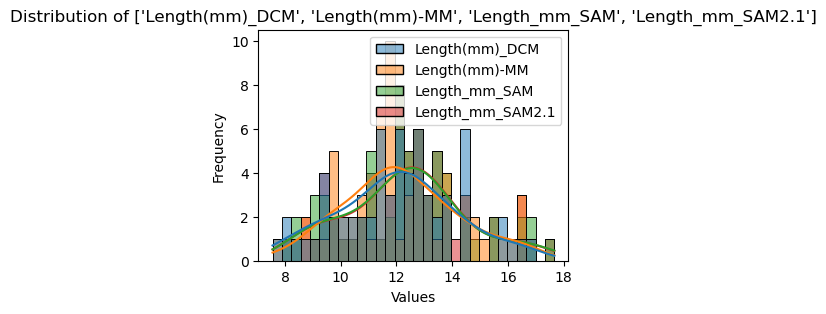


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=0.987232136803362, pvalue=0.7511310350749298)

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=0.9812998447920906, pvalue=0.44135272025778893)

Shapiro-Wilk Test for 'Length_mm_SAM': ShapiroResult(statistic=0.9760810735498415, pvalue=0.24823285948114604)

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=0.9763437930000353, pvalue=0.2558585486163163)

Levene's Test for equality of variances: LeveneResult(statistic=0.05980257508965025, pvalue=0.9807980395706042)

Paired t-test between 'Length(mm)_DCM' and 'Length(mm)-MM': TtestResult(statistic=-2.619098104556423, pvalue=0.011031301677969226, df=63)
Wilcoxon Signed-Rank Test between 'Length(mm)_DCM' and 'Length(mm)-MM': WilcoxonResult(statistic=742.0, pvalue=0.04627498301513958)
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=0.9832108942785611, pvalue=1.6047351397543545e-47)
Spearman correlation betw

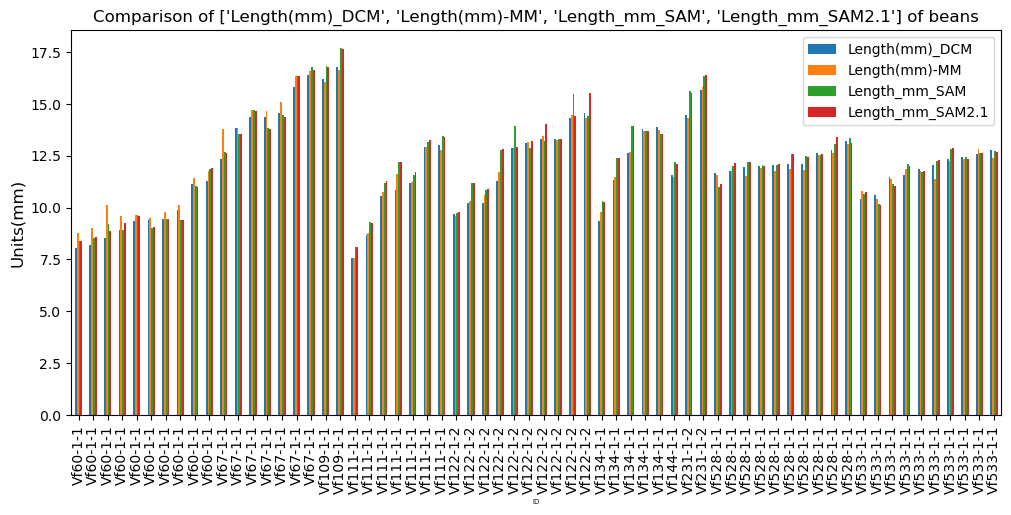

<Figure size 200x100 with 0 Axes>

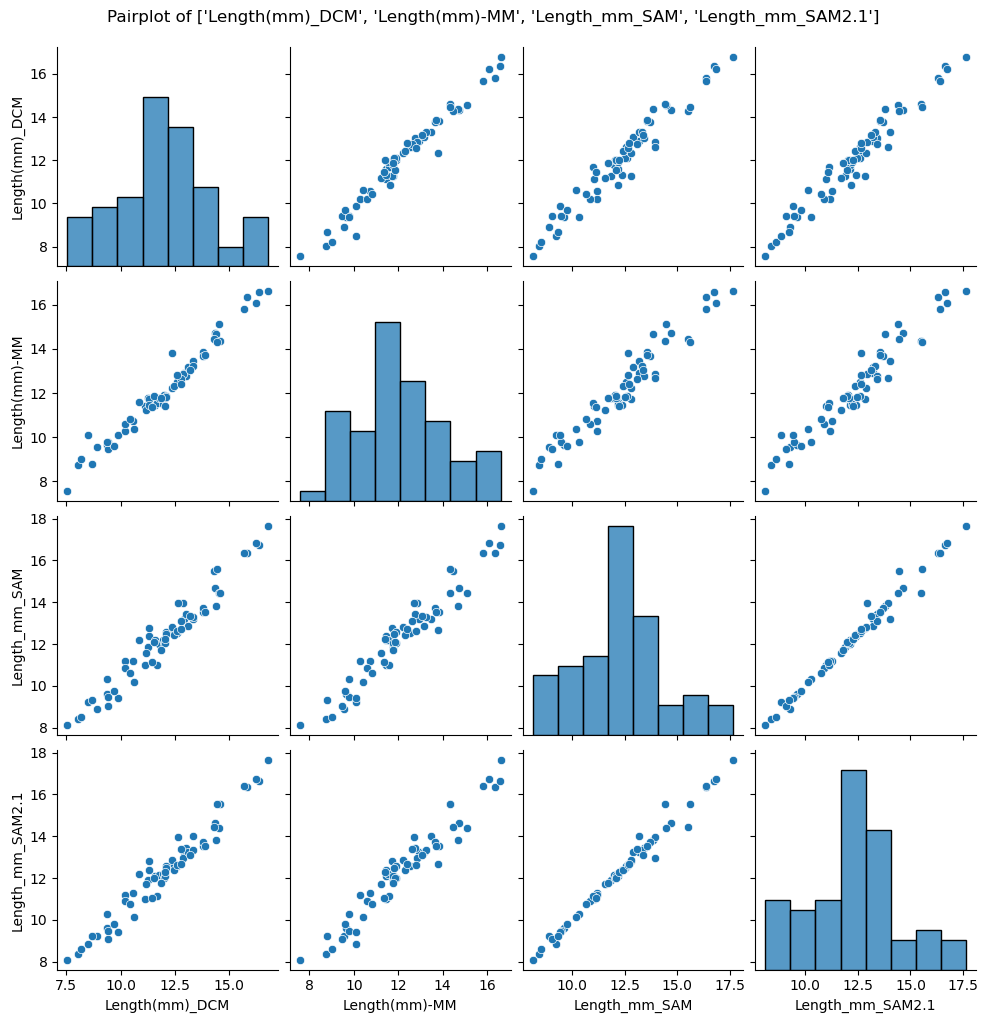

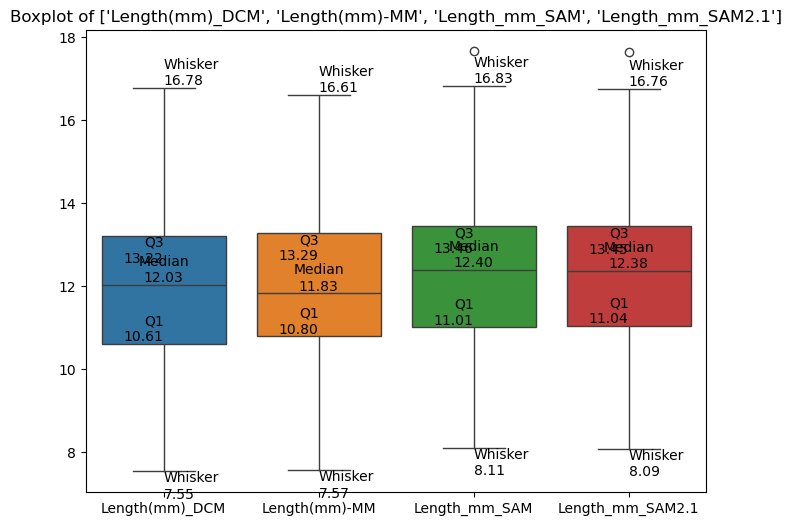

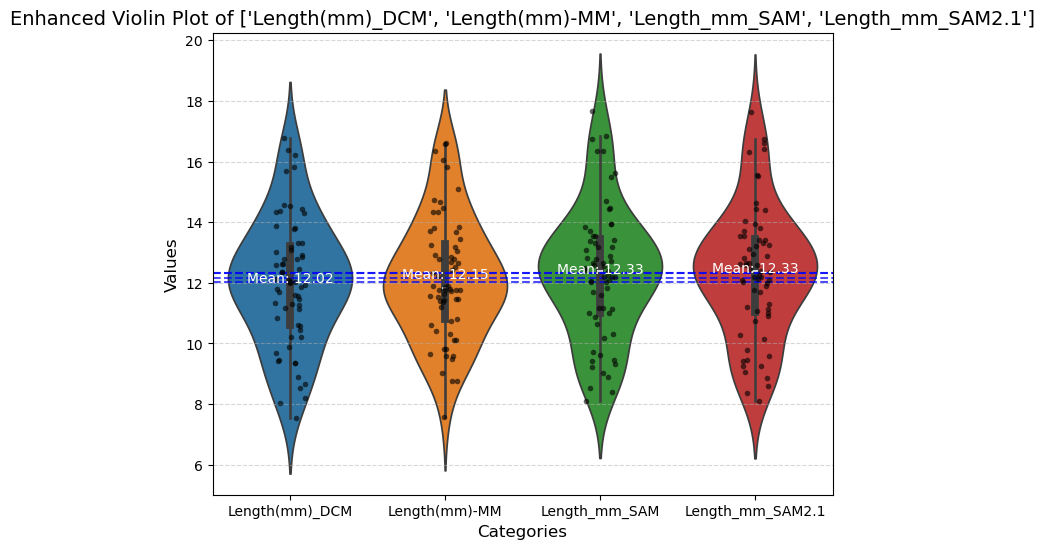

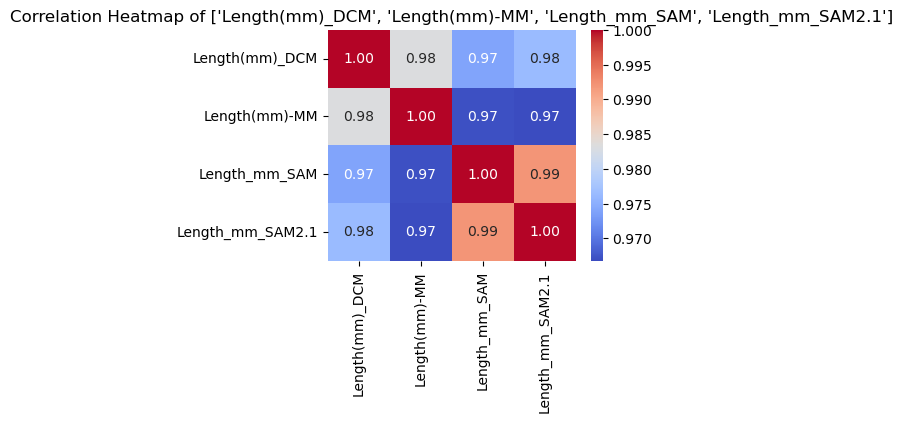

In [132]:
# Perform analysis on both sets of columns
analyze_columns(df_10, ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1'])

In [133]:
#Effect size for length

effect_size(df_10, ["Length(mm)_DCM", "Length_mm_SAM2.1"])

effect_size(df_10, ["Length(mm)-MM", "Length_mm_SAM2.1"])

The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: -0.146 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small (negligible)
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: -0.088 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small (negligible)


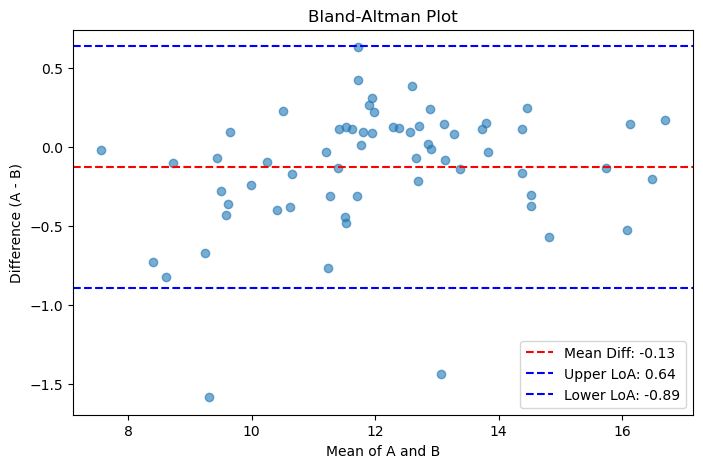

In [134]:
bland_altman_plot(df_10["Length(mm)_DCM"], df_10["Length(mm)-MM"])


Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM  Width_mm_SAM2.1
count      64.000000     64.000000     64.000000        64.000000
mean        9.392656      9.414906      9.930079         9.950496
std         1.423121      1.360052      1.514577         1.494160
min         5.600000      6.000552      6.772472         6.883390
25%         8.395000      8.352825      9.086991         9.148780
50%         9.475000      9.393054     10.089651        10.101423
75%        10.315000     10.273107     10.971932        10.950724
max        12.520000     12.191023     13.255554        13.276074

Skewness:
 Width(mm)_DCM     -0.041047
Width(mm)-MM      -0.084027
Width_mm_SAM      -0.177975
Width_mm_SAM2.1   -0.170925
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.003283
Width(mm)-MM      -0.251447
Width_mm_SAM      -0.365505
Width_mm_SAM2.1   -0.382257
dtype: float64


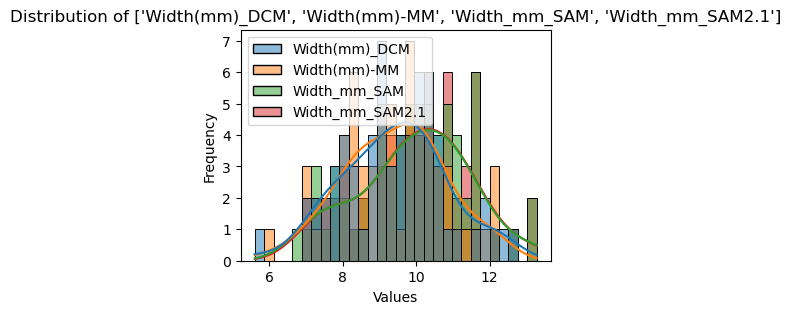


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=0.9888744997149485, pvalue=0.835455193387342)

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=0.9882563273668806, pvalue=0.8048182317708263)

Shapiro-Wilk Test for 'Width_mm_SAM': ShapiroResult(statistic=0.9802601748234487, pvalue=0.395658920842498)

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=0.9804193643641645, pvalue=0.4024225123263644)

Levene's Test for equality of variances: LeveneResult(statistic=0.2137857035116559, pvalue=0.8867974942086131)

Paired t-test between 'Width(mm)_DCM' and 'Width(mm)-MM': TtestResult(statistic=-0.2575413777355553, pvalue=0.7976002440785317, df=63)
Wilcoxon Signed-Rank Test between 'Width(mm)_DCM' and 'Width(mm)-MM': WilcoxonResult(statistic=886.0, pvalue=0.30306834782413883)
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=0.8776265034100849, pvalue=1.8149938778686963e-21)
Spearman correlation between 'Width(mm)_

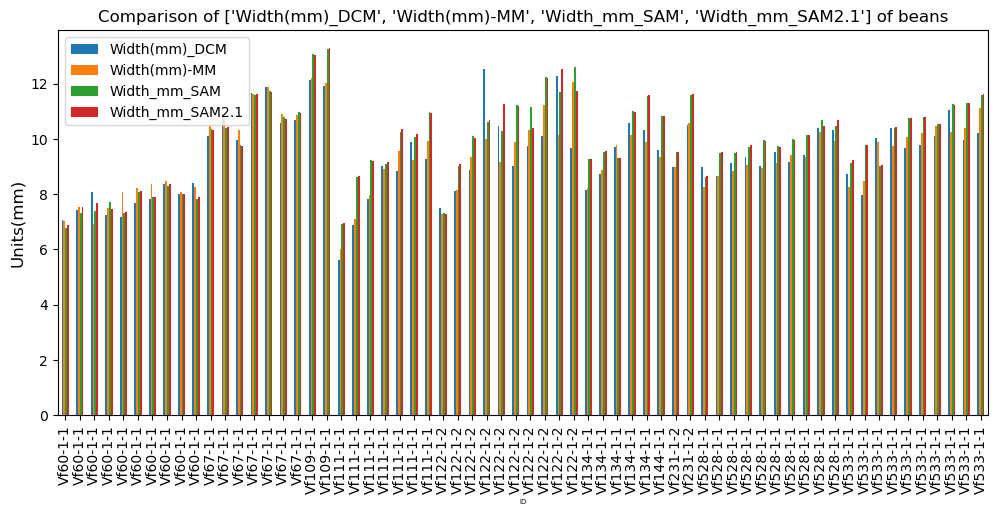

<Figure size 200x100 with 0 Axes>

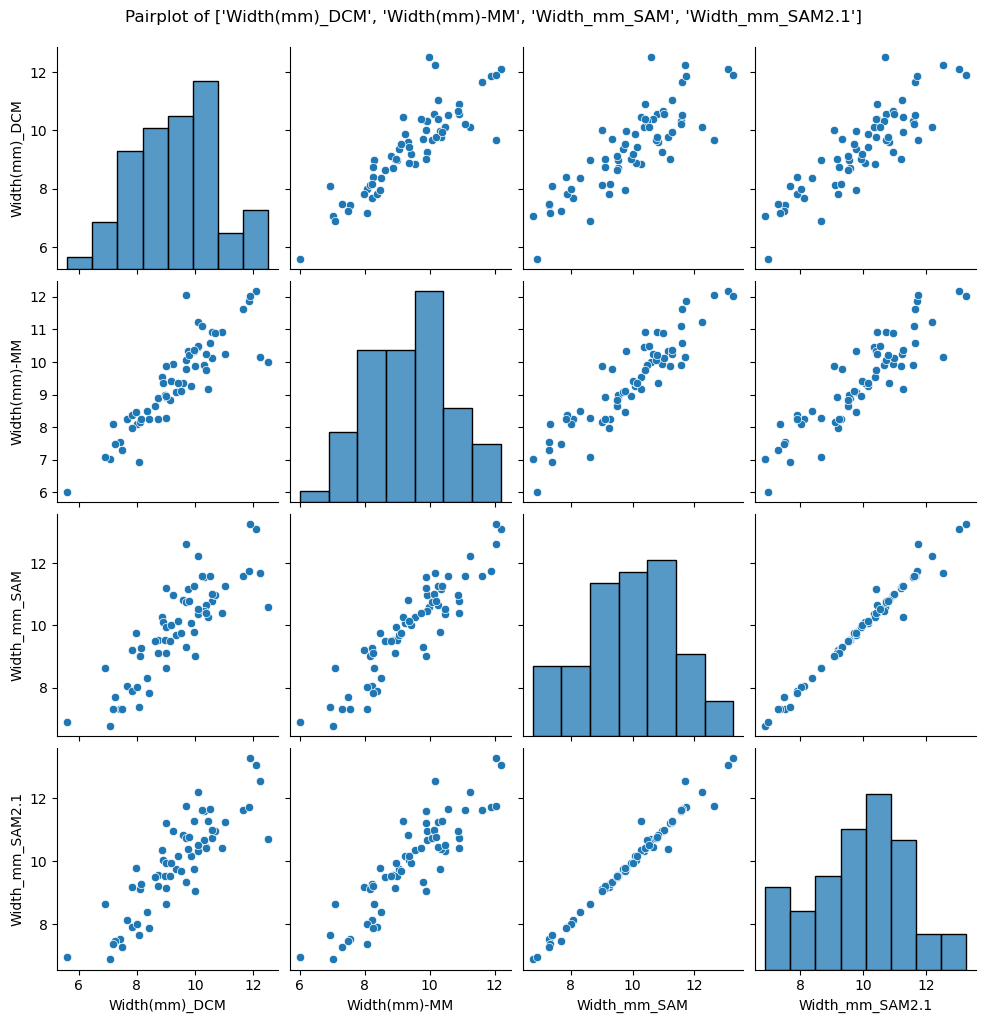

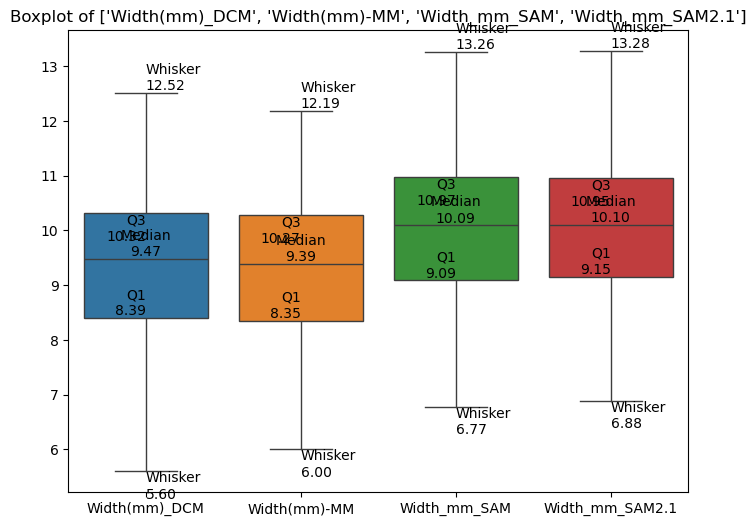

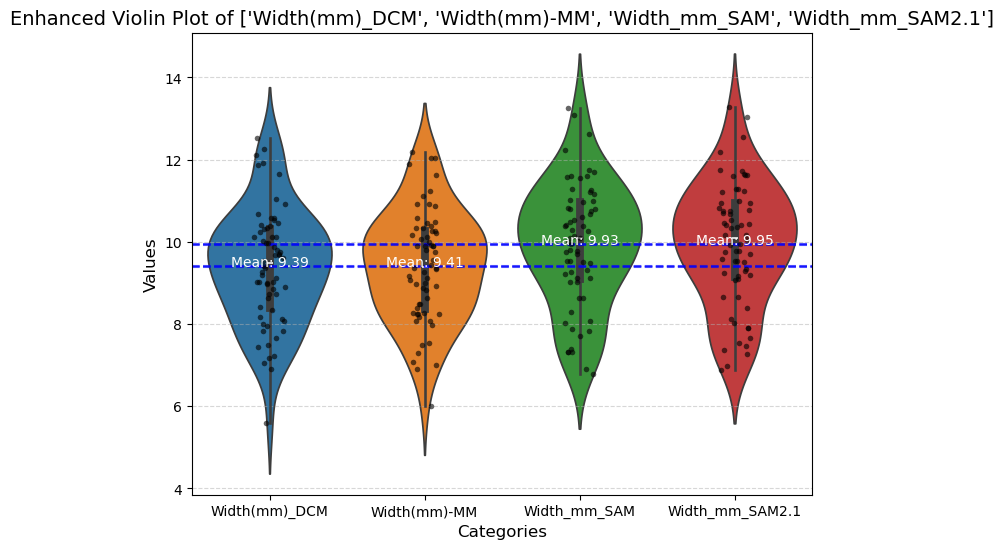

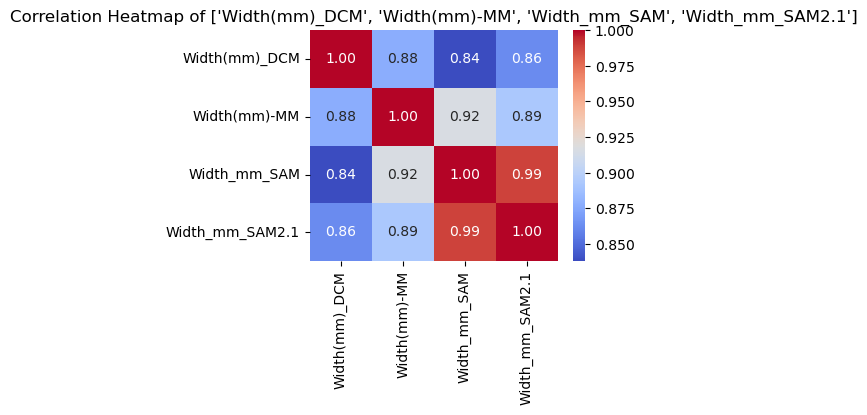

In [135]:
# Perform analysis on both sets of columns
analyze_columns(df_10, ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1'])

In [136]:
#Effect size for Width

effect_size(df_10, ["Width(mm)_DCM", "Width_mm_SAM2.1"])

effect_size(df_10, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.382 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.375 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


## Average data for each image from all 100 images

In [137]:
df_100images.head(2)

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2         19.322500      13.890000      19.600875     14.314509   
Vf104-1-2       11.071429       7.694286      11.408118      8.230620   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      219.500247  31003.750000        1.168153      1.368314   
Vf104-1-2     71.513188  10175.142857        1.185993      1.391063   

           Area_mm2_SAM  Length_mm_SAM  ...  Length_mm_SAM2.1  \
ID                                      ...                     
Vf1-1-2      225.156088      19.859815  ...         19.723124   
Vf104-1-2     71.696552      11.007852  ...         11.021296   

           Width_mm_SAM2.1  perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
ID                                                                 
Vf1-1-2          14.492135            54.364649    137819.750000   
Vf104-1-2         8.362507            30.853353     47827.714286   

           perimeter_SAM2.1  Roundness_SAM2.1  Circularity_SAM2.1  \
ID                                                                  
Vf1-1-2         1423.790547          0.852206            1.173540   
Vf104-1-2        841.313811          0.846841            1.181163   

           Axis Major Length(pix)_SAM2.1  Axis Minor Length(pix)_SAM2.1  \
ID                                                                        
Vf1-1-2                       497.471554                     352.863993   
Vf104-1-2                     292.011866                     209.077571   

           Aspect_Ratio_SAM2.1  
ID                              
Vf1-1-2               1.409362  
Vf104-1-2             1.398353  

[2 rows x 30 columns]


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM  Length_mm_SAM2.1
count      100.000000     100.000000     100.000000        100.000000
mean        14.293164      14.347126      13.686620         13.666884
std          3.267513       3.172022       2.930411          2.908723
min          8.260000       8.287498       7.955343          7.993105
25%         11.915417      11.868962      11.363178         11.368227
50%         14.143833      14.231569      13.560353         13.517142
75%         16.603750      16.533041      15.561051         15.552776
max         21.040000      20.639073      21.463560         21.520032

Skewness:
 Length(mm)_DCM      0.256518
Length(mm)-MM       0.274246
Length_mm_SAM       0.368668
Length_mm_SAM2.1    0.379662
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.792904
Length(mm)-MM      -0.815330
Length_mm_SAM      -0.392162
Length_mm

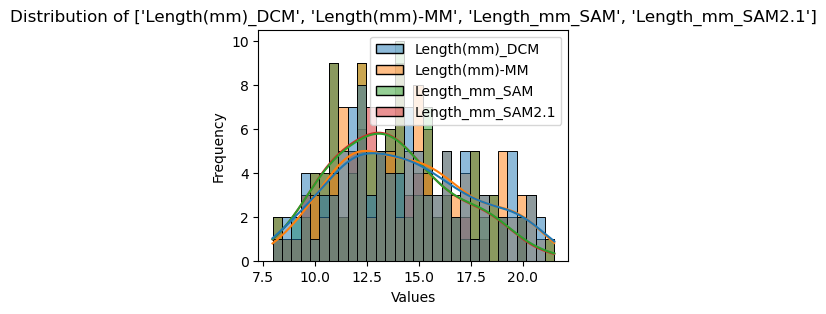


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=0.971195907388821, pvalue=0.027311861796111815)

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=0.9688830776631452, pvalue=0.01816602179576798)

Shapiro-Wilk Test for 'Length_mm_SAM': ShapiroResult(statistic=0.9809593741772438, pvalue=0.15779093298864022)

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=0.9808503410753803, pvalue=0.15475628730457064)

Levene's Test for equality of variances: LeveneResult(statistic=1.1929639933404173, pvalue=0.31213699295199104)

Paired t-test between 'Length(mm)_DCM' and 'Length(mm)-MM': TtestResult(statistic=-2.259752148873551, pvalue=0.02602789790718695, df=99)
Wilcoxon Signed-Rank Test between 'Length(mm)_DCM' and 'Length(mm)-MM': WilcoxonResult(statistic=2163.0, pvalue=0.2132517564117422)
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=0.997688960062287, pvalue=2.8749780545701084e-116)
Spearman correlation be

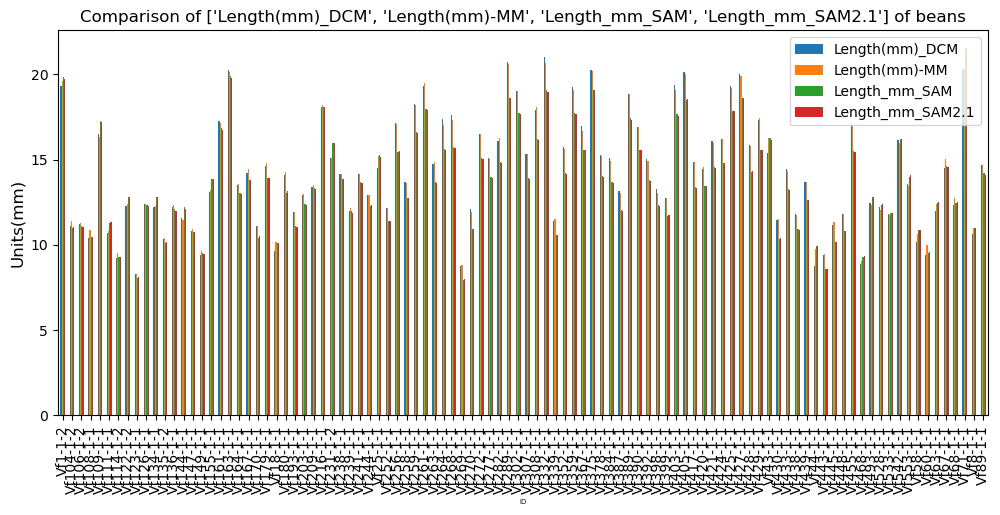

<Figure size 200x100 with 0 Axes>

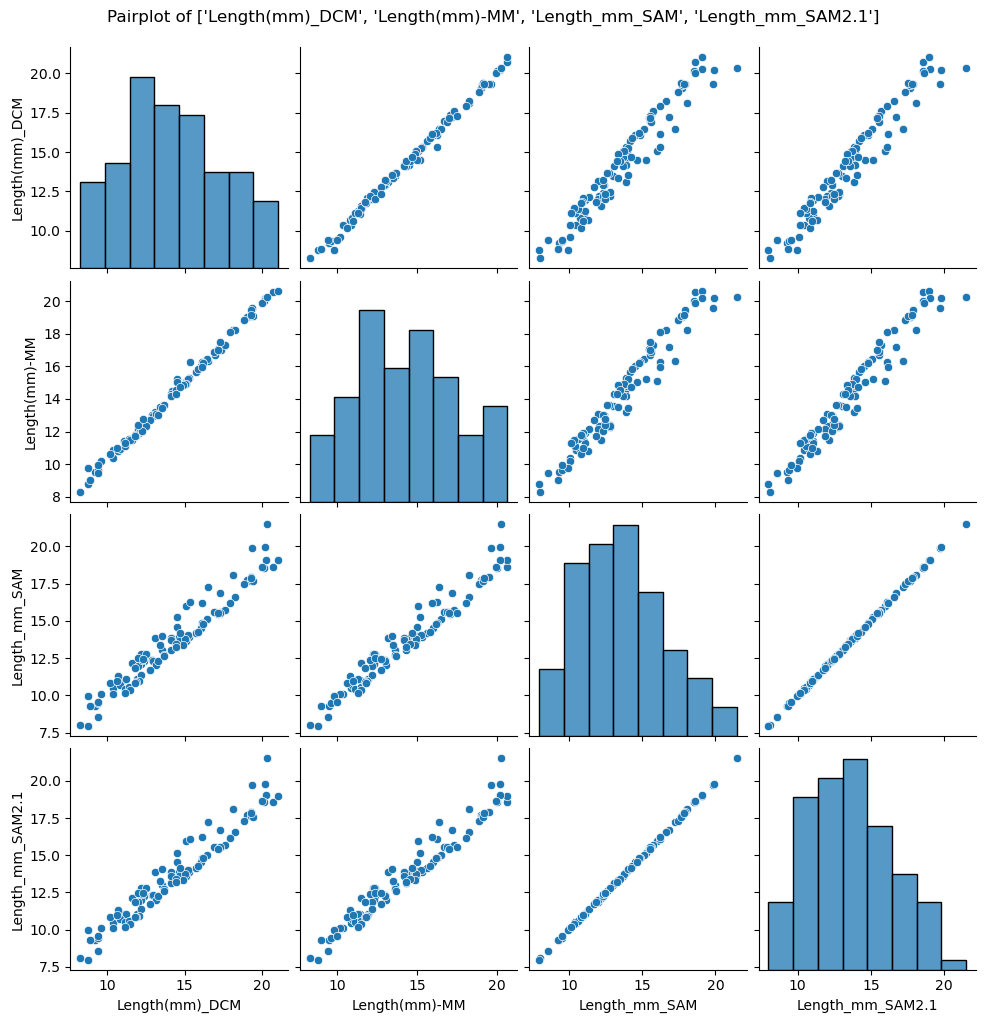

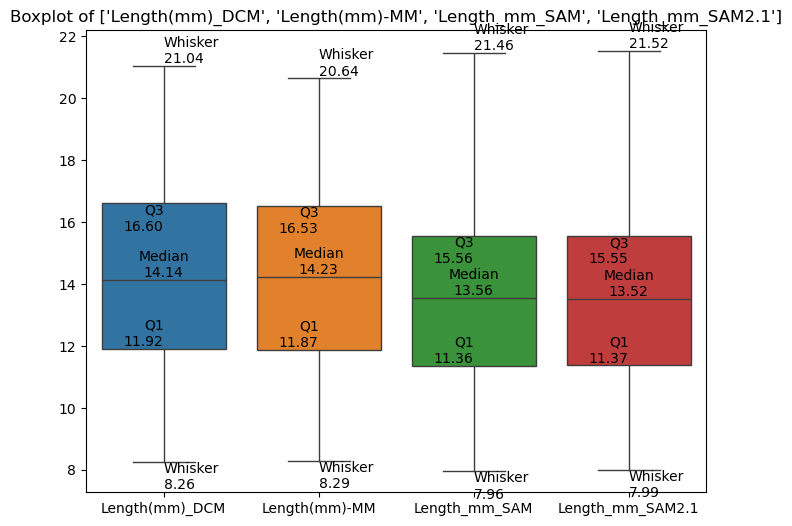

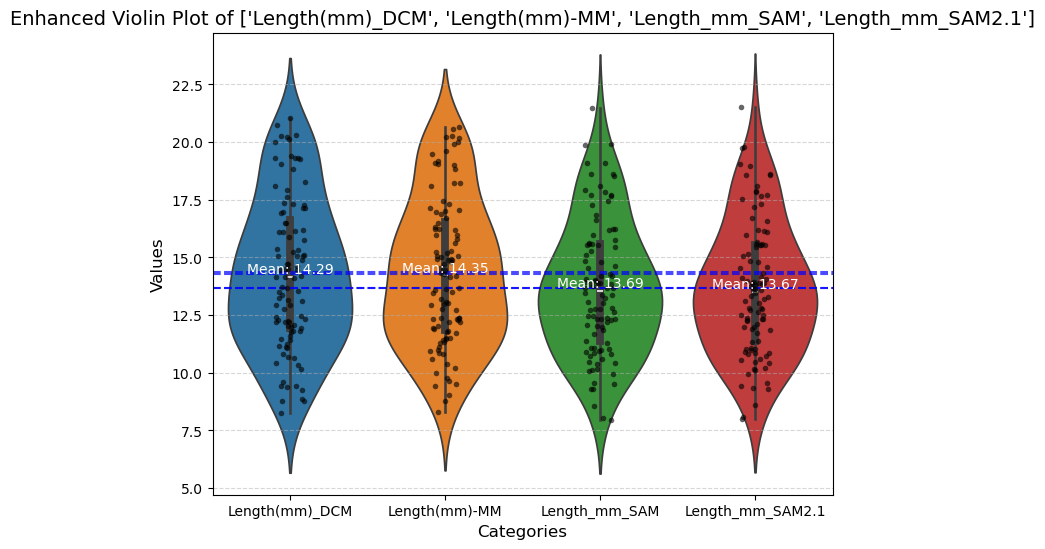

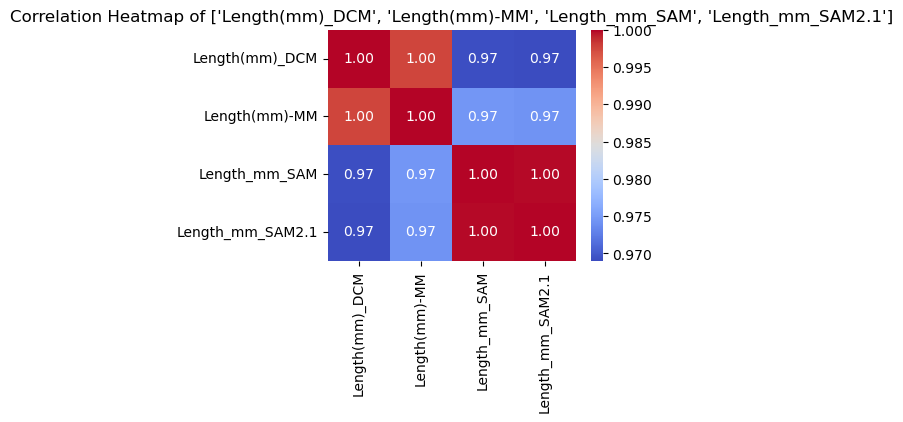

In [138]:
# Perform analysis on both sets of columns
analyze_columns(df_100images, ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM', 'Length_mm_SAM2.1'])

In [139]:
#Effect size for length

effect_size(df_100images, ["Length(mm)_DCM", "Length_mm_SAM2.1"])

effect_size(df_100images, ["Length(mm)-MM", "Length_mm_SAM2.1"])

The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: 0.202 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small to Medium
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: 0.224 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small to Medium



Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM  Width_mm_SAM2.1
count     100.000000    100.000000    100.000000       100.000000
mean       10.638242     10.738722     11.294112        11.332852
std         2.291133      2.296849      2.587852         2.585695
min         6.045000      6.160683      6.261287         6.337874
25%         9.123167      9.228420      9.523098         9.577837
50%        10.127714     10.237519     10.727356        10.780111
75%        12.180875     12.282686     13.060167        13.117021
max        16.455000     16.157181     17.771141        17.781404

Skewness:
 Width(mm)_DCM      0.417578
Width(mm)-MM       0.448227
Width_mm_SAM       0.455807
Width_mm_SAM2.1    0.469416
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.425001
Width(mm)-MM      -0.443840
Width_mm_SAM      -0.378561
Width_mm_SAM2.1   -0.378595
dtype: float64


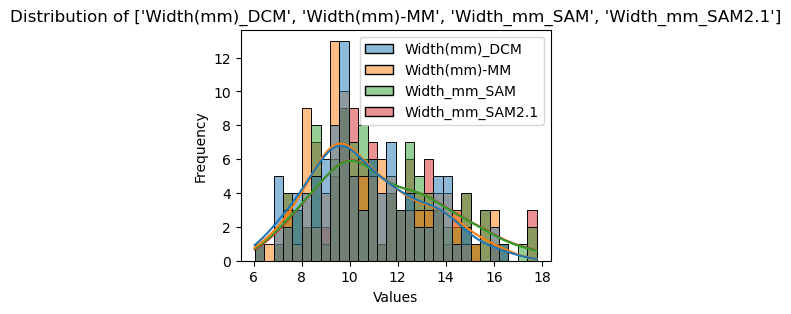


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=0.9742908177582436, pvalue=0.04748971670678514)

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=0.969667546310664, pvalue=0.020847642539573854)

Shapiro-Wilk Test for 'Width_mm_SAM': ShapiroResult(statistic=0.9726537492367836, pvalue=0.03540926814202128)

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=0.971107696938333, pvalue=0.026887756033015603)

Levene's Test for equality of variances: LeveneResult(statistic=0.7650148273798157, pvalue=0.5141887774561344)

Paired t-test between 'Width(mm)_DCM' and 'Width(mm)-MM': TtestResult(statistic=-4.84402028514159, pvalue=4.706257161071957e-06, df=99)
Wilcoxon Signed-Rank Test between 'Width(mm)_DCM' and 'Width(mm)-MM': WilcoxonResult(statistic=1263.0, pvalue=1.4302449034926375e-05)
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=0.9959148281323086, pvalue=3.657849022729555e-104)
Spearman correlation between 

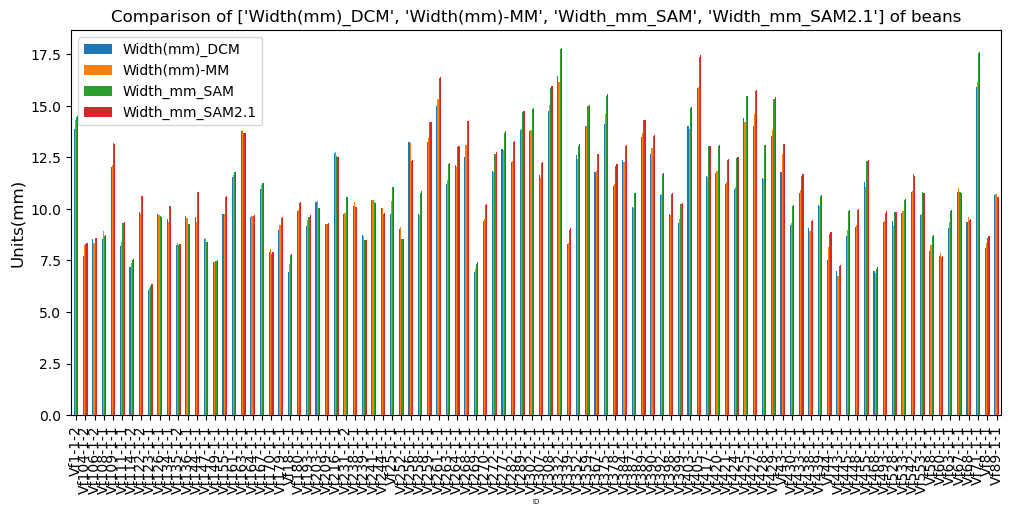

<Figure size 200x100 with 0 Axes>

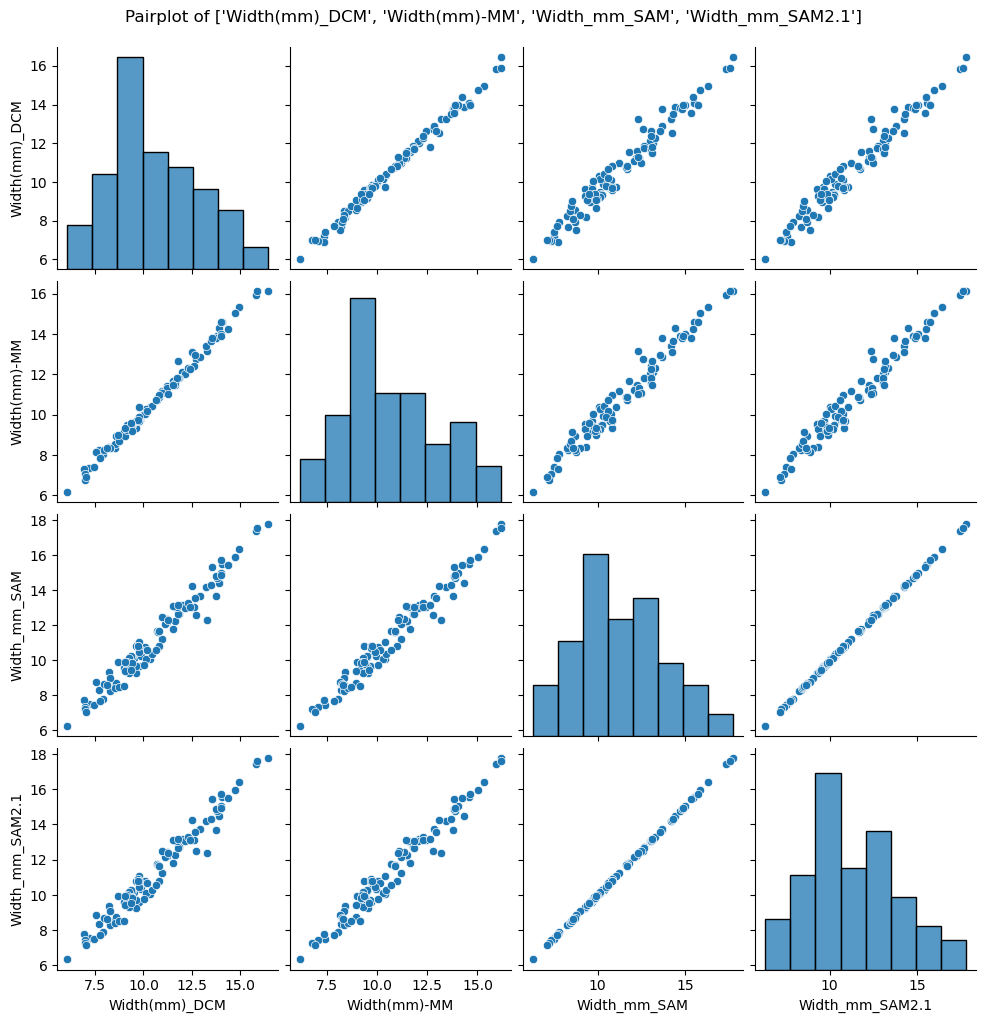

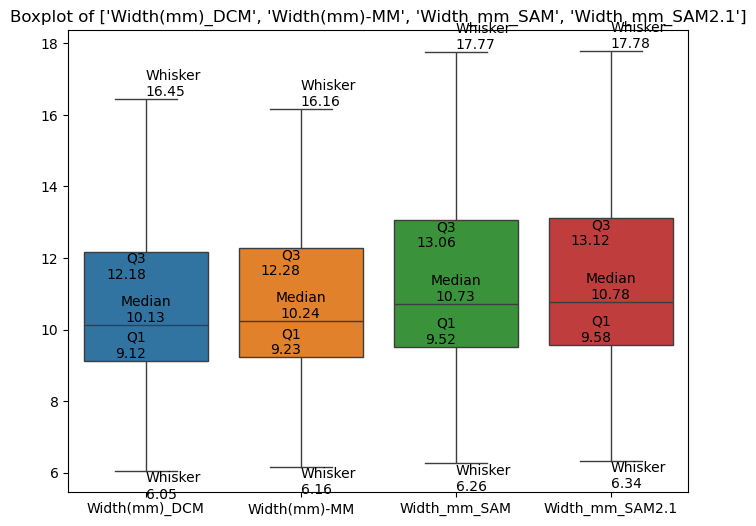

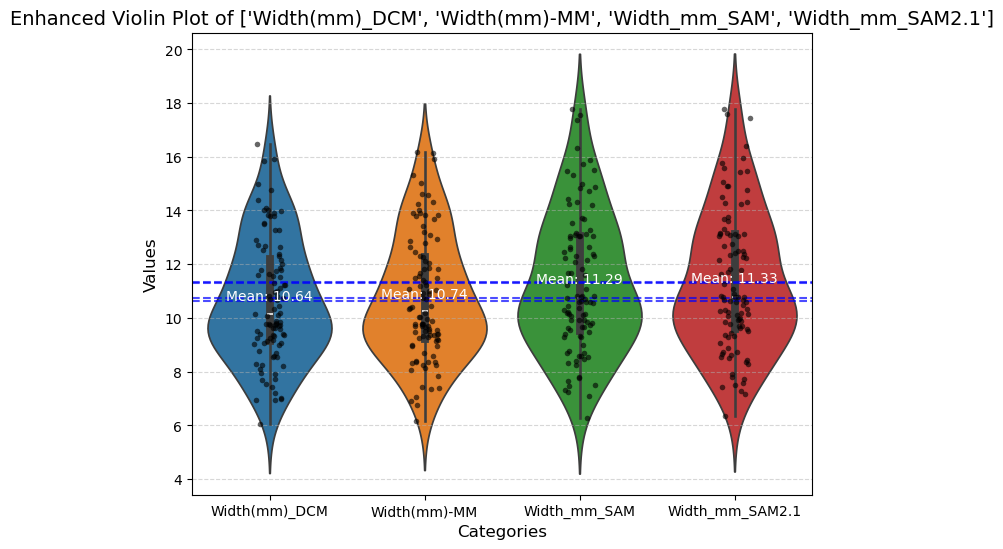

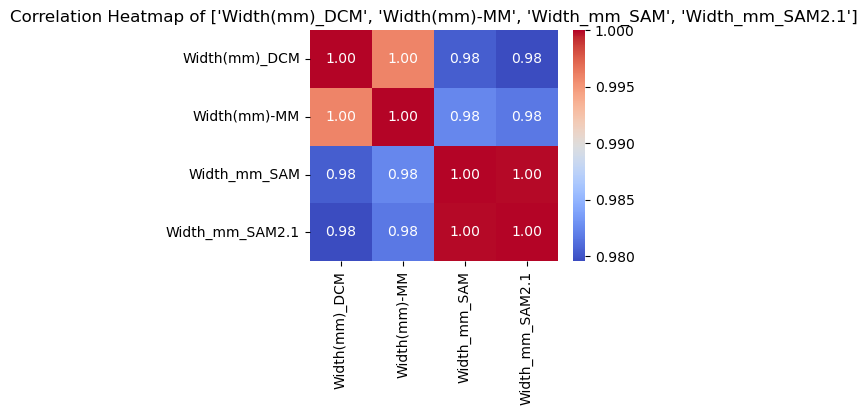

In [140]:
# Perform analysis on both sets of columns
analyze_columns(df_100images, ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM', 'Width_mm_SAM2.1'])

In [141]:
#Effect size for length

effect_size(df_100images, ["Width(mm)_DCM", "Width_mm_SAM2.1"])

effect_size(df_100images, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.284 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.243 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


#### Conclusion: The present analysis conducted a comprehensive statistical analysis to compare the performance of seed analyzer, digital caliper data and SAM generated data using various metrics, including Mean Absolute Error (MAE), effect size, and other statistical tests. The results indicate that while there are some differences among the methods, the overall values remain close to each other, suggesting a high degree of similarity in performance. The effect size analysis further confirms that the differences, though statistically significant in some cases, are relatively small in magnitude. Additionally, the MAE values are consistently low, indicating that all methods demonstrate reasonable accuracy. The data analysis for each seed shows that the values are closer to each other for seed analyzer data and SAM generated data. This suggests that SegmnetAnything model2.1 can be used for feature extraction from faba bean images. Slight differences between the values of digital-caliper data and SAM data can be explained as that in some of the images, the standard coin was not completely visible, (leading to the calculated lesser area as compared to complete area of a coin). 